In [319]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
%matplotlib inline
#!pip install plotly
import plotly.express as px
import scipy.stats as stats
from sklearn.cluster import KMeans 
from scipy.cluster.hierarchy import dendrogram, linkage
#!pip install factor_analyzer
from factor_analyzer import FactorAnalyzer # Perform statistical tests before PCA 
import warnings
warnings.filterwarnings('ignore')

In [320]:
digital_ads= pd.read_excel("Clustering+Clean+Ads_Data.xlsx")

In [321]:
digital_ads.head()

Timestamp InventoryType  Ad - Length  Ad- Width  Ad Size   Ad Type  \
0  2020-9-2-17       Format1          300        250    75000  Inter222   
1  2020-9-2-10       Format1          300        250    75000  Inter227   
2  2020-9-1-22       Format1          300        250    75000  Inter222   
3  2020-9-3-20       Format1          300        250    75000  Inter228   
4  2020-9-4-15       Format1          300        250    75000  Inter217   

  Platform Device Type   Format  Available_Impressions  Matched_Queries  \
0    Video     Desktop  Display                   1806              325   
1      App      Mobile    Video                   1780              285   
2    Video     Desktop  Display                   2727              356   
3    Video      Mobile    Video                   2430              497   
4      Web     Desktop    Video                   1218              242   

   Impressions  Clicks  Spend   Fee  Revenue     CTR  CPM  CPC  
0          323       1    0.0  0.35      0.0  0.0031  0.0  0.0  
1          285       1    0.0  0.35      0.0  0.0035  0.0  0.0  
2          355       1    0.0  0.35      0.0  0.0028  0.0  0.0  
3          495       1    0.0  0.35      0.0  0.0020  0.0  0.0  
4          242       1    0.0  0.35      0.0  0.0041  0.0  0.0

In [322]:
digital_ads.tail()

Timestamp InventoryType  Ad - Length  Ad- Width  Ad Size   Ad Type  \
23061   2020-9-13-7       Format5          720        300   216000  Inter220   
23062   2020-11-2-7       Format5          720        300   216000  Inter224   
23063  2020-9-14-22       Format5          720        300   216000  Inter218   
23064  2020-11-18-2       Format4          120        600    72000  inter230   
23065   2020-9-14-0       Format5          720        300   216000  Inter221   

      Platform Device Type Format  Available_Impressions  Matched_Queries  \
23061      Web      Mobile  Video                      1                1   
23062      Web     Desktop  Video                      3                2   
23063      App      Mobile  Video                      2                1   
23064    Video      Mobile  Video                      7                1   
23065      App      Mobile  Video                      2                2   

       Impressions  Clicks  Spend   Fee  Revenue  CTR  CPM  CPC  
23061            1       1   0.07  0.35   0.0455  NaN  NaN  NaN  
23062            2       1   0.04  0.35   0.0260  NaN  NaN  NaN  
23063            1       1   0.05  0.35   0.0325  NaN  NaN  NaN  
23064            1       1   0.07  0.35   0.0455  NaN  NaN  NaN  
23065            2       1   0.09  0.35   0.0585  NaN  NaN  NaN

In [323]:
digital_ads.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23066 entries, 0 to 23065
Data columns (total 19 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Timestamp              23066 non-null  object 
 1   InventoryType          23066 non-null  object 
 2   Ad - Length            23066 non-null  int64  
 3   Ad- Width              23066 non-null  int64  
 4   Ad Size                23066 non-null  int64  
 5   Ad Type                23066 non-null  object 
 6   Platform               23066 non-null  object 
 7   Device Type            23066 non-null  object 
 8   Format                 23066 non-null  object 
 9   Available_Impressions  23066 non-null  int64  
 10  Matched_Queries        23066 non-null  int64  
 11  Impressions            23066 non-null  int64  
 12  Clicks                 23066 non-null  int64  
 13  Spend                  23066 non-null  float64
 14  Fee                    23066 non-null  float64
 15  Re

In [324]:
digital_ads.describe()

Ad - Length     Ad- Width        Ad Size  Available_Impressions  \
count  23066.000000  23066.000000   23066.000000           2.306600e+04   
mean     385.163097    337.896037   96674.468048           2.432044e+06   
std      233.651434    203.092885   61538.329557           4.742888e+06   
min      120.000000     70.000000   33600.000000           1.000000e+00   
25%      120.000000    250.000000   72000.000000           3.367225e+04   
50%      300.000000    300.000000   72000.000000           4.837710e+05   
75%      720.000000    600.000000   84000.000000           2.527712e+06   
max      728.000000    600.000000  216000.000000           2.759286e+07   

       Matched_Queries   Impressions         Clicks         Spend  \
count     2.306600e+04  2.306600e+04   23066.000000  23066.000000   
mean      1.295099e+06  1.241520e+06   10678.518816   2706.625689   
std       2.512970e+06  2.429400e+06   17353.409363   4067.927273   
min       1.000000e+00  1.000000e+00       1.000000      0.000000   
25%       1.828250e+04  7.990500e+03     710.000000     85.180000   
50%       2.580875e+05  2.252900e+05    4425.000000   1425.125000   
75%       1.180700e+06  1.112428e+06   12793.750000   3121.400000   
max       1.470202e+07  1.419477e+07  143049.000000  26931.870000   

                Fee       Revenue           CTR           CPM           CPC  
count  23066.000000  23066.000000  18330.000000  18330.000000  18330.000000  
mean       0.335123   1924.252331      0.073661      7.672045      0.351061  
std        0.031963   3105.238410      0.075160      6.481391      0.343334  
min        0.210000      0.000000      0.000100      0.000000      0.000000  
25%        0.330000     55.365375      0.002600      1.710000      0.090000  
50%        0.350000    926.335000      0.082550      7.660000      0.160000  
75%        0.350000   2091.338150      0.130000     12.510000      0.570000  
max        0.350000  21276.180000      1.000000     81.560000      7.260000

In [325]:
digital_ads.shape

(23066, 19)

In [326]:
digital_ads.duplicated().sum()

0

In [327]:
print(digital_ads['InventoryType'].unique())
print(digital_ads['Ad Type'].unique())
print(digital_ads['Platform'].unique())
print(digital_ads['Device Type'].unique())
print(digital_ads['Format'].unique())

['Format1' 'Format6' 'Format5' 'Format7' 'Format4' 'Format3' 'Format2']
['Inter222' 'Inter227' 'Inter228' 'Inter217' 'Inter219' 'Inter221'
 'Inter223' 'Inter225' 'Inter229' 'Inter224' 'inter230' 'Inter226'
 'Inter220' 'Inter218']
['Video' 'App' 'Web']
['Desktop' 'Mobile']
['Display' 'Video']


In [328]:
digital_ads.isnull().sum()

Timestamp                   0
InventoryType               0
Ad - Length                 0
Ad- Width                   0
Ad Size                     0
Ad Type                     0
Platform                    0
Device Type                 0
Format                      0
Available_Impressions       0
Matched_Queries             0
Impressions                 0
Clicks                      0
Spend                       0
Fee                         0
Revenue                     0
CTR                      4736
CPM                      4736
CPC                      4736
dtype: int64

#### Formula:
CPM = (Total Campaign Spend / Number of Impressions) * 1,000. Note that the Total Campaign Spend refers to the 'Spend' Column in the dataset and the Number of Impressions refers to the 'Impressions' Column in the dataset. 

CPC = Total Cost (spend) / Number of Clicks.  Note that the Total Cost (spend) refers to the 'Spend' Column in the dataset and the Number of Clicks refers to the 'Clicks' Column in the dataset. 

CTR = Total Measured Clicks / Total Measured Ad Impressions x 100. Note that the Total Measured Clicks refers to the 'Clicks' Column in the dataset and the Total Measured Ad Impressions refers to the 'Impressions' Column in the dataset. 

In [329]:
def fill_null(digital_ads):
    # Fill null values in CPM
    digital_ads['CPM'].fillna((digital_ads['Spend'] / digital_ads['Impressions']) * 1000, inplace=True)

    # Fill null values in CPC
    digital_ads['CPC'].fillna(digital_ads['Spend'] / digital_ads['Clicks'], inplace=True)

    # Fill null values in CTR
    digital_ads['CTR'].fillna((digital_ads['Clicks'] / digital_ads['Impressions']) * 100, inplace=True)

# Apply the function to fill null values
fill_null(digital_ads)

# Print the updated DataFrame
print(digital_ads)

          Timestamp InventoryType  Ad - Length  Ad- Width  Ad Size   Ad Type  \
0       2020-9-2-17       Format1          300        250    75000  Inter222   
1       2020-9-2-10       Format1          300        250    75000  Inter227   
2       2020-9-1-22       Format1          300        250    75000  Inter222   
3       2020-9-3-20       Format1          300        250    75000  Inter228   
4       2020-9-4-15       Format1          300        250    75000  Inter217   
...             ...           ...          ...        ...      ...       ...   
23061   2020-9-13-7       Format5          720        300   216000  Inter220   
23062   2020-11-2-7       Format5          720        300   216000  Inter224   
23063  2020-9-14-22       Format5          720        300   216000  Inter218   
23064  2020-11-18-2       Format4          120        600    72000  inter230   
23065   2020-9-14-0       Format5          720        300   216000  Inter221   

      Platform Device Type   Format  Av

In [330]:
digital_ads.isnull().sum()

Timestamp                0
InventoryType            0
Ad - Length              0
Ad- Width                0
Ad Size                  0
Ad Type                  0
Platform                 0
Device Type              0
Format                   0
Available_Impressions    0
Matched_Queries          0
Impressions              0
Clicks                   0
Spend                    0
Fee                      0
Revenue                  0
CTR                      0
CPM                      0
CPC                      0
dtype: int64

#### Univariate analysis

In [331]:
df_num = digital_ads.select_dtypes(include = ['int64','float'])
lstnumericcolumns = list(df_num.columns.values)
len(lstnumericcolumns)

13

In [332]:
lstnumericcolumns

['Ad - Length',
 'Ad- Width',
 'Ad Size',
 'Available_Impressions',
 'Matched_Queries',
 'Impressions',
 'Clicks',
 'Spend',
 'Fee',
 'Revenue',
 'CTR',
 'CPM',
 'CPC']

In [333]:
df_num.head()

Ad - Length  Ad- Width  Ad Size  Available_Impressions  Matched_Queries  \
0          300        250    75000                   1806              325   
1          300        250    75000                   1780              285   
2          300        250    75000                   2727              356   
3          300        250    75000                   2430              497   
4          300        250    75000                   1218              242   

   Impressions  Clicks  Spend   Fee  Revenue     CTR  CPM  CPC  
0          323       1    0.0  0.35      0.0  0.0031  0.0  0.0  
1          285       1    0.0  0.35      0.0  0.0035  0.0  0.0  
2          355       1    0.0  0.35      0.0  0.0028  0.0  0.0  
3          495       1    0.0  0.35      0.0  0.0020  0.0  0.0  
4          242       1    0.0  0.35      0.0  0.0041  0.0  0.0

In [334]:
def univariateAnalysis_numeric(column,nbins):
    print("Description of " + column)
    print("----------------------------------------------------------------------------")
    print(digital_ads[column].describe(),end=' ')
    print('\n\nSkew :',round(digital_ads[column].skew(),2))
    print('\n')
    plt.figure(figsize=(15,4))
    print("Distribution of " + column)
    print("----------------------------------------------------------------------------")
    plt.subplot(1,2,1)
    df[column].hist(bins=10, grid=False)
    plt.ylabel('count')
    plt.subplot(1,2,2)
    sns.boxplot(x=digital_ads[column])
    plt.show()

Description of Ad - Length
----------------------------------------------------------------------------
count    23066.000000
mean       385.163097
std        233.651434
min        120.000000
25%        120.000000
50%        300.000000
75%        720.000000
max        728.000000
Name: Ad - Length, dtype: float64 

Skew : 0.33


Distribution of Ad - Length
----------------------------------------------------------------------------


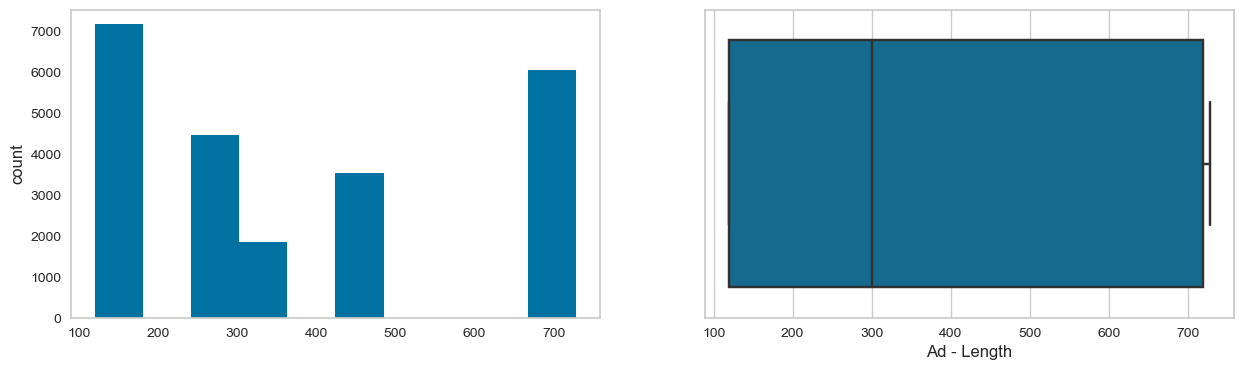

Description of Ad- Width
----------------------------------------------------------------------------
count    23066.000000
mean       337.896037
std        203.092885
min         70.000000
25%        250.000000
50%        300.000000
75%        600.000000
max        600.000000
Name: Ad- Width, dtype: float64 

Skew : 0.21


Distribution of Ad- Width
----------------------------------------------------------------------------


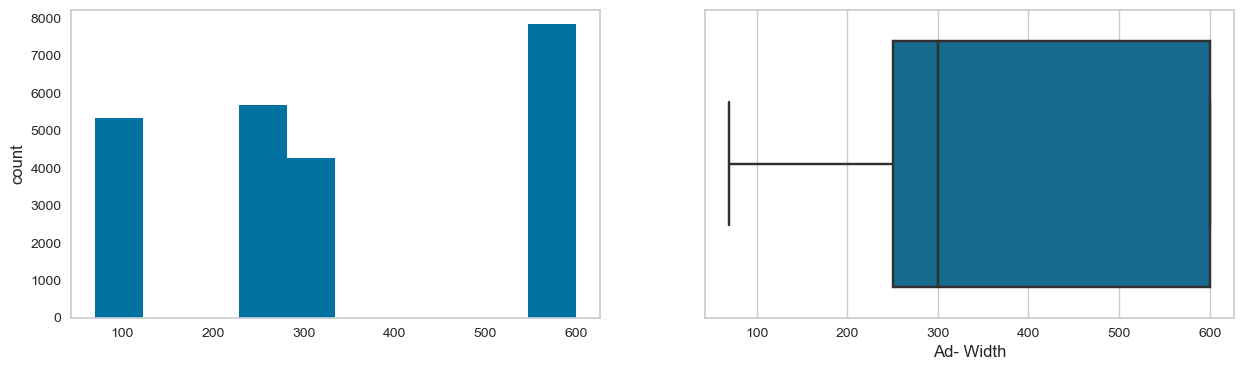

Description of Ad Size
----------------------------------------------------------------------------
count     23066.000000
mean      96674.468048
std       61538.329557
min       33600.000000
25%       72000.000000
50%       72000.000000
75%       84000.000000
max      216000.000000
Name: Ad Size, dtype: float64 

Skew : 1.21


Distribution of Ad Size
----------------------------------------------------------------------------


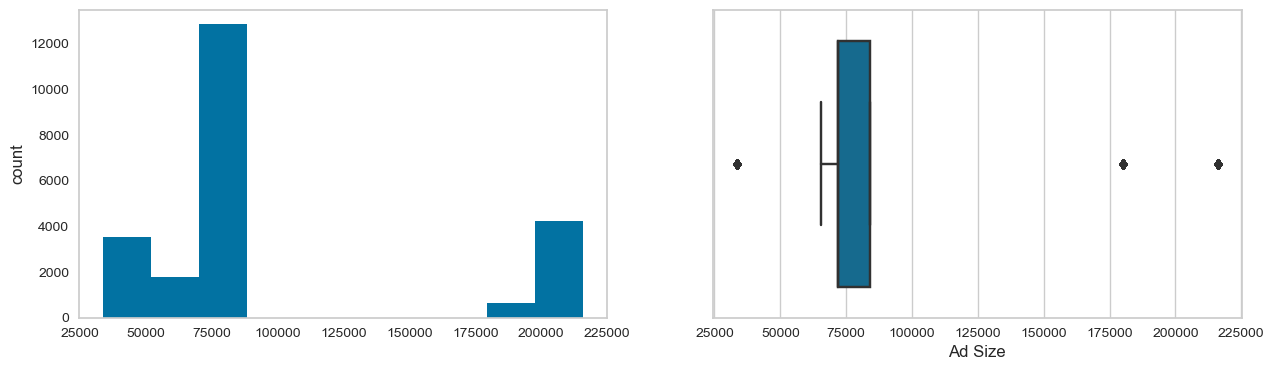

Description of Available_Impressions
----------------------------------------------------------------------------
count    2.306600e+04
mean     2.432044e+06
std      4.742888e+06
min      1.000000e+00
25%      3.367225e+04
50%      4.837710e+05
75%      2.527712e+06
max      2.759286e+07
Name: Available_Impressions, dtype: float64 

Skew : 3.07


Distribution of Available_Impressions
----------------------------------------------------------------------------


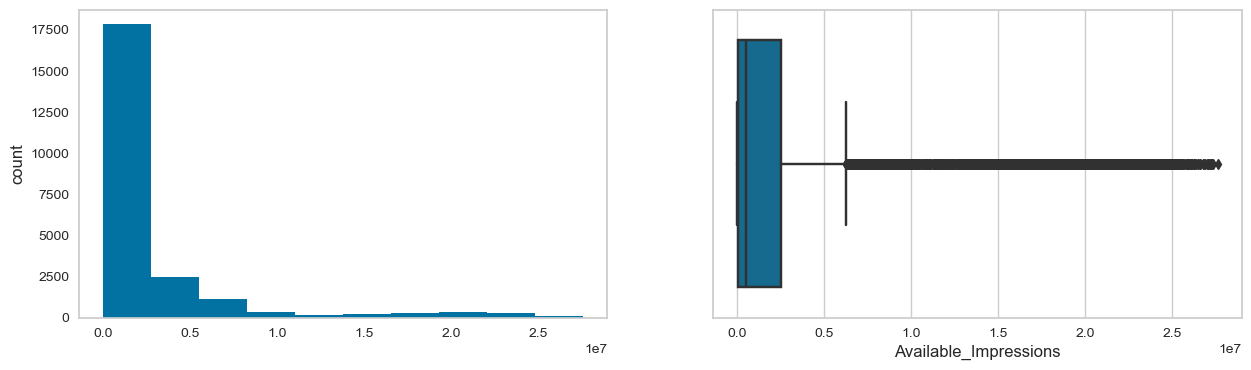

Description of Matched_Queries
----------------------------------------------------------------------------
count    2.306600e+04
mean     1.295099e+06
std      2.512970e+06
min      1.000000e+00
25%      1.828250e+04
50%      2.580875e+05
75%      1.180700e+06
max      1.470202e+07
Name: Matched_Queries, dtype: float64 

Skew : 2.98


Distribution of Matched_Queries
----------------------------------------------------------------------------


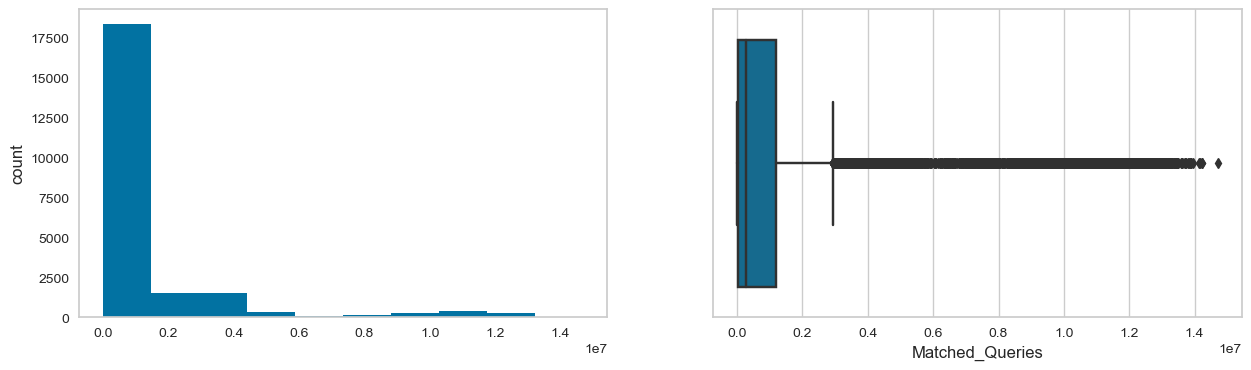

Description of Impressions
----------------------------------------------------------------------------
count    2.306600e+04
mean     1.241520e+06
std      2.429400e+06
min      1.000000e+00
25%      7.990500e+03
50%      2.252900e+05
75%      1.112428e+06
max      1.419477e+07
Name: Impressions, dtype: float64 

Skew : 2.97


Distribution of Impressions
----------------------------------------------------------------------------


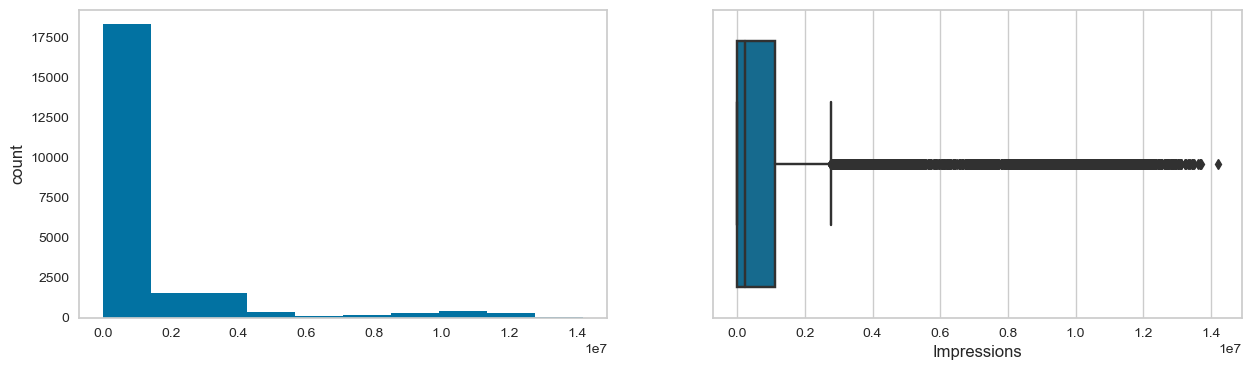

Description of Clicks
----------------------------------------------------------------------------
count     23066.000000
mean      10678.518816
std       17353.409363
min           1.000000
25%         710.000000
50%        4425.000000
75%       12793.750000
max      143049.000000
Name: Clicks, dtype: float64 

Skew : 2.94


Distribution of Clicks
----------------------------------------------------------------------------


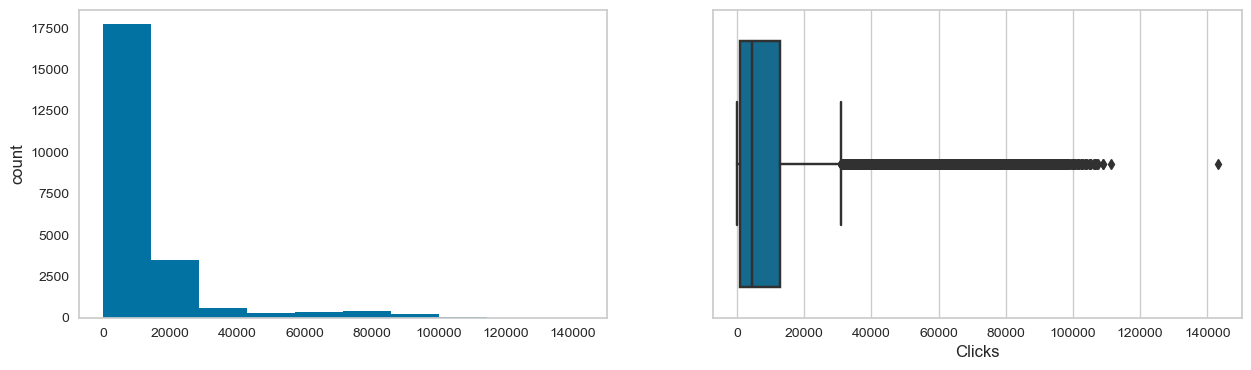

Description of Spend
----------------------------------------------------------------------------
count    23066.000000
mean      2706.625689
std       4067.927273
min          0.000000
25%         85.180000
50%       1425.125000
75%       3121.400000
max      26931.870000
Name: Spend, dtype: float64 

Skew : 2.58


Distribution of Spend
----------------------------------------------------------------------------


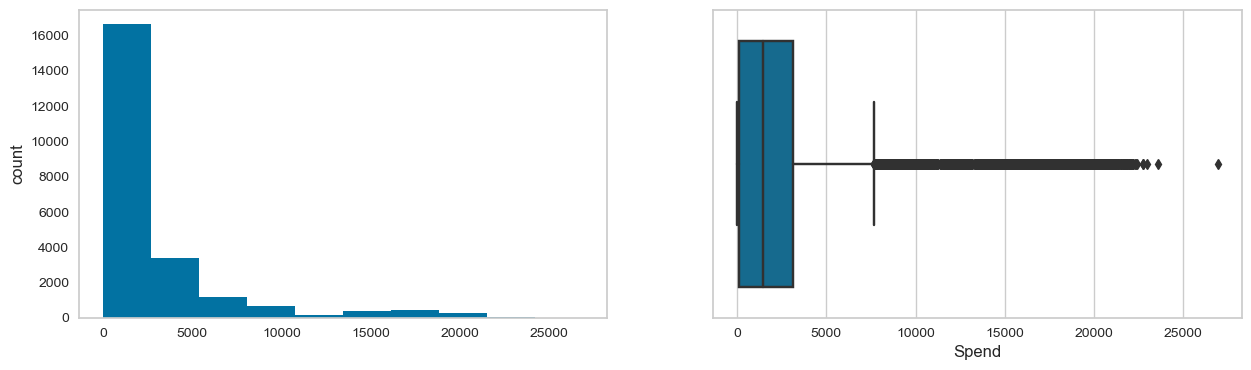

Description of Fee
----------------------------------------------------------------------------
count    23066.000000
mean         0.335123
std          0.031963
min          0.210000
25%          0.330000
50%          0.350000
75%          0.350000
max          0.350000
Name: Fee, dtype: float64 

Skew : -2.3


Distribution of Fee
----------------------------------------------------------------------------


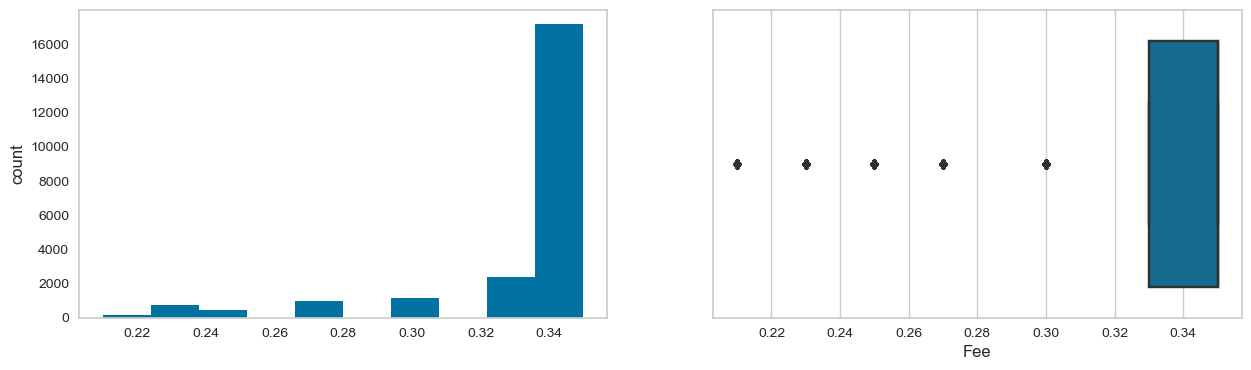

Description of Revenue
----------------------------------------------------------------------------
count    23066.000000
mean      1924.252331
std       3105.238410
min          0.000000
25%         55.365375
50%        926.335000
75%       2091.338150
max      21276.180000
Name: Revenue, dtype: float64 

Skew : 2.79


Distribution of Revenue
----------------------------------------------------------------------------


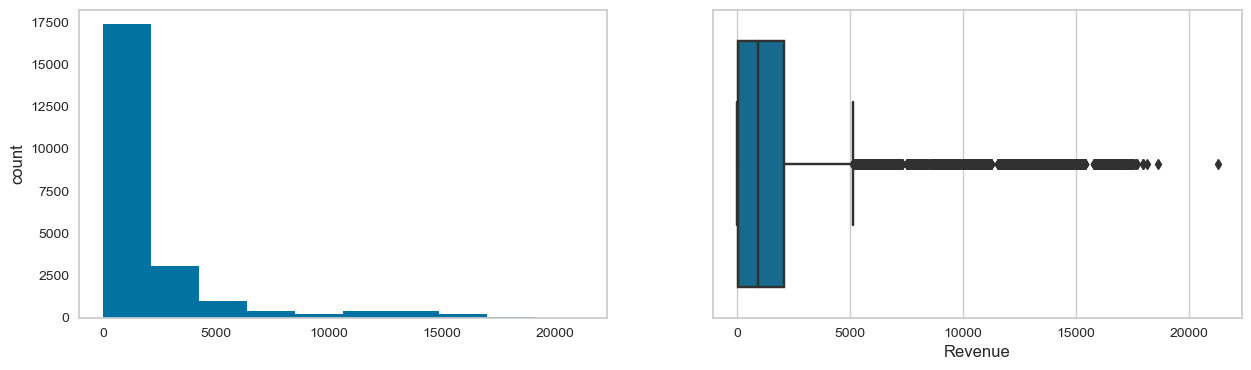

Description of CTR
----------------------------------------------------------------------------
count    23066.000000
mean         2.614863
std          7.853405
min          0.000100
25%          0.003400
50%          0.112650
75%          0.183778
max        200.000000
Name: CTR, dtype: float64 

Skew : 5.43


Distribution of CTR
----------------------------------------------------------------------------


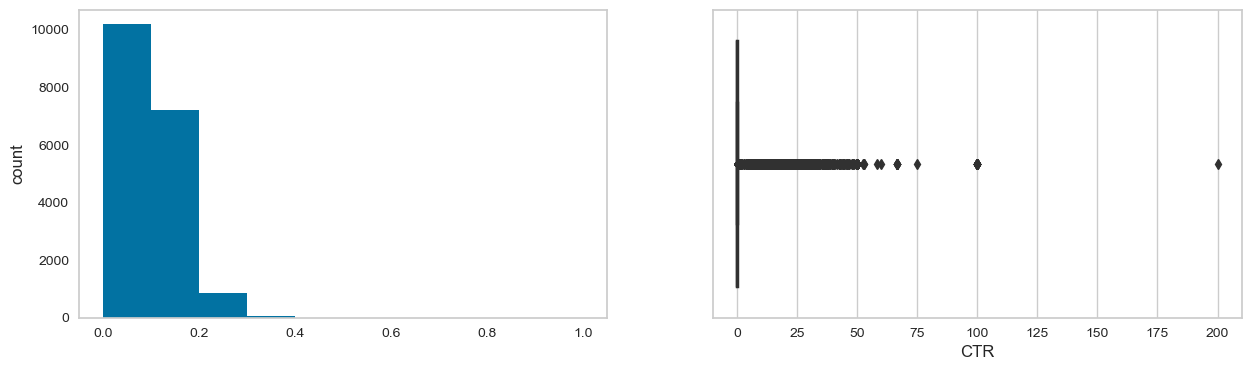

Description of CPM
----------------------------------------------------------------------------
count    23066.000000
mean         8.396730
std          9.057082
min          0.000000
25%          1.750000
50%          8.370742
75%         13.040000
max        715.000000
Name: CPM, dtype: float64 

Skew : 22.32


Distribution of CPM
----------------------------------------------------------------------------


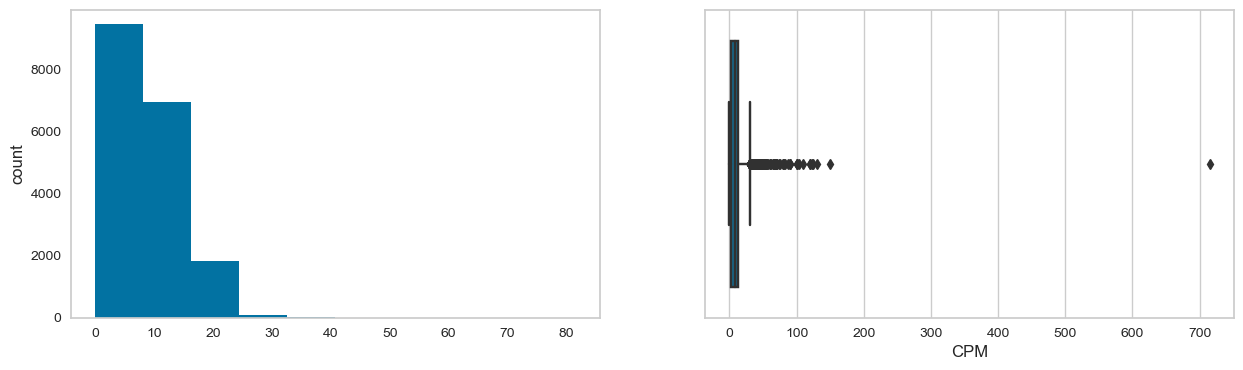

Description of CPC
----------------------------------------------------------------------------
count    23066.000000
mean         0.336652
std          0.341231
min          0.000000
25%          0.090000
50%          0.140000
75%          0.550000
max          7.260000
Name: CPC, dtype: float64 

Skew : 1.84


Distribution of CPC
----------------------------------------------------------------------------


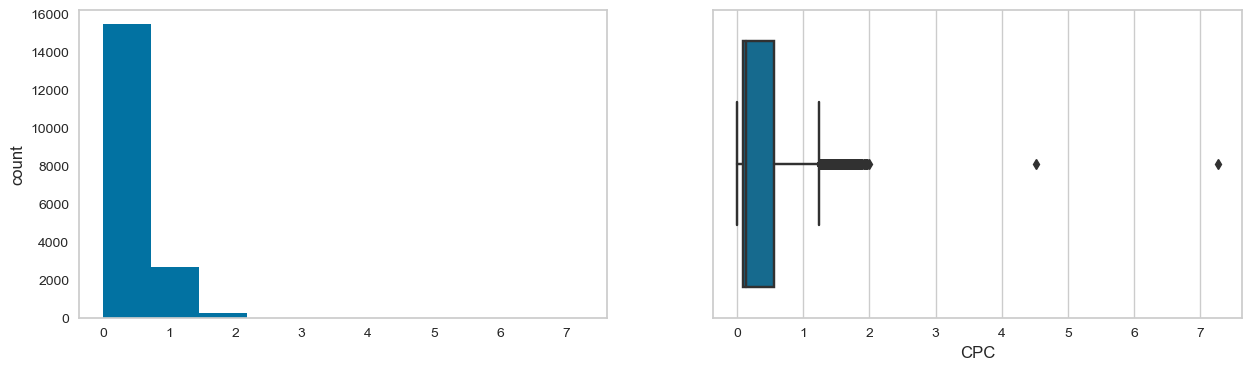

In [335]:
for x in lstnumericcolumns:
    univariateAnalysis_numeric(x,20)

In [336]:
df_cat = digital_ads.select_dtypes(include = ['object'])
lstcatcolumns = list(df_cat.columns.values)
lstcatcolumns

['Timestamp', 'InventoryType', 'Ad Type', 'Platform', 'Device Type', 'Format']

In [337]:
lstcatcolumns.remove('Timestamp')
lstcatcolumns

['InventoryType', 'Ad Type', 'Platform', 'Device Type', 'Format']

In [338]:
def univariateAnalysis_category(cat_column):
    print("Details of " + cat_column)
    print("----------------------------------------------------------------")
    print(df_cat[cat_column].value_counts())
    plt.figure(figsize=(8,4))
    df_cat[cat_column].value_counts().plot.bar(title="Frequency Distribution of " + cat_column)
    plt.show()
    print("       ")

Details of InventoryType
----------------------------------------------------------------
Format4    7165
Format5    4249
Format1    3814
Format3    3540
Format6    1850
Format2    1789
Format7     659
Name: InventoryType, dtype: int64


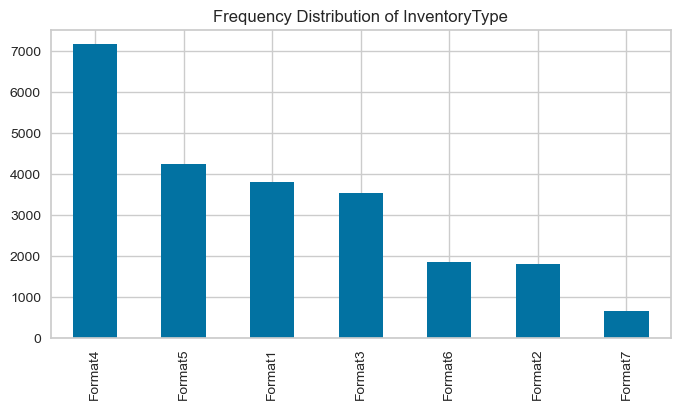

       
Details of Ad Type
----------------------------------------------------------------
Inter224    1658
Inter217    1655
Inter223    1654
Inter219    1650
Inter221    1650
Inter222    1649
Inter229    1648
Inter227    1647
Inter218    1645
inter230    1644
Inter220    1644
Inter225    1643
Inter226    1640
Inter228    1639
Name: Ad Type, dtype: int64


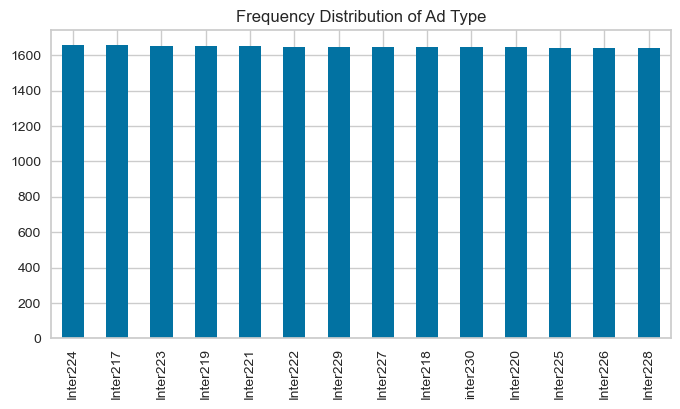

       
Details of Platform
----------------------------------------------------------------
Video    9873
Web      8251
App      4942
Name: Platform, dtype: int64


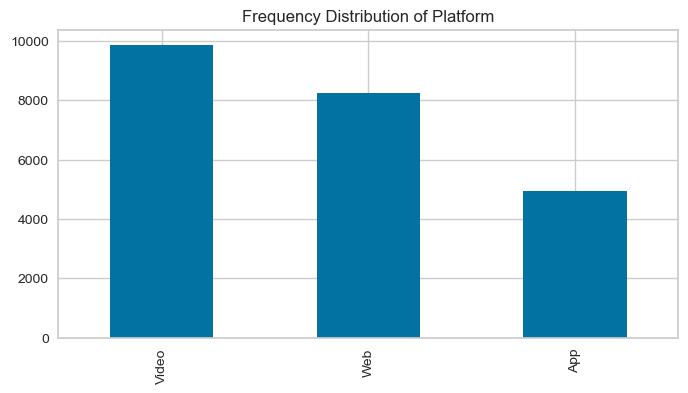

       
Details of Device Type
----------------------------------------------------------------
Mobile     14806
Desktop     8260
Name: Device Type, dtype: int64


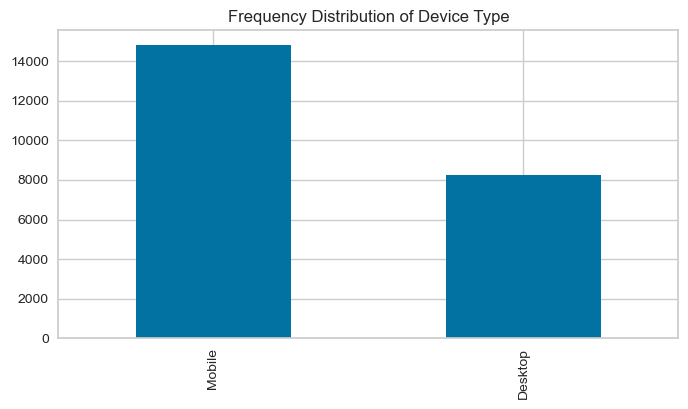

       
Details of Format
----------------------------------------------------------------
Video      11552
Display    11514
Name: Format, dtype: int64


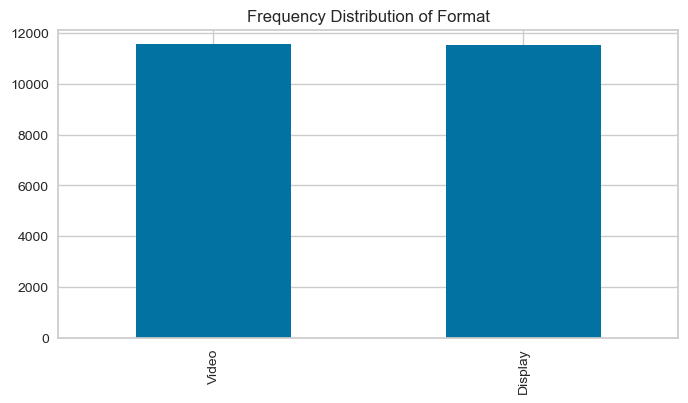

In [339]:
for x in lstcatcolumns:
    univariateAnalysis_category(x)

Bivariate analysis

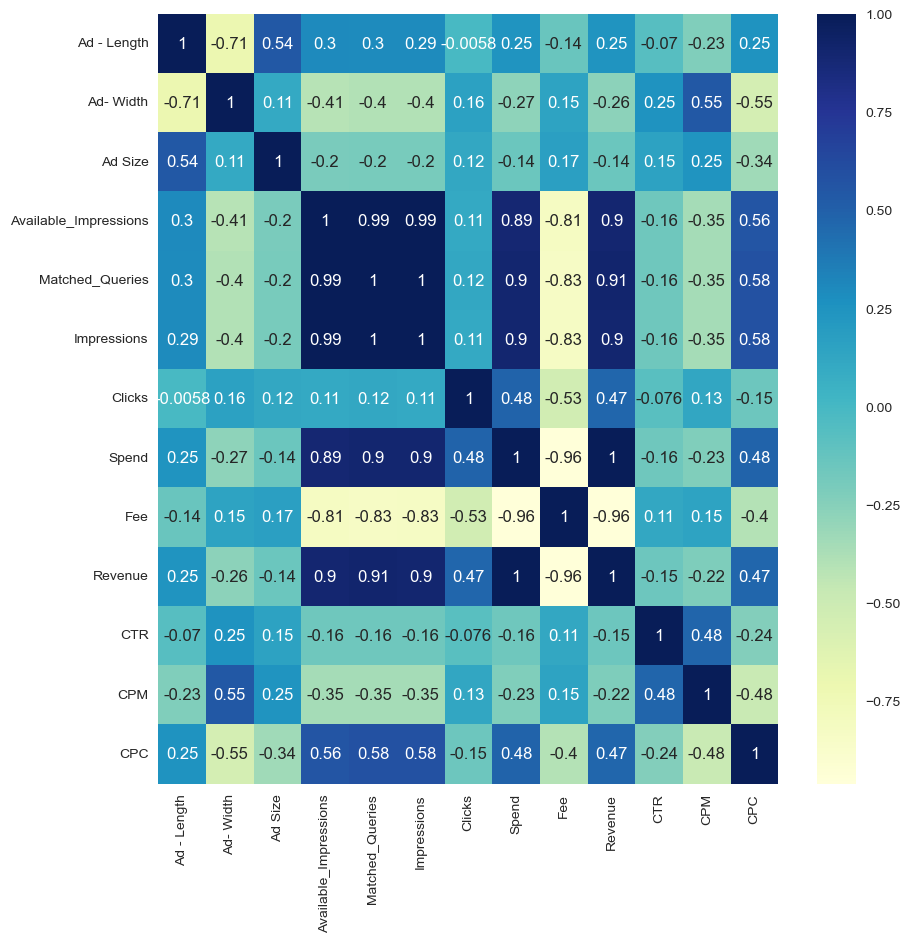

In [340]:
plt.figure(figsize  = (10,10))
sns.heatmap(digital_ads.corr(), annot = True, cmap="YlGnBu")
plt.show()

### Outliers treatment

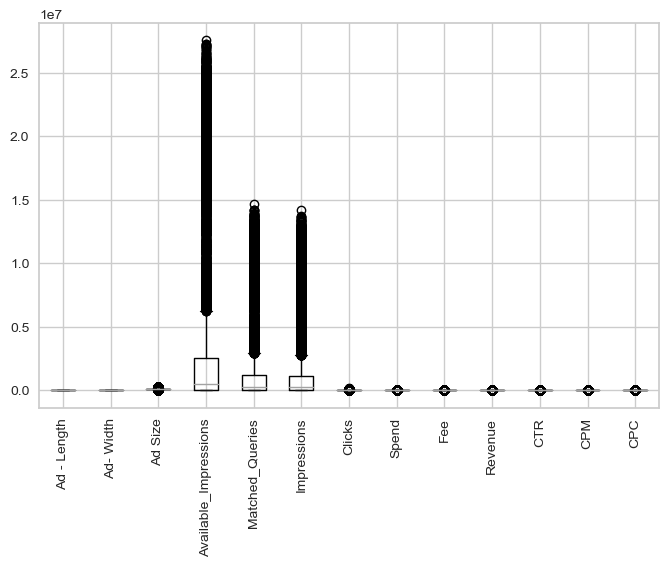

In [341]:
df_num.boxplot(figsize=(8,5))
plt.xticks(rotation=90)
plt.show()

In [342]:
Q1 = df_num.quantile(0.25)
Q3 = df_num.quantile(0.75)
IQR = Q3 - Q1

In [343]:
((df_num < (Q1 - 1.5 * IQR)) | (df_num > (Q3 + 1.5 * IQR))).sum()

Ad - Length                 0
Ad- Width                   0
Ad Size                  8448
Available_Impressions    2378
Matched_Queries          3192
Impressions              3269
Clicks                   1691
Spend                    2081
Fee                      3517
Revenue                  2325
CTR                      3487
CPM                       208
CPC                       568
dtype: int64

In [344]:
import numpy as np
import pandas as pd

# Define the numerical columns you want to treat for outliers
numerical_columns = ['Ad Size', 'Available_Impressions', 'Matched_Queries', 'Impressions', 'Clicks', 'Spend', 'Fee', 'Revenue', 'CTR', 'CPM', 'CPC']

# Function to detect outliers and return lower and upper bounds
def detect_outlier(col):
    Q1, Q3 = np.percentile(col, [25, 75])
    IQR = Q3 - Q1
    lower_range = Q1 - (1.5 * IQR)
    upper_range = Q3 + (1.5 * IQR)
    return lower_range, upper_range

# Loop through each numerical column and handle outliers
for column_name in numerical_columns:
    lower_range, upper_range = detect_outlier(df_num[column_name])  
    df_num[column_name] = np.where(df_num[column_name] < lower_range, lower_range, df_num[column_name])
    df_num[column_name] = np.where(df_num[column_name] > upper_range, upper_range, df_num[column_name])



In [345]:
((df_num < (Q1 - 1.5 * IQR)) | (df_num > (Q3 + 1.5 * IQR))).sum()

Ad - Length              0
Ad- Width                0
Ad Size                  0
Available_Impressions    0
Matched_Queries          0
Impressions              0
Clicks                   0
Spend                    0
Fee                      0
Revenue                  0
CTR                      0
CPM                      0
CPC                      0
dtype: int64

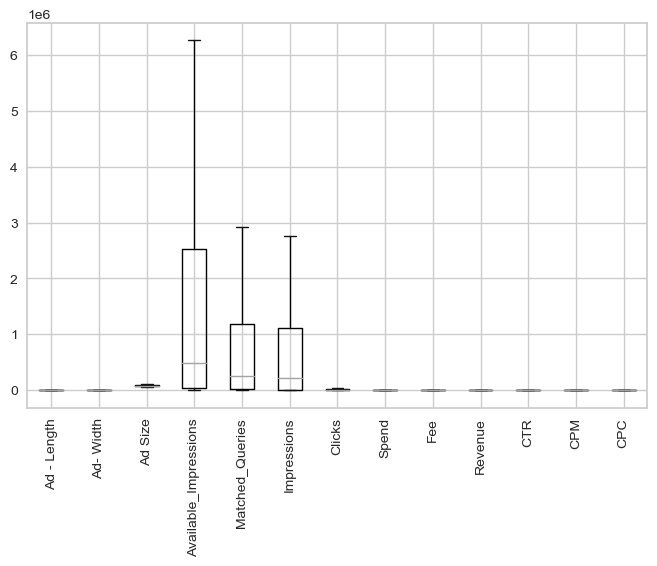

In [346]:
df_num.boxplot(figsize=(8,5))
plt.xticks(rotation=90)
plt.show()

In [347]:
from scipy.stats import zscore
df_num_scaled=df_num.apply(zscore)
df_num_scaled.head()

Ad - Length  Ad- Width   Ad Size  Available_Impressions  Matched_Queries  \
0    -0.364496  -0.432797 -0.102518              -0.755333        -0.778949   
1    -0.364496  -0.432797 -0.102518              -0.755345        -0.778988   
2    -0.364496  -0.432797 -0.102518              -0.754900        -0.778919   
3    -0.364496  -0.432797 -0.102518              -0.755040        -0.778781   
4    -0.364496  -0.432797 -0.102518              -0.755610        -0.779030   

   Impressions    Clicks    Spend       Fee   Revenue       CTR       CPM  \
0    -0.768478 -0.867488 -0.89317  0.535724 -0.880093 -0.891201 -1.194562   
1    -0.768516 -0.867488 -0.89317  0.535724 -0.880093 -0.888615 -1.194562   
2    -0.768445 -0.867488 -0.89317  0.535724 -0.880093 -0.893142 -1.194562   
3    -0.768302 -0.867488 -0.89317  0.535724 -0.880093 -0.898315 -1.194562   
4    -0.768560 -0.867488 -0.89317  0.535724 -0.880093 -0.884734 -1.194562   

       CPC  
0 -1.04114  
1 -1.04114  
2 -1.04114  
3 -1.04114  
4 -1.04114

In [348]:
df_num_scaled.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23066 entries, 0 to 23065
Data columns (total 13 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Ad - Length            23066 non-null  float64
 1   Ad- Width              23066 non-null  float64
 2   Ad Size                23066 non-null  float64
 3   Available_Impressions  23066 non-null  float64
 4   Matched_Queries        23066 non-null  float64
 5   Impressions            23066 non-null  float64
 6   Clicks                 23066 non-null  float64
 7   Spend                  23066 non-null  float64
 8   Fee                    23066 non-null  float64
 9   Revenue                23066 non-null  float64
 10  CTR                    23066 non-null  float64
 11  CPM                    23066 non-null  float64
 12  CPC                    23066 non-null  float64
dtypes: float64(13)
memory usage: 2.3 MB


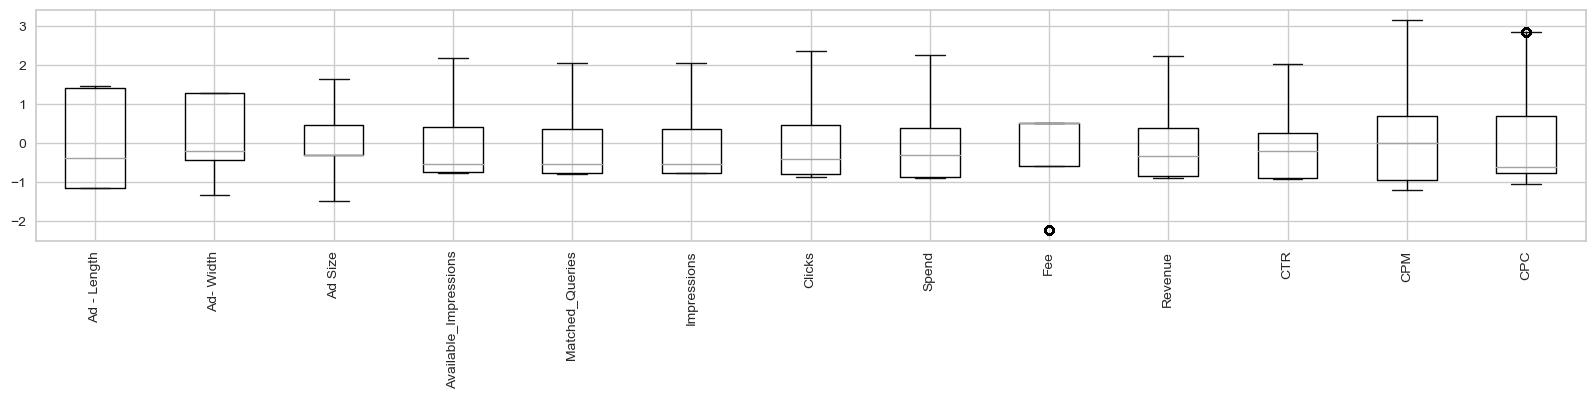

In [349]:
df_num_scaled.boxplot(figsize=(20,3))
plt.xticks(rotation=90)
plt.show()

In [350]:
import scipy.cluster.hierarchy as shc

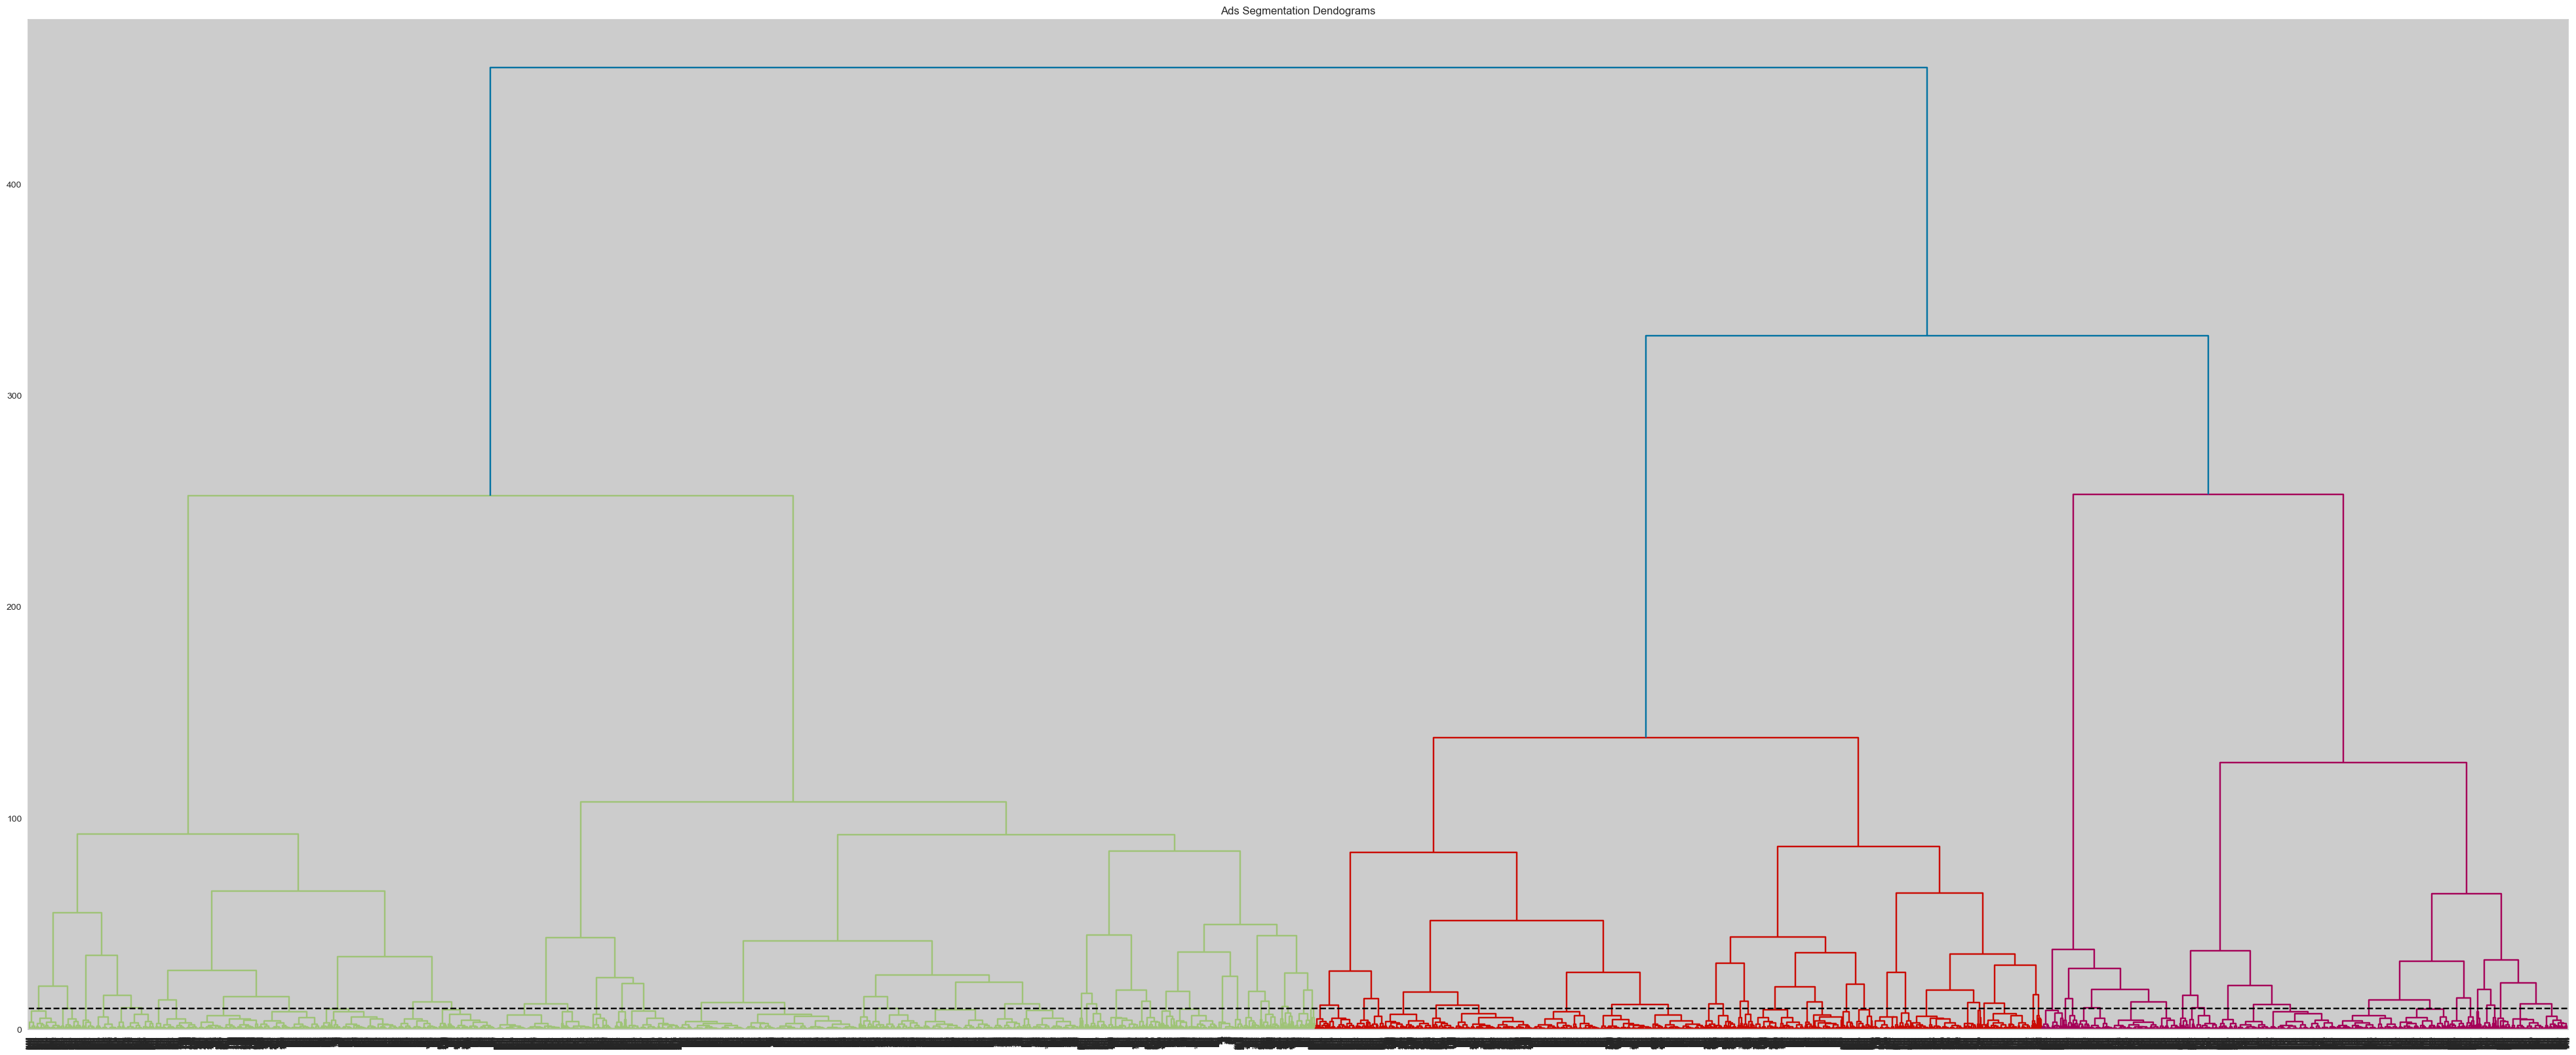

In [352]:
plt.figure(figsize=(50, 20))
plt.title("Ads Segmentation Dendograms")
wardlink = linkage(df_num_scaled, method = 'ward', metric='euclidean')
dend = dendrogram(wardlink)
plt.axhline(10, color='black', linestyle='--')
plt.show();

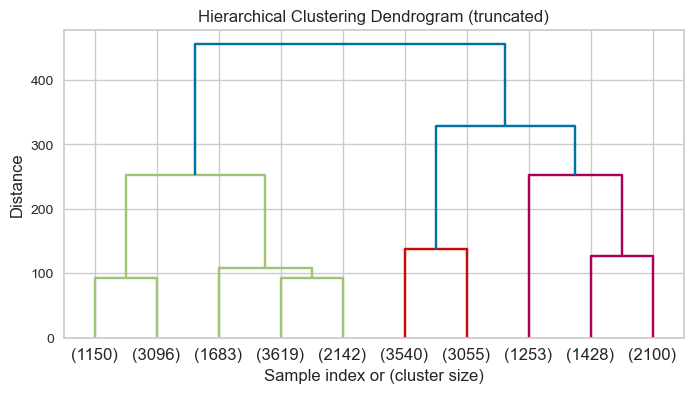

In [353]:
plt.figure(figsize=(8, 4))
plt.title('Hierarchical Clustering Dendrogram (truncated)')
plt.xlabel('Sample index or (cluster size)')
plt.ylabel('Distance')
dend = dendrogram(wardlink,
                 truncate_mode='lastp',
                 p = 10,
                 )
plt.show();

In [354]:
#Empty dictionary to store the SSE for each value of k
sse = {} 

# iterate for a range of Ks and fit the scaled data to the algorithm. Use inertia attribute from the clustering object and 
# store the inertia value for that k 
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=1).fit(df_num_scaled)
    sse[k] = kmeans.inertia_ 

In [355]:
sse

{1: 299858.00000000006,
 2: 187902.64770993276,
 3: 139992.87426412935,
 4: 106152.74229789544,
 5: 72133.6934158383,
 6: 62259.98939794786,
 7: 55151.52147681743,
 8: 49733.04005163712,
 9: 46049.73902210879,
 10: 41531.15769082868}

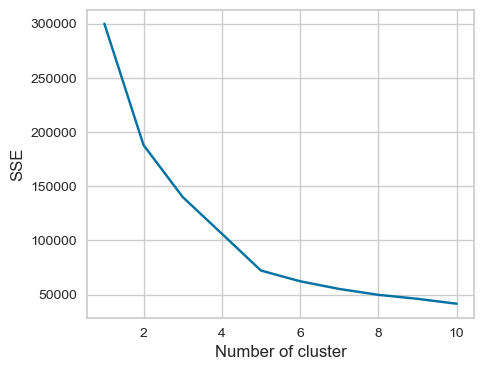

In [360]:
#Elbow plot
plt.figure(figsize=(5, 4))
plt.plot(list(sse.keys()), list(sse.values()), 'bx-')
plt.xlabel("Number of cluster")
plt.ylabel("SSE")
plt.show()

In [361]:
from sklearn.metrics import silhouette_samples, silhouette_score

In [362]:
#Empty dictionary to store the Silhouette score for each value of k
sc = {} 

# iterate for a range of Ks and fit the scaled data to the algorithm. Store the Silhouette score for that k 
for k in range(2, 10):
    kmeans = KMeans(n_clusters=k, random_state=1).fit(df_num_scaled)
    labels = kmeans.predict(df_num_scaled)
    sc[k] = silhouette_score(df_num_scaled, labels)

In [363]:
sc

{2: 0.40318725804432765,
 3: 0.34547066630442486,
 4: 0.41284225649057377,
 5: 0.48020321346347616,
 6: 0.47613989974053916,
 7: 0.46883074857917595,
 8: 0.43286664054059454,
 9: 0.4470009074272004}

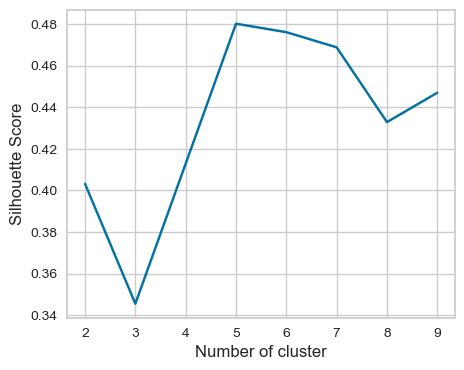

In [364]:
#Elbow plot
plt.figure(figsize=(5, 4))
plt.plot(list(sc.keys()), list(sc.values()), 'bx-')
plt.xlabel("Number of cluster")
plt.ylabel("Silhouette Score")
plt.show()

In [365]:
k_means = KMeans(n_clusters = 5, random_state=1)
k_means.fit(df_num_scaled)
labels = k_means.labels_

In [366]:
digital_ads["Clus_kmeans"] = labels
digital_ads.head()

Timestamp InventoryType  Ad - Length  Ad- Width  Ad Size   Ad Type  \
0  2020-9-2-17       Format1          300        250    75000  Inter222   
1  2020-9-2-10       Format1          300        250    75000  Inter227   
2  2020-9-1-22       Format1          300        250    75000  Inter222   
3  2020-9-3-20       Format1          300        250    75000  Inter228   
4  2020-9-4-15       Format1          300        250    75000  Inter217   

  Platform Device Type   Format  Available_Impressions  Matched_Queries  \
0    Video     Desktop  Display                   1806              325   
1      App      Mobile    Video                   1780              285   
2    Video     Desktop  Display                   2727              356   
3    Video      Mobile    Video                   2430              497   
4      Web     Desktop    Video                   1218              242   

   Impressions  Clicks  Spend   Fee  Revenue     CTR  CPM  CPC  Clus_kmeans  
0          323       1    0.0  0.35      0.0  0.0031  0.0  0.0            3  
1          285       1    0.0  0.35      0.0  0.0035  0.0  0.0            3  
2          355       1    0.0  0.35      0.0  0.0028  0.0  0.0            3  
3          495       1    0.0  0.35      0.0  0.0020  0.0  0.0            3  
4          242       1    0.0  0.35      0.0  0.0041  0.0  0.0            3

In [367]:
# Filtering and checking the data in the clusters
digital_ads[digital_ads['Clus_kmeans']==0]

Timestamp InventoryType  Ad - Length  Ad- Width  Ad Size   Ad Type  \
117    2020-11-8-17       Format5          720        300   216000  Inter227   
142    2020-9-17-11       Format5          720        300   216000  Inter221   
146    2020-11-8-15       Format5          720        300   216000  Inter227   
155    2020-9-30-17       Format5          720        300   216000  Inter225   
157    2020-11-8-23       Format5          720        300   216000  Inter220   
...             ...           ...          ...        ...      ...       ...   
23059  2020-11-13-4       Format5          720        300   216000  Inter228   
23061   2020-9-13-7       Format5          720        300   216000  Inter220   
23062   2020-11-2-7       Format5          720        300   216000  Inter224   
23063  2020-9-14-22       Format5          720        300   216000  Inter218   
23065   2020-9-14-0       Format5          720        300   216000  Inter221   

      Platform Device Type   Format  Available_Impressions  Matched_Queries  \
117        App      Mobile    Video                     20               10   
142        App      Mobile    Video                     28               19   
146        App      Mobile    Video                     28               16   
155      Video      Mobile    Video                     24               14   
157        Web      Mobile    Video                     36               10   
...        ...         ...      ...                    ...              ...   
23059    Video      Mobile  Display                      2                2   
23061      Web      Mobile    Video                      1                1   
23062      Web     Desktop    Video                      3                2   
23063      App      Mobile    Video                      2                1   
23065      App      Mobile    Video                      2                2   

       Impressions  Clicks  Spend   Fee  Revenue       CTR    CPM   CPC  \
117             10       1   0.02  0.35   0.0100    0.1000   1.73  0.02   
142             15       1   0.05  0.35   0.0300    0.0667   3.43  0.05   
146             13       2   0.04  0.35   0.0300    0.1538   3.26  0.02   
155             12       1   0.06  0.35   0.0400    0.0833   4.92  0.06   
157              8       1   0.07  0.35   0.0400    0.1250   8.63  0.07   
...            ...     ...    ...   ...      ...       ...    ...   ...   
23059            2       1   0.07  0.35   0.0455   50.0000  35.00  0.07   
23061            1       1   0.07  0.35   0.0455  100.0000  70.00  0.07   
23062            2       1   0.04  0.35   0.0260   50.0000  20.00  0.04   
23063            1       1   0.05  0.35   0.0325  100.0000  50.00  0.05   
23065            2       1   0.09  0.35   0.0585   50.0000  45.00  0.09   

       Clus_kmeans  
117              0  
142              0  
146              0  
155              0  
157              0  
...            ...  
23059            0  
23061            0  
23062            0  
23063            0  
23065            0  

[4699 rows x 20 columns]

In [368]:
# Filtering and checking the data in the clusters
digital_ads[digital_ads['Clus_kmeans']==1]

Timestamp InventoryType  Ad - Length  Ad- Width  Ad Size   Ad Type  \
13106   2020-10-7-23       Format6          336        250    84000  Inter220   
13188  2020-11-23-23       Format7          300        600   180000  Inter223   
13267   2020-11-8-23       Format7          300        600   180000  Inter226   
13277  2020-10-26-23       Format1          300        250    75000  Inter229   
13307  2020-10-21-23       Format1          300        250    75000  Inter222   
...              ...           ...          ...        ...      ...       ...   
21868  2020-10-19-10       Format1          300        250    75000  Inter222   
21873   2020-10-19-0       Format1          300        250    75000  Inter223   
21885  2020-10-18-18       Format1          300        250    75000  Inter225   
21907  2020-10-18-22       Format1          300        250    75000  inter230   
21915  2020-10-19-12       Format1          300        250    75000  Inter219   

      Platform Device Type   Format  Available_Impressions  Matched_Queries  \
13106      Web      Mobile  Display                5522510          2611286   
13188      Web      Mobile    Video                5107529          2267580   
13267      Web      Mobile  Display                5115908          2285521   
13277    Video     Desktop  Display                4934149          2444030   
13307    Video     Desktop    Video                4714256          2487688   
...        ...         ...      ...                    ...              ...   
21868    Video     Desktop    Video                6389980          4042969   
21873      Web      Mobile  Display                4522851          2994088   
21885    Video      Mobile  Display                4390975          2271753   
21907    Video      Mobile  Display                6014439          3017656   
21915    Video     Desktop  Display                4093113          2139602   

       Impressions  Clicks    Spend   Fee    Revenue       CTR       CPM  \
13106      2578945    6391  2812.50  0.35  1828.1200  0.002500  1.090000   
13188      2232506    5047  2863.95  0.35  1861.5700  0.002300  1.280000   
13267      2255898    5751  2929.78  0.35  1904.3600  0.002500  1.300000   
13277      2410283    5798  2937.97  0.35  1909.6800  0.002400  1.220000   
13307      2455500    5692  2964.32  0.35  1926.8100  0.002300  1.210000   
...            ...     ...      ...   ...        ...       ...       ...   
21868      3934948   10735  6306.93  0.30  4414.8510  0.272812  1.602799   
21873      2915316    7304  4629.53  0.33  3101.7851  0.250539  1.588003   
21885      2243041    6140  3742.54  0.33  2507.5018  0.273736  1.668512   
21907      2977927    7690  3986.26  0.33  2670.7942  0.258233  1.338602   
21915      2107552    5733  3742.81  0.33  2507.6827  0.272022  1.775904   

            CPC  Clus_kmeans  
13106  0.440000            1  
13188  0.570000            1  
13267  0.510000            1  
13277  0.510000            1  
13307  0.520000            1  
...         ...          ...  
21868  0.587511            1  
21873  0.633835            1  
21885  0.609534            1  
21907  0.518369            1  
21915  0.652854            1  

[4049 rows x 20 columns]

In [369]:
# Filtering and checking the data in the clusters
digital_ads[digital_ads['Clus_kmeans']==2]

Timestamp InventoryType  Ad - Length  Ad- Width  Ad Size   Ad Type  \
12967    2020-9-8-23       Format4          120        600    72000  Inter222   
13243    2020-9-1-23       Format4          120        600    72000  Inter218   
13350   2020-10-20-2       Format4          120        600    72000  Inter226   
13381    2020-9-28-2       Format4          120        600    72000  Inter229   
13402    2020-9-27-7       Format4          120        600    72000  Inter222   
...              ...           ...          ...        ...      ...       ...   
21861  2020-10-19-15       Format4          120        600    72000  Inter229   
21876  2020-10-18-23       Format4          120        600    72000  inter230   
21882  2020-10-19-10       Format4          120        600    72000  Inter217   
21891   2020-10-19-1       Format4          120        600    72000  Inter219   
21905   2020-10-19-9       Format4          120        600    72000  Inter222   

      Platform Device Type   Format  Available_Impressions  Matched_Queries  \
12967    Video     Desktop    Video                 737804           375341   
13243      App      Mobile    Video                 762806           439581   
13350      Web      Mobile  Display                 255756           200128   
13381    Video     Desktop    Video                 235480           196011   
13402    Video     Desktop  Display                 212761           177625   
...        ...         ...      ...                    ...              ...   
21861    Video     Desktop  Display                1017033           715358   
21876    Video      Mobile    Video                 978339           587545   
21882      Web     Desktop    Video                 693731           537933   
21891    Video     Desktop  Display                 483262           389200   
21905    Video     Desktop  Display                 514977           406563   

       Impressions  Clicks    Spend   Fee    Revenue        CTR        CPM  \
12967       315971   46663  2727.93  0.35  1773.1500   0.147700   8.630000   
13243       361991   41888  2911.99  0.35  1892.7900   0.115700   8.040000   
13350       166594   21038  3000.18  0.33  2010.1200   0.126300  18.010000   
13381       165670   21793  3029.59  0.33  2029.8200   0.131500  18.290000   
13402       150834   19471  3053.01  0.33  2045.5200   0.129100  20.240000   
...            ...     ...      ...   ...        ...        ...        ...   
21861       601276   76271  7358.51  0.27  5371.7123  12.684857  12.238157   
21876       496507   59388  5106.83  0.30  3574.7810  11.961161  10.285515   
21882       451036   54677  6972.10  0.30  4880.4700  12.122536  15.457968   
21891       326853   40527  5793.41  0.30  4055.3870  12.399152  17.724818   
21905       340116   40727  5429.00  0.30  3800.3000  11.974444  15.962201   

            CPC  Clus_kmeans  
12967  0.060000            2  
13243  0.070000            2  
13350  0.140000            2  
13381  0.140000            2  
13402  0.160000            2  
...         ...          ...  
21861  0.096478            2  
21876  0.085991            2  
21882  0.127514            2  
21891  0.142952            2  
21905  0.133302            2  

[1539 rows x 20 columns]

In [370]:
# Filtering and checking the data in the clusters
digital_ads[digital_ads['Clus_kmeans']==3]

Timestamp InventoryType  Ad - Length  Ad- Width  Ad Size   Ad Type  \
0        2020-9-2-17       Format1          300        250    75000  Inter222   
1        2020-9-2-10       Format1          300        250    75000  Inter227   
2        2020-9-1-22       Format1          300        250    75000  Inter222   
3        2020-9-3-20       Format1          300        250    75000  Inter228   
4        2020-9-4-15       Format1          300        250    75000  Inter217   
...              ...           ...          ...        ...      ...       ...   
22005  2020-10-19-10       Format1          300        250    75000  Inter217   
22009  2020-10-17-18       Format1          300        250    75000  Inter227   
22075   2020-9-17-21       Format1          300        250    75000  Inter229   
22138   2020-9-23-13       Format1          300        250    75000  Inter218   
22247    2020-10-4-0       Format1          300        250    75000  Inter220   

      Platform Device Type   Format  Available_Impressions  Matched_Queries  \
0        Video     Desktop  Display                   1806              325   
1          App      Mobile    Video                   1780              285   
2        Video     Desktop  Display                   2727              356   
3        Video      Mobile    Video                   2430              497   
4          Web     Desktop    Video                   1218              242   
...        ...         ...      ...                    ...              ...   
22005      Web     Desktop  Display                   1429              353   
22009      App      Mobile    Video                   1052              169   
22075    Video     Desktop    Video                   2147              480   
22138      App      Mobile  Display                   1582              218   
22247      Web      Mobile  Display                   1292              240   

       Impressions  Clicks  Spend   Fee  Revenue       CTR       CPM   CPC  \
0              323       1   0.00  0.35   0.0000  0.003100  0.000000  0.00   
1              285       1   0.00  0.35   0.0000  0.003500  0.000000  0.00   
2              355       1   0.00  0.35   0.0000  0.002800  0.000000  0.00   
3              495       1   0.00  0.35   0.0000  0.002000  0.000000  0.00   
4              242       1   0.00  0.35   0.0000  0.004100  0.000000  0.00   
...            ...     ...    ...   ...      ...       ...       ...   ...   
22005          352       1   1.19  0.35   0.7735  0.284091  3.380682  1.19   
22009          166       1   1.04  0.35   0.6760  0.602410  6.265060  1.04   
22075          478       1   0.58  0.35   0.3770  0.209205  1.213389  0.58   
22138          211       1   0.88  0.35   0.5720  0.473934  4.170616  0.88   
22247          234       1   0.74  0.35   0.4810  0.427350  3.162393  0.74   

       Clus_kmeans  
0                3  
1                3  
2                3  
3                3  
4                3  
...            ...  
22005            3  
22009            3  
22075            3  
22138            3  
22247            3  

[6139 rows x 20 columns]

In [371]:
# Filtering and checking the data in the clusters
digital_ads[digital_ads['Clus_kmeans']==4]

Timestamp InventoryType  Ad - Length  Ad- Width  Ad Size   Ad Type  \
71     2020-10-29-18       Format1          300        250    75000  Inter217   
72      2020-10-30-6       Format1          300        250    75000  inter230   
73     2020-10-28-21       Format1          300        250    75000  Inter217   
74     2020-10-28-19       Format1          300        250    75000  Inter224   
75      2020-11-6-22       Format1          300        250    75000  Inter229   
...              ...           ...          ...        ...      ...       ...   
23050    2020-9-18-1       Format7          300        600   180000  Inter220   
23056   2020-11-23-4       Format4          120        600    72000  Inter223   
23057   2020-11-20-2       Format4          120        600    72000  Inter224   
23060   2020-11-16-5       Format4          120        600    72000  Inter225   
23064   2020-11-18-2       Format4          120        600    72000  inter230   

      Platform Device Type   Format  Available_Impressions  Matched_Queries  \
71         Web     Desktop  Display                   1335              311   
72       Video      Mobile    Video                    857              124   
73         Web     Desktop  Display                   1789              306   
74         Web     Desktop    Video                   1784              274   
75       Video     Desktop  Display                   2095              379   
...        ...         ...      ...                    ...              ...   
23050      Web      Mobile    Video                      1                1   
23056      Web      Mobile    Video                      2                2   
23057      Web     Desktop  Display                      5                2   
23060    Video      Mobile  Display                      4                4   
23064    Video      Mobile    Video                      7                1   

       Impressions  Clicks  Spend   Fee  Revenue         CTR   CPM   CPC  \
71             311       1   0.00  0.35   0.0000    0.321543   0.0  0.00   
72             124       1   0.00  0.35   0.0000    0.806452   0.0  0.00   
73             300       1   0.00  0.35   0.0000    0.333333   0.0  0.00   
74             274       1   0.00  0.35   0.0000    0.364964   0.0  0.00   
75             375       1   0.00  0.35   0.0000    0.266667   0.0  0.00   
...            ...     ...    ...   ...      ...         ...   ...   ...   
23050            1       1   0.09  0.35   0.0585  100.000000  90.0  0.09   
23056            2       1   0.10  0.35   0.0650   50.000000  50.0  0.10   
23057            2       1   0.07  0.35   0.0455   50.000000  35.0  0.07   
23060            4       1   0.14  0.35   0.0910   25.000000  35.0  0.14   
23064            1       1   0.07  0.35   0.0455  100.000000  70.0  0.07   

       Clus_kmeans  
71               4  
72               4  
73               4  
74               4  
75               4  
...            ...  
23050            4  
23056            4  
23057            4  
23060            4  
23064            4  

[6640 rows x 20 columns]

In [372]:
# Filtering and checking the data in the clusters
digital_ads[digital_ads['Clus_kmeans']==5]

Empty DataFrame
Columns: [Timestamp, InventoryType, Ad - Length, Ad- Width, Ad Size, Ad Type, Platform, Device Type, Format, Available_Impressions, Matched_Queries, Impressions, Clicks, Spend, Fee, Revenue, CTR, CPM, CPC, Clus_kmeans]
Index: []

In [373]:
digital_ads.Clus_kmeans.value_counts().sort_index()

0    4699
1    4049
2    1539
3    6139
4    6640
Name: Clus_kmeans, dtype: int64

In [374]:
#Calculating mean of the original data for each label
mean = digital_ads.groupby('Clus_kmeans').mean()
digital_ads_kmeans = pd.concat([mean], axis=0)
digital_ads_kmeans.index = ['group_0 Mean', 'group_1 Mean', 'group_2 Mean', 'group_3 Mean', 'group_4 Mean']
digital_ads_kmeans.T

group_0 Mean  group_1 Mean   group_2 Mean  \
Ad - Length               681.939136  4.658810e+02     141.543860   
Ad- Width                 305.309640  1.992122e+02     572.482131   
Ad Size                206053.202809  7.520506e+04   75680.311891   
Available_Impressions  263137.601405  1.039627e+07  805593.964263   
Matched_Queries        141872.516706  5.630305e+06  566390.274854   
Impressions            120873.592041  5.451651e+06  477750.160494   
Clicks                  14361.254097  1.125400e+04   65260.276803   
Spend                    1254.077176  8.653044e+03    6985.407472   
Fee                         0.349545  2.903853e-01       0.288356   
Revenue                   816.684693  6.378677e+03    5013.785448   
CTR                         4.473420  3.417136e-02       2.208029   
CPM                        12.046037  1.572871e+00      15.390007   
CPC                         0.091051  7.607038e-01       0.111935   

                       group_3 Mean  group_4 Mean  
Ad - Length            4.244913e+02    146.024096  
Ad- Width              1.462127e+02    568.373494  
Ad Size                5.350448e+04  77139.759036  
Available_Impressions  1.838153e+06  36489.929217  
Matched_Queries        8.783969e+05  21813.339006  
Impressions            8.398562e+05  15667.703916  
Clicks                 3.304247e+03   1888.464759  
Spend                  1.524133e+03    210.052837  
Fee                    3.492344e-01      0.349991  
Revenue                9.931507e+02    136.562174  
CTR                    6.252699e-02      5.327328  
CPM                    1.805811e+00     14.448043  
CPC                    5.524783e-01      0.104421

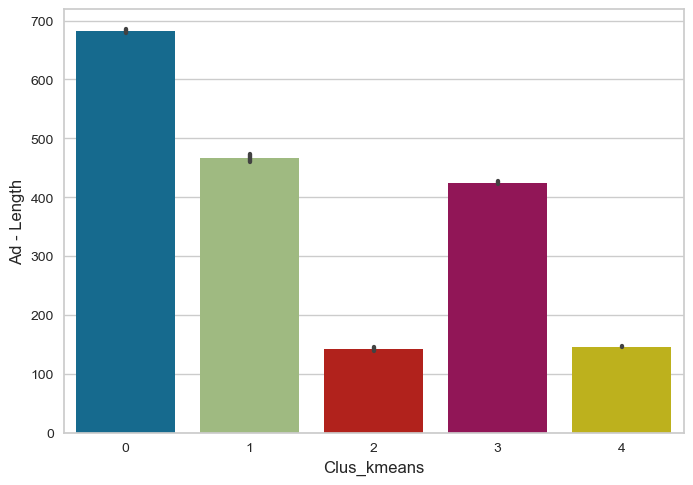

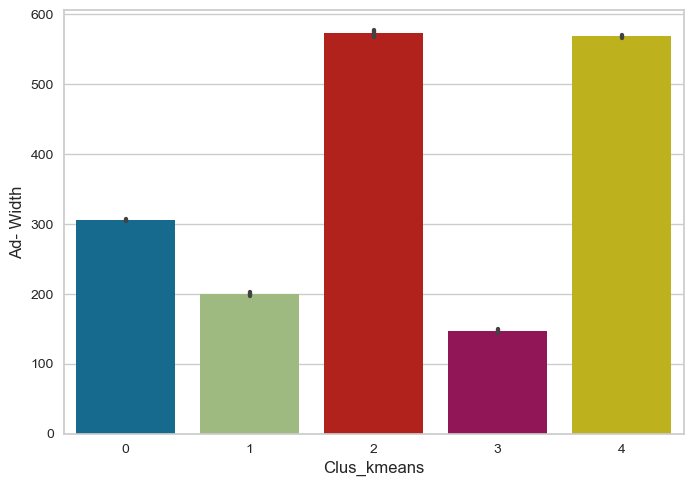

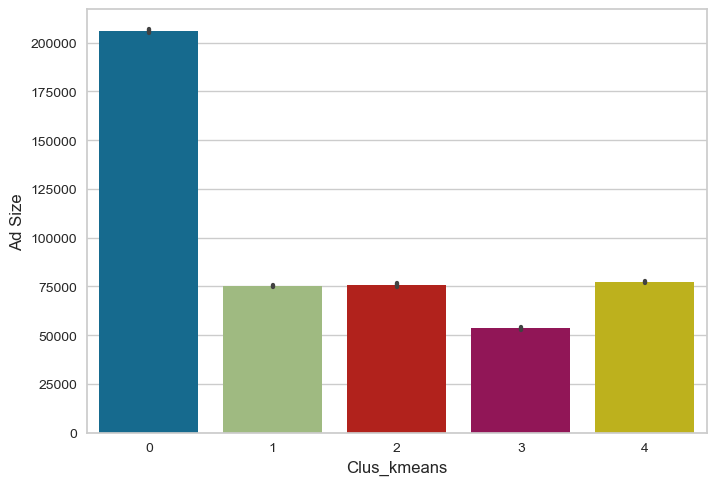

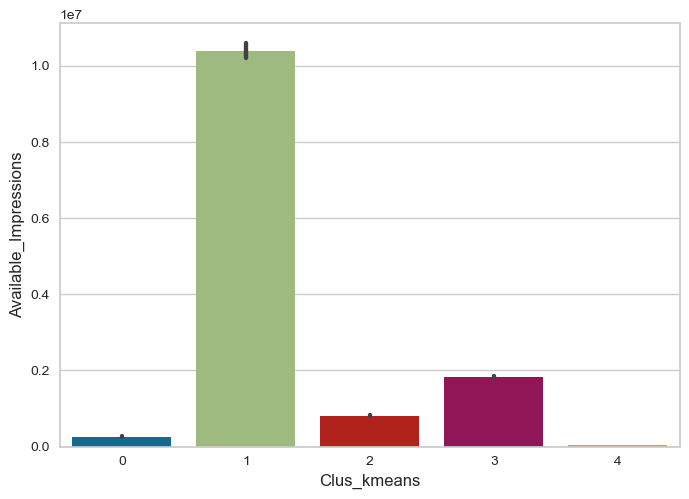

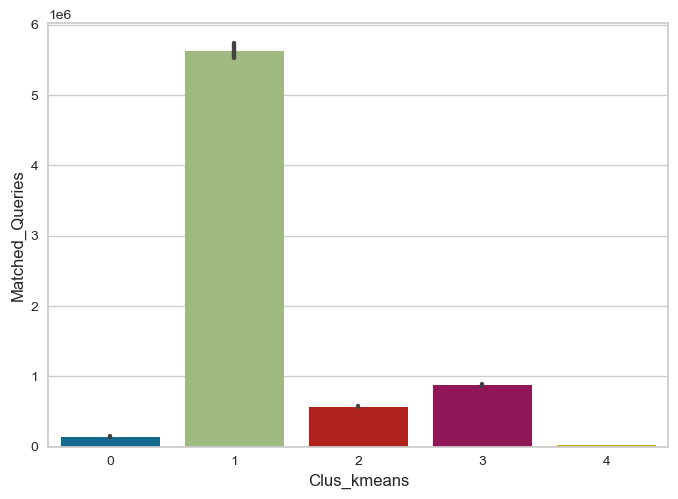

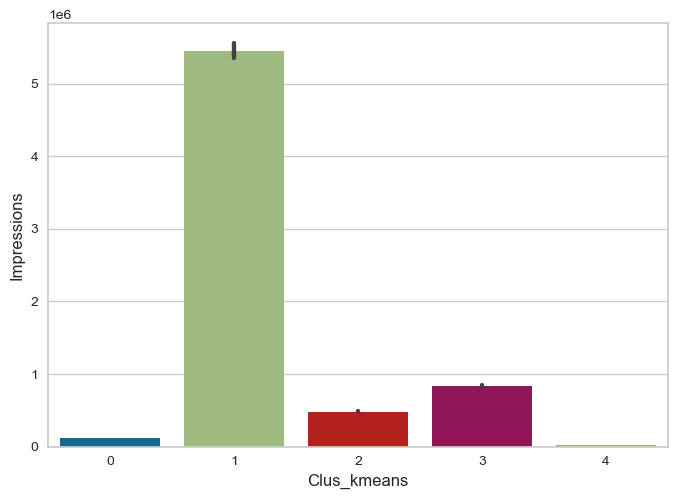

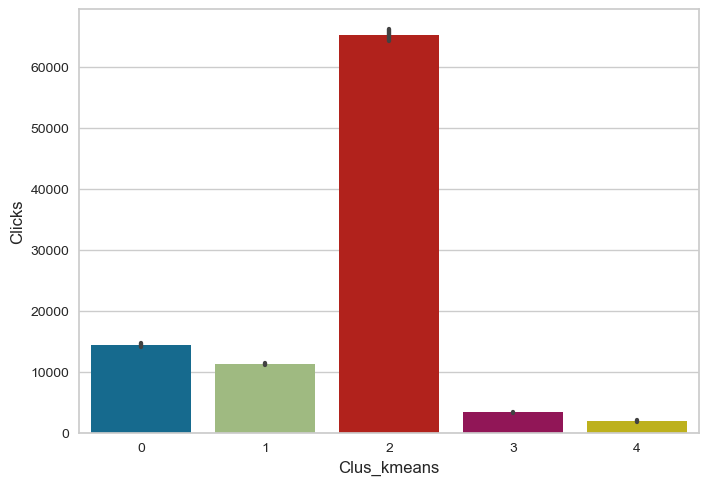

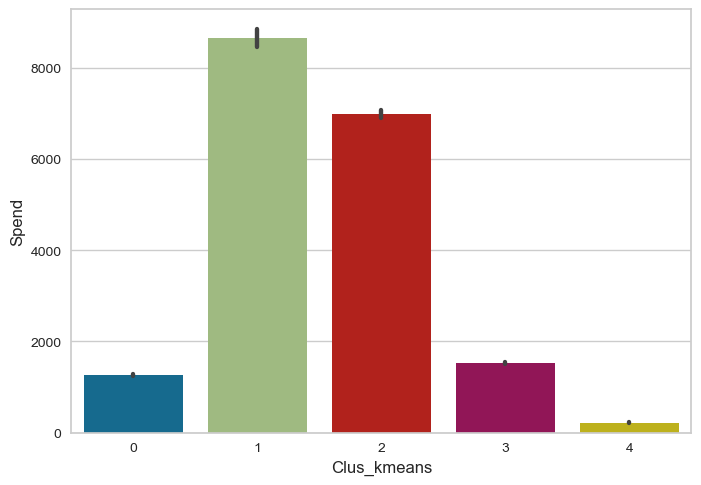

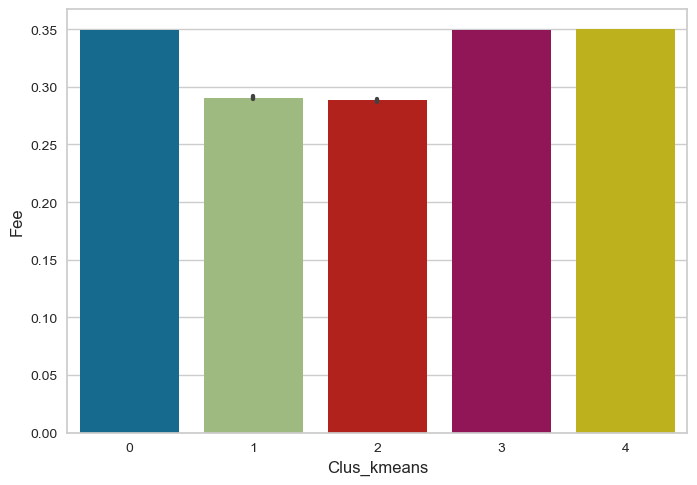

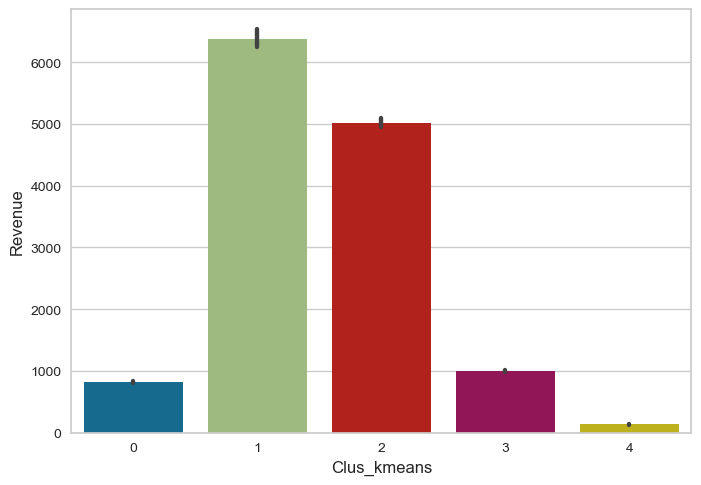

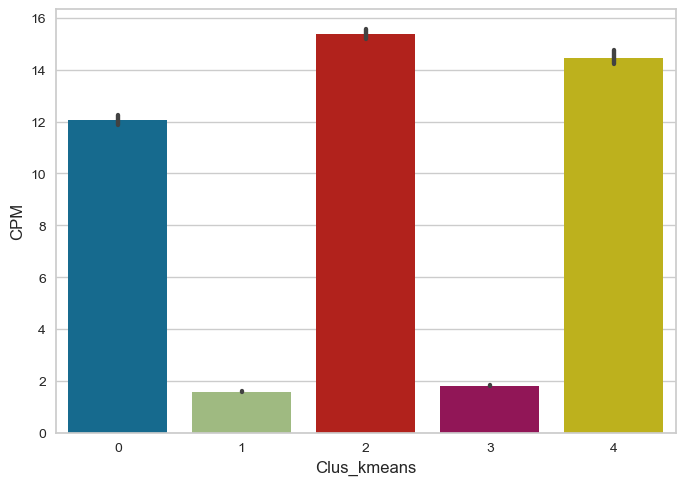

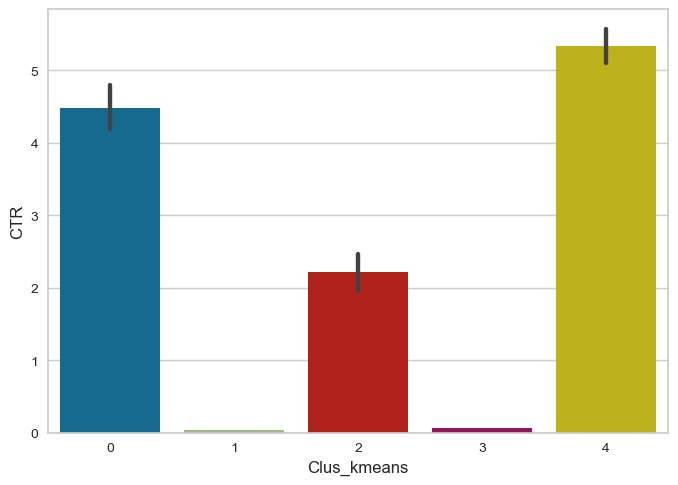

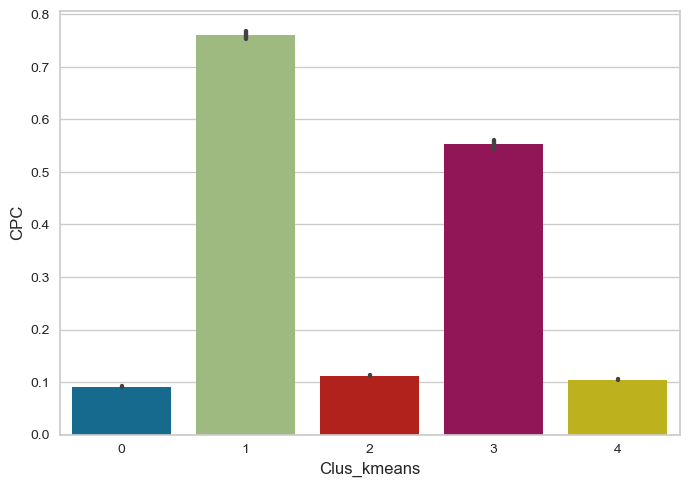

In [375]:
cols_visualise = ['Ad - Length','Ad- Width','Ad Size','Available_Impressions','Matched_Queries','Impressions','Clicks', 'Spend', 'Fee','Revenue', 'CPM', 'CTR', 'CPC']

for col in cols_visualise:
    sns.barplot(x = 'Clus_kmeans', y = col, data = digital_ads)
    plt.show();

In [376]:
print(digital_ads.columns)

Index(['Timestamp', 'InventoryType', 'Ad - Length', 'Ad- Width', 'Ad Size',
       'Ad Type', 'Platform', 'Device Type', 'Format', 'Available_Impressions',
       'Matched_Queries', 'Impressions', 'Clicks', 'Spend', 'Fee', 'Revenue',
       'CTR', 'CPM', 'CPC', 'Clus_kmeans'],
      dtype='object')


In [377]:
metrics= ['Clicks','Spend','Fee','Revenue','CTR','CPM','CPC']
clust_profile=digital_ads.groupby(['Clus_kmeans','Device Type'])[metrics].mean().reset_index()
clust_profile['freq']=digital_ads.Clus_kmeans.value_counts().sort_index()
clust_profile

Clus_kmeans Device Type        Clicks        Spend       Fee      Revenue  \
0            0     Desktop  14501.612634  1253.277342  0.349547   816.130957   
1            0      Mobile  14283.292618  1254.521440  0.349543   816.992263   
2            1     Desktop  11327.692886  8647.606334  0.290773  6374.965943   
3            1      Mobile  11212.350599  8656.117445  0.290166  6380.773762   
4            2     Desktop  65203.080645  6965.583154  0.288548  4997.376742   
5            2      Mobile  65292.810398  6996.683690  0.288247  5023.118841   
6            3     Desktop   3311.025688  1522.011083  0.349257   991.712318   
7            3      Mobile   3300.514271  1525.300859  0.349222   993.942780   
8            4     Desktop   1918.356003   208.883552  0.349992   135.799904   
9            4      Mobile   1871.743072   210.706956  0.349991   136.988601   

        CTR        CPM       CPC    freq  
0  4.443102  12.022119  0.090368  4699.0  
1  4.490260  12.059322  0.091430  4049.0  
2  0.034836   1.560723  0.754071  1539.0  
3  0.033795   1.579737  0.764452  6139.0  
4  2.287759  15.440287  0.111979  6640.0  
5  2.162678  15.361408  0.111910     NaN  
6  0.061328   1.810714  0.549474     NaN  
7  0.063187   1.803111  0.554132     NaN  
8  5.314257  14.262153  0.104181     NaN  
9  5.334641  14.552033  0.104555     NaN

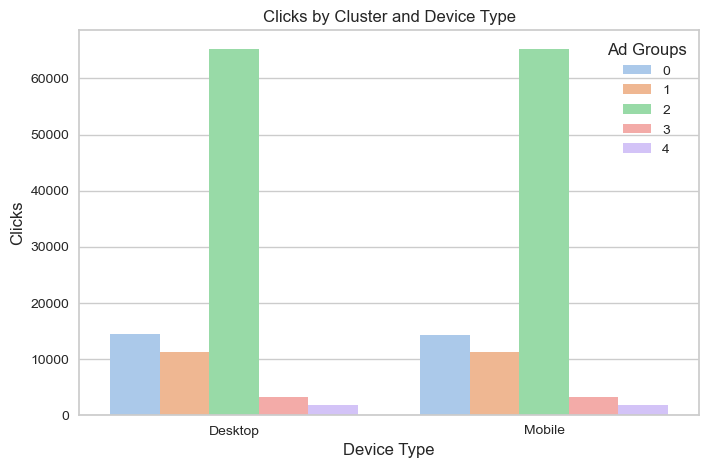

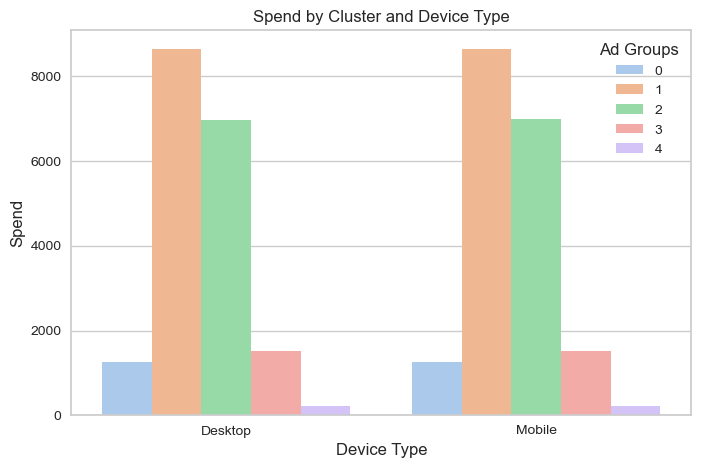

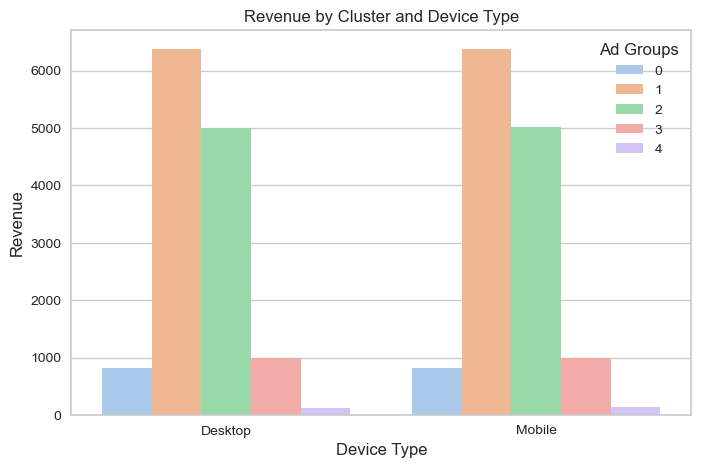

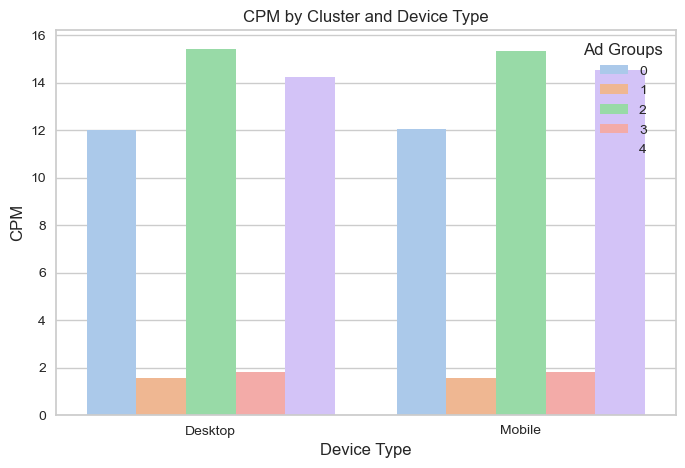

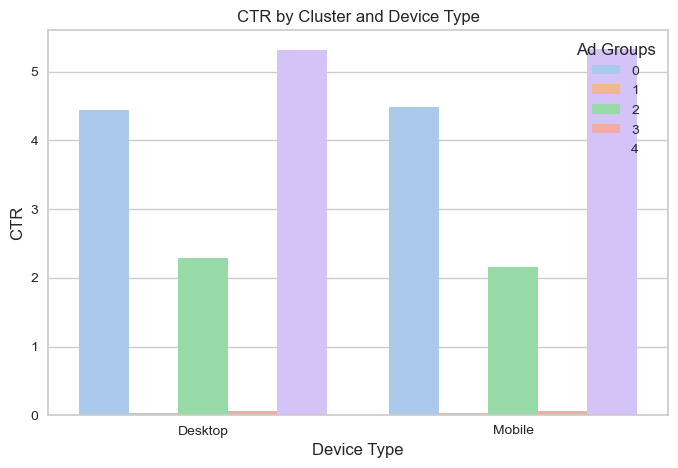

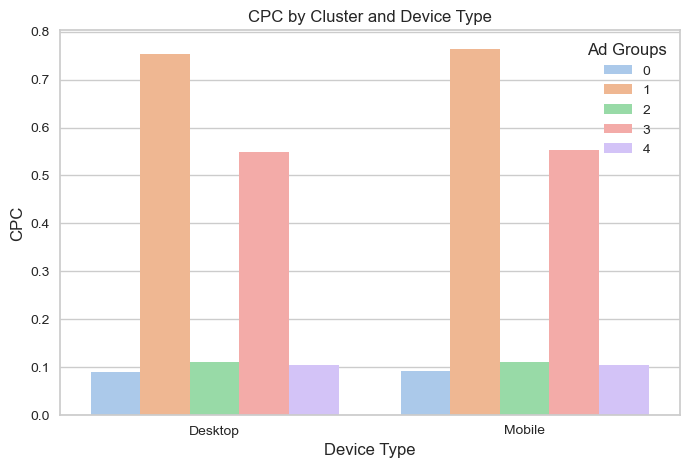

In [378]:
cols_visualise = ['Clicks', 'Spend', 'Revenue', 'CPM', 'CTR', 'CPC']

for col in cols_visualise:
    plt.figure(figsize=(8, 5))
    sns.barplot(x = 'Device Type', y = col,data = digital_ads ,hue='Clus_kmeans', palette='pastel',ci=None)
    plt.title(f'{col} by Cluster and Device Type')
    plt.legend(title='Ad Groups', loc='upper right')
    plt.show();

In [379]:
digital_ads.to_csv('FinalClustering.csv')

## Part 2 

In [380]:
census= pd.read_excel("PCA+India+Data_Census.xlsx")

In [381]:
census.head()

State Code  Dist.Code            State    Area Name  No_HH  TOT_M  TOT_F  \
0           1          1  Jammu & Kashmir      Kupwara   7707  23388  29796   
1           1          2  Jammu & Kashmir       Badgam   6218  19585  23102   
2           1          3  Jammu & Kashmir  Leh(Ladakh)   4452   6546  10964   
3           1          4  Jammu & Kashmir       Kargil   1320   2784   4206   
4           1          5  Jammu & Kashmir        Punch  11654  20591  29981   

   M_06  F_06  M_SC  ...  MARG_CL_0_3_M  MARG_CL_0_3_F  MARG_AL_0_3_M  \
0  5862  6196     3  ...           1150            749            180   
1  4482  3733     7  ...            525            715            123   
2  1082  1018     3  ...            114            188             44   
3   563   677     0  ...            194            247             61   
4  5157  4587    20  ...            874           1928            465   

   MARG_AL_0_3_F  MARG_HH_0_3_M  MARG_HH_0_3_F  MARG_OT_0_3_M  MARG_OT_0_3_F  \
0            237            680            252             32             46   
1            229            186            148             76            178   
2             89              3             34              0              4   
3            128             13             50              4             10   
4           1043            205            302             24            105   

   NON_WORK_M  NON_WORK_F  
0         258         214  
1         140         160  
2          67          61  
3         116          59  
4         180         478  

[5 rows x 61 columns]

In [382]:
census.tail()

State Code  Dist.Code                     State                Area Name  \
635          34        636                Puducherry                     Mahe   
636          34        637                Puducherry                 Karaikal   
637          35        638  Andaman & Nicobar Island                 Nicobars   
638          35        639  Andaman & Nicobar Island  North  & Middle Andaman   
639          35        640  Andaman & Nicobar Island            South Andaman   

     No_HH  TOT_M  TOT_F  M_06  F_06  M_SC  ...  MARG_CL_0_3_M  MARG_CL_0_3_F  \
635   3333   8154  11781  1146  1203    21  ...             32             47   
636  10612  12346  21691  1544  1533  2234  ...            155            337   
637   1275   1549   2630   227   225     0  ...            104            134   
638   3762   5200   8012   723   664     0  ...            136            172   
639   7975  11977  18049  1470  1358     0  ...            173            122   

     MARG_AL_0_3_M  MARG_AL_0_3_F  MARG_HH_0_3_M  MARG_HH_0_3_F  \
635              0              0              0              0   
636              3             14             38            130   
637              9              4              2              6   
638             24             44             11             21   
639              6              2             17             17   

     MARG_OT_0_3_M  MARG_OT_0_3_F  NON_WORK_M  NON_WORK_F  
635              0              0          32          47  
636              4             23         110         170  
637             17             47          76          77  
638              1              4         100         103  
639              2              4         148          99  

[5 rows x 61 columns]

In [383]:
census.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 640 entries, 0 to 639
Data columns (total 61 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   State Code      640 non-null    int64 
 1   Dist.Code       640 non-null    int64 
 2   State           640 non-null    object
 3   Area Name       640 non-null    object
 4   No_HH           640 non-null    int64 
 5   TOT_M           640 non-null    int64 
 6   TOT_F           640 non-null    int64 
 7   M_06            640 non-null    int64 
 8   F_06            640 non-null    int64 
 9   M_SC            640 non-null    int64 
 10  F_SC            640 non-null    int64 
 11  M_ST            640 non-null    int64 
 12  F_ST            640 non-null    int64 
 13  M_LIT           640 non-null    int64 
 14  F_LIT           640 non-null    int64 
 15  M_ILL           640 non-null    int64 
 16  F_ILL           640 non-null    int64 
 17  TOT_WORK_M      640 non-null    int64 
 18  TOT_WORK_F

In [384]:
census.describe()

State Code   Dist.Code          No_HH          TOT_M          TOT_F  \
count  640.000000  640.000000     640.000000     640.000000     640.000000   
mean    17.114062  320.500000   51222.871875   79940.576563  122372.084375   
std      9.426486  184.896367   48135.405475   73384.511114  113600.717282   
min      1.000000    1.000000     350.000000     391.000000     698.000000   
25%      9.000000  160.750000   19484.000000   30228.000000   46517.750000   
50%     18.000000  320.500000   35837.000000   58339.000000   87724.500000   
75%     24.000000  480.250000   68892.000000  107918.500000  164251.750000   
max     35.000000  640.000000  310450.000000  485417.000000  750392.000000   

               M_06          F_06           M_SC           F_SC          M_ST  \
count    640.000000    640.000000     640.000000     640.000000    640.000000   
mean   12309.098438  11942.300000   13820.946875   20778.392188   6191.807813   
std    11500.906881  11326.294567   14426.373130   21727.887713   9912.668948   
min       56.000000     56.000000       0.000000       0.000000      0.000000   
25%     4733.750000   4672.250000    3466.250000    5603.250000    293.750000   
50%     9159.000000   8663.000000    9591.500000   13709.000000   2333.500000   
75%    16520.250000  15902.250000   19429.750000   29180.000000   7658.000000   
max    96223.000000  95129.000000  103307.000000  156429.000000  96785.000000   

       ...  MARG_CL_0_3_M  MARG_CL_0_3_F  MARG_AL_0_3_M  MARG_AL_0_3_F  \
count  ...     640.000000     640.000000     640.000000     640.000000   
mean   ...    1392.973438    2757.050000     250.889062     558.098438   
std    ...    1489.707052    2788.776676     453.336594    1117.642748   
min    ...       4.000000      30.000000       0.000000       0.000000   
25%    ...     489.500000     957.250000      47.000000     109.000000   
50%    ...     949.000000    1928.000000     114.500000     247.500000   
75%    ...    1714.000000    3599.750000     270.750000     568.750000   
max    ...    9875.000000   21611.000000    5775.000000   17153.000000   

       MARG_HH_0_3_M  MARG_HH_0_3_F  MARG_OT_0_3_M  MARG_OT_0_3_F  \
count     640.000000     640.000000     640.000000     640.000000   
mean      560.690625    1293.431250      71.379688     200.742188   
std       762.578991    1585.377936     107.897627     309.740854   
min         0.000000       0.000000       0.000000       0.000000   
25%       136.500000     298.000000      14.000000      43.000000   
50%       308.000000     717.000000      35.000000     113.000000   
75%       642.000000    1710.750000      79.000000     240.000000   
max      6116.000000   13714.000000     895.000000    3354.000000   

        NON_WORK_M    NON_WORK_F  
count   640.000000    640.000000  
mean    510.014063    704.778125  
std     610.603187    910.209225  
min       0.000000      5.000000  
25%     161.000000    220.500000  
50%     326.000000    464.500000  
75%     604.500000    853.500000  
max    6456.000000  10533.000000  

[8 rows x 59 columns]

In [385]:
census.shape

(640, 61)

In [386]:
census.duplicated().sum()

0

In [387]:
census.isnull().sum()

State Code       0
Dist.Code        0
State            0
Area Name        0
No_HH            0
                ..
MARG_HH_0_3_F    0
MARG_OT_0_3_M    0
MARG_OT_0_3_F    0
NON_WORK_M       0
NON_WORK_F       0
Length: 61, dtype: int64

In [388]:
census.isnull().sum().head(31)

State Code    0
Dist.Code     0
State         0
Area Name     0
No_HH         0
TOT_M         0
TOT_F         0
M_06          0
F_06          0
M_SC          0
F_SC          0
M_ST          0
F_ST          0
M_LIT         0
F_LIT         0
M_ILL         0
F_ILL         0
TOT_WORK_M    0
TOT_WORK_F    0
MAINWORK_M    0
MAINWORK_F    0
MAIN_CL_M     0
MAIN_CL_F     0
MAIN_AL_M     0
MAIN_AL_F     0
MAIN_HH_M     0
MAIN_HH_F     0
MAIN_OT_M     0
MAIN_OT_F     0
MARGWORK_M    0
MARGWORK_F    0
dtype: int64

In [389]:
census.isnull().sum().tail(31)

MARGWORK_F        0
MARG_CL_M         0
MARG_CL_F         0
MARG_AL_M         0
MARG_AL_F         0
MARG_HH_M         0
MARG_HH_F         0
MARG_OT_M         0
MARG_OT_F         0
MARGWORK_3_6_M    0
MARGWORK_3_6_F    0
MARG_CL_3_6_M     0
MARG_CL_3_6_F     0
MARG_AL_3_6_M     0
MARG_AL_3_6_F     0
MARG_HH_3_6_M     0
MARG_HH_3_6_F     0
MARG_OT_3_6_M     0
MARG_OT_3_6_F     0
MARGWORK_0_3_M    0
MARGWORK_0_3_F    0
MARG_CL_0_3_M     0
MARG_CL_0_3_F     0
MARG_AL_0_3_M     0
MARG_AL_0_3_F     0
MARG_HH_0_3_M     0
MARG_HH_0_3_F     0
MARG_OT_0_3_M     0
MARG_OT_0_3_F     0
NON_WORK_M        0
NON_WORK_F        0
dtype: int64

In [390]:
census['Gender ratio']= (census['TOT_M']*1000)/census['TOT_F']

In [391]:
census['Gender ratio']

0      784.937576
1      847.762099
2      597.044874
3      661.911555
4      686.801641
          ...    
635    692.131398
636    569.176156
637    588.973384
638    649.026460
639    663.582470
Name: Gender ratio, Length: 640, dtype: float64

In [392]:
census.head(5)

State Code  Dist.Code            State    Area Name  No_HH  TOT_M  TOT_F  \
0           1          1  Jammu & Kashmir      Kupwara   7707  23388  29796   
1           1          2  Jammu & Kashmir       Badgam   6218  19585  23102   
2           1          3  Jammu & Kashmir  Leh(Ladakh)   4452   6546  10964   
3           1          4  Jammu & Kashmir       Kargil   1320   2784   4206   
4           1          5  Jammu & Kashmir        Punch  11654  20591  29981   

   M_06  F_06  M_SC  ...  MARG_CL_0_3_F  MARG_AL_0_3_M  MARG_AL_0_3_F  \
0  5862  6196     3  ...            749            180            237   
1  4482  3733     7  ...            715            123            229   
2  1082  1018     3  ...            188             44             89   
3   563   677     0  ...            247             61            128   
4  5157  4587    20  ...           1928            465           1043   

   MARG_HH_0_3_M  MARG_HH_0_3_F  MARG_OT_0_3_M  MARG_OT_0_3_F  NON_WORK_M  \
0            680            252             32             46         258   
1            186            148             76            178         140   
2              3             34              0              4          67   
3             13             50              4             10         116   
4            205            302             24            105         180   

   NON_WORK_F  Gender ratio  
0         214    784.937576  
1         160    847.762099  
2          61    597.044874  
3          59    661.911555  
4         478    686.801641  

[5 rows x 62 columns]

In [393]:
a=census.groupby(['State'])['Gender ratio'].sum().sort_values(ascending=False)
a

State
Uttar Pradesh               54132.937245
Madhya Pradesh              31775.695694
Bihar                       28359.179844
Rajasthan                   22689.095737
Maharashtra                 20137.830181
Karnataka                   19094.178717
Assam                       18512.947635
Tamil Nadu                  17342.585846
Gujarat                     17221.226828
Odisha                      16659.085662
Haryana                     16332.590075
Jharkhand                   16263.942064
Jammu & Kashmir             16016.296979
Punjab                      14956.868233
West Bengal                 12337.016850
Andhra Pradesh              12303.635809
Chhattisgarh                 9673.837123
Arunachal Pradesh            9148.075615
Kerala                       8284.307828
Uttarakhand                  8045.597434
Himachal Pradesh             7545.342854
NCT of Delhi                 6897.924454
Nagaland                     6467.275656
Manipur                      5773.922018
Meghalaya 

In [394]:
a=census.groupby(['Area Name'])['Gender ratio'].sum().sort_values(ascending=False)
a

Area Name
Aurangabad       1380.559600
Hamirpur         1343.379253
Bilaspur         1247.883501
Bijapur          1158.490941
Raigarh          1040.772462
                    ...     
Baudh             451.455047
West Godavari     450.075676
Virudhunagar      449.351612
Koraput           440.768731
Krishna           437.972258
Name: Gender ratio, Length: 635, dtype: float64

In [395]:
df_num = census.select_dtypes(include = ['int64'])
lstnumericcolumns = list(df_num.columns.values)
len(lstnumericcolumns)

59

In [396]:
lstnumericcolumns

['State Code',
 'Dist.Code',
 'No_HH',
 'TOT_M',
 'TOT_F',
 'M_06',
 'F_06',
 'M_SC',
 'F_SC',
 'M_ST',
 'F_ST',
 'M_LIT',
 'F_LIT',
 'M_ILL',
 'F_ILL',
 'TOT_WORK_M',
 'TOT_WORK_F',
 'MAINWORK_M',
 'MAINWORK_F',
 'MAIN_CL_M',
 'MAIN_CL_F',
 'MAIN_AL_M',
 'MAIN_AL_F',
 'MAIN_HH_M',
 'MAIN_HH_F',
 'MAIN_OT_M',
 'MAIN_OT_F',
 'MARGWORK_M',
 'MARGWORK_F',
 'MARG_CL_M',
 'MARG_CL_F',
 'MARG_AL_M',
 'MARG_AL_F',
 'MARG_HH_M',
 'MARG_HH_F',
 'MARG_OT_M',
 'MARG_OT_F',
 'MARGWORK_3_6_M',
 'MARGWORK_3_6_F',
 'MARG_CL_3_6_M',
 'MARG_CL_3_6_F',
 'MARG_AL_3_6_M',
 'MARG_AL_3_6_F',
 'MARG_HH_3_6_M',
 'MARG_HH_3_6_F',
 'MARG_OT_3_6_M',
 'MARG_OT_3_6_F',
 'MARGWORK_0_3_M',
 'MARGWORK_0_3_F',
 'MARG_CL_0_3_M',
 'MARG_CL_0_3_F',
 'MARG_AL_0_3_M',
 'MARG_AL_0_3_F',
 'MARG_HH_0_3_M',
 'MARG_HH_0_3_F',
 'MARG_OT_0_3_M',
 'MARG_OT_0_3_F',
 'NON_WORK_M',
 'NON_WORK_F']

In [397]:
lstnumericcolumns.remove('State Code')

In [398]:
lstnumericcolumns.remove('Dist.Code')

In [399]:
len(lstnumericcolumns)

57

In [400]:
def univariateAnalysis_numeric(column,nbins):
    print("Description of " + column)
    print("----------------------------------------------------------------------------")
    print(census[column].describe(),end=' ')
    print('\n\nSkew :',round(census[column].skew(),2))
    print('\n')
    plt.figure(figsize=(15,4))
    print("Distribution of " + column)
    print("----------------------------------------------------------------------------")
    plt.subplot(1,2,1)
    df2[column].hist(bins=10, grid=False)
    plt.ylabel('count')
    plt.subplot(1,2,2)
    sns.boxplot(x=census[column])
    plt.show()

Description of No_HH
----------------------------------------------------------------------------
count       640.000000
mean      51222.871875
std       48135.405475
min         350.000000
25%       19484.000000
50%       35837.000000
75%       68892.000000
max      310450.000000
Name: No_HH, dtype: float64 

Skew : 2.02


Distribution of No_HH
----------------------------------------------------------------------------


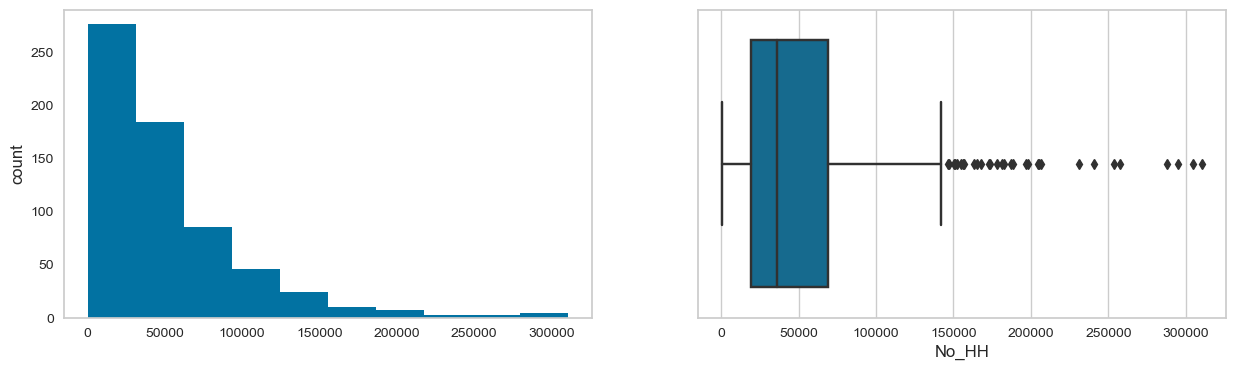

Description of TOT_M
----------------------------------------------------------------------------
count       640.000000
mean      79940.576563
std       73384.511114
min         391.000000
25%       30228.000000
50%       58339.000000
75%      107918.500000
max      485417.000000
Name: TOT_M, dtype: float64 

Skew : 2.03


Distribution of TOT_M
----------------------------------------------------------------------------


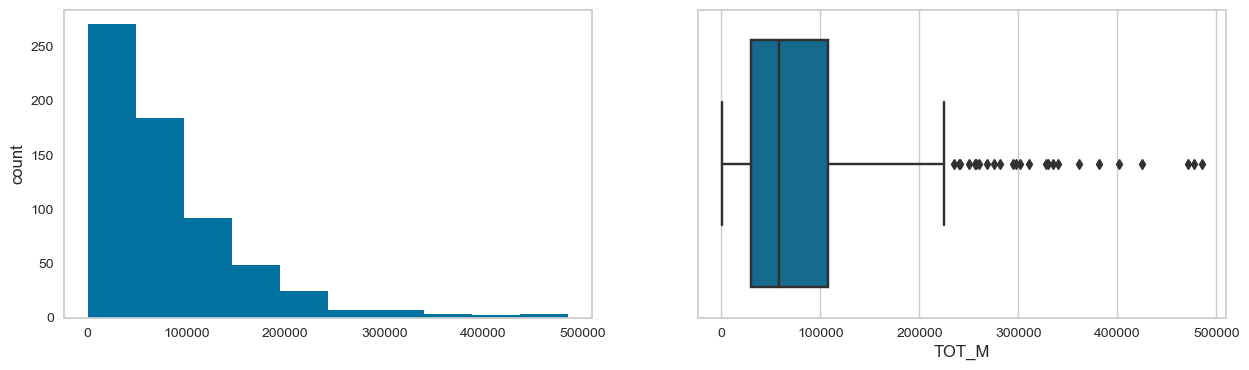

Description of TOT_F
----------------------------------------------------------------------------
count       640.000000
mean     122372.084375
std      113600.717282
min         698.000000
25%       46517.750000
50%       87724.500000
75%      164251.750000
max      750392.000000
Name: TOT_F, dtype: float64 

Skew : 2.11


Distribution of TOT_F
----------------------------------------------------------------------------


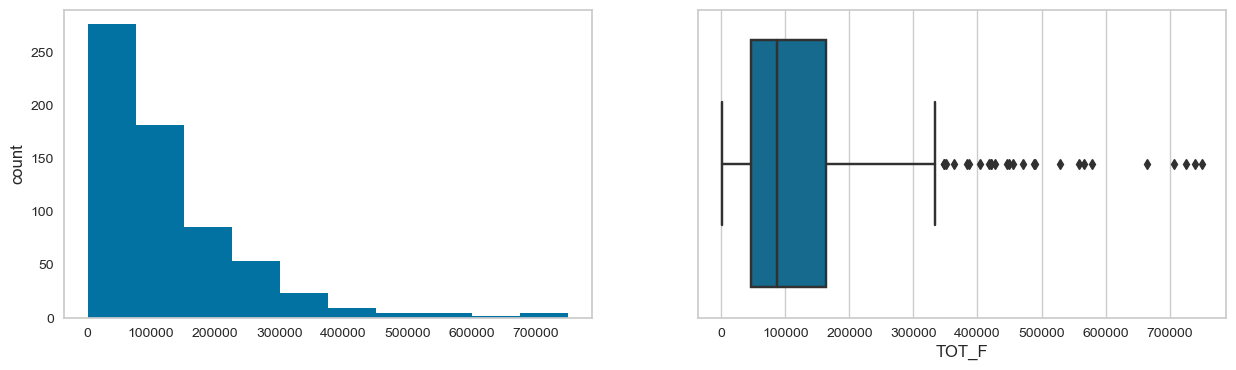

Description of M_06
----------------------------------------------------------------------------
count      640.000000
mean     12309.098438
std      11500.906881
min         56.000000
25%       4733.750000
50%       9159.000000
75%      16520.250000
max      96223.000000
Name: M_06, dtype: float64 

Skew : 2.19


Distribution of M_06
----------------------------------------------------------------------------


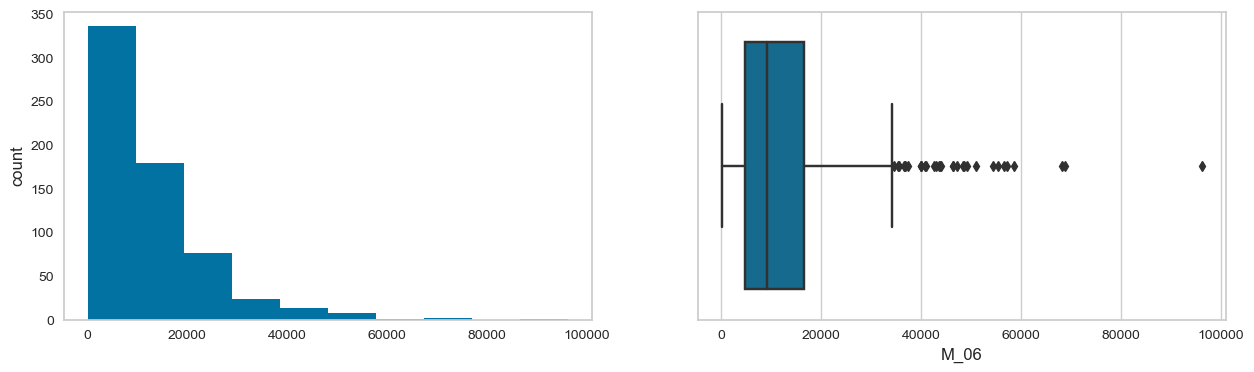

Description of F_06
----------------------------------------------------------------------------
count      640.000000
mean     11942.300000
std      11326.294567
min         56.000000
25%       4672.250000
50%       8663.000000
75%      15902.250000
max      95129.000000
Name: F_06, dtype: float64 

Skew : 2.23


Distribution of F_06
----------------------------------------------------------------------------


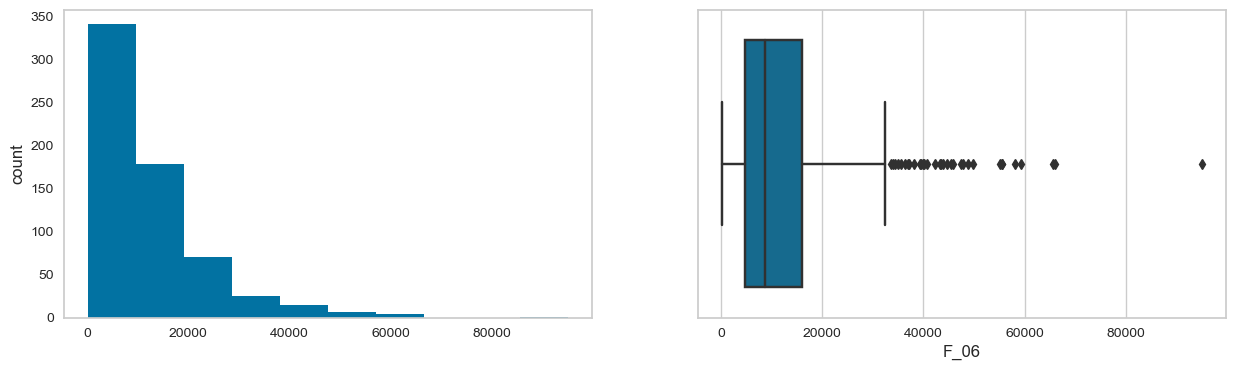

Description of M_SC
----------------------------------------------------------------------------
count       640.000000
mean      13820.946875
std       14426.373130
min           0.000000
25%        3466.250000
50%        9591.500000
75%       19429.750000
max      103307.000000
Name: M_SC, dtype: float64 

Skew : 1.99


Distribution of M_SC
----------------------------------------------------------------------------


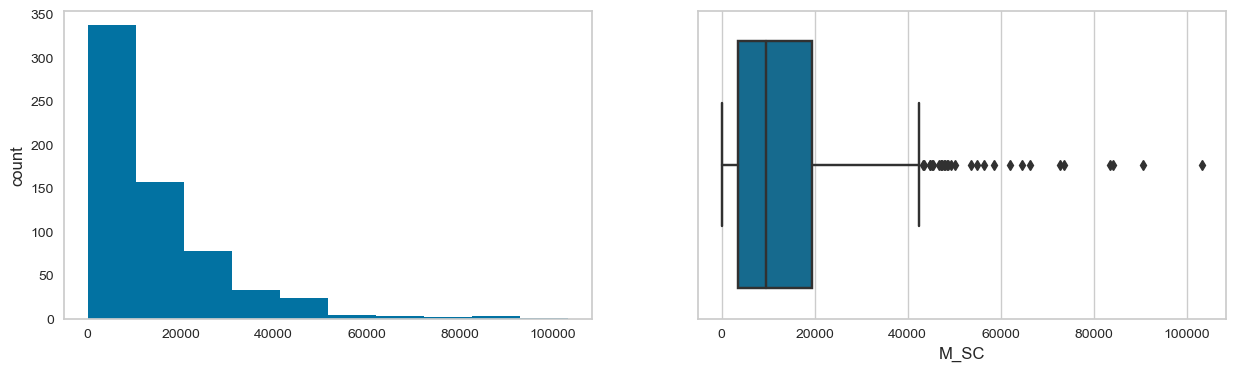

Description of F_SC
----------------------------------------------------------------------------
count       640.000000
mean      20778.392188
std       21727.887713
min           0.000000
25%        5603.250000
50%       13709.000000
75%       29180.000000
max      156429.000000
Name: F_SC, dtype: float64 

Skew : 1.99


Distribution of F_SC
----------------------------------------------------------------------------


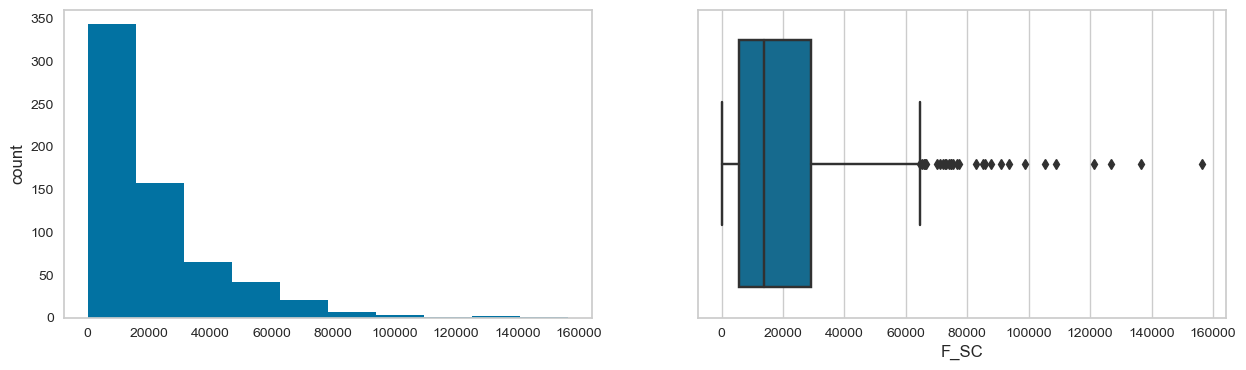

Description of M_ST
----------------------------------------------------------------------------
count      640.000000
mean      6191.807813
std       9912.668948
min          0.000000
25%        293.750000
50%       2333.500000
75%       7658.000000
max      96785.000000
Name: M_ST, dtype: float64 

Skew : 3.44


Distribution of M_ST
----------------------------------------------------------------------------


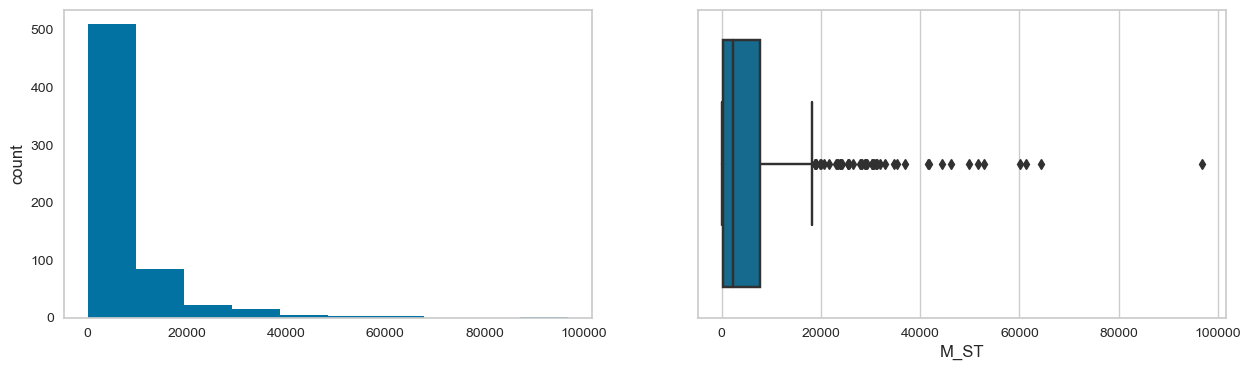

Description of F_ST
----------------------------------------------------------------------------
count       640.000000
mean      10155.640625
std       15875.701488
min           0.000000
25%         429.500000
50%        3834.500000
75%       12480.250000
max      130119.000000
Name: F_ST, dtype: float64 

Skew : 2.98


Distribution of F_ST
----------------------------------------------------------------------------


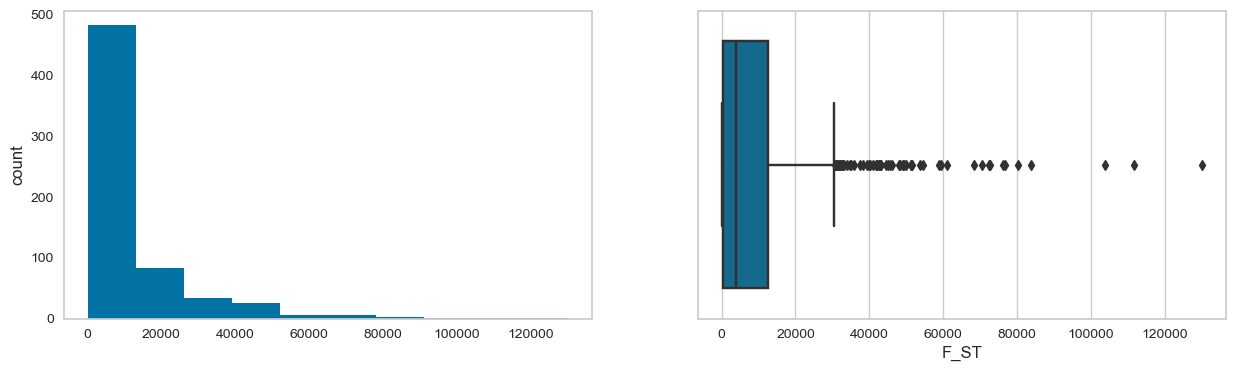

Description of M_LIT
----------------------------------------------------------------------------
count       640.000000
mean      57967.979688
std       55910.282466
min         286.000000
25%       21298.000000
50%       42693.500000
75%       77989.500000
max      403261.000000
Name: M_LIT, dtype: float64 

Skew : 2.34


Distribution of M_LIT
----------------------------------------------------------------------------


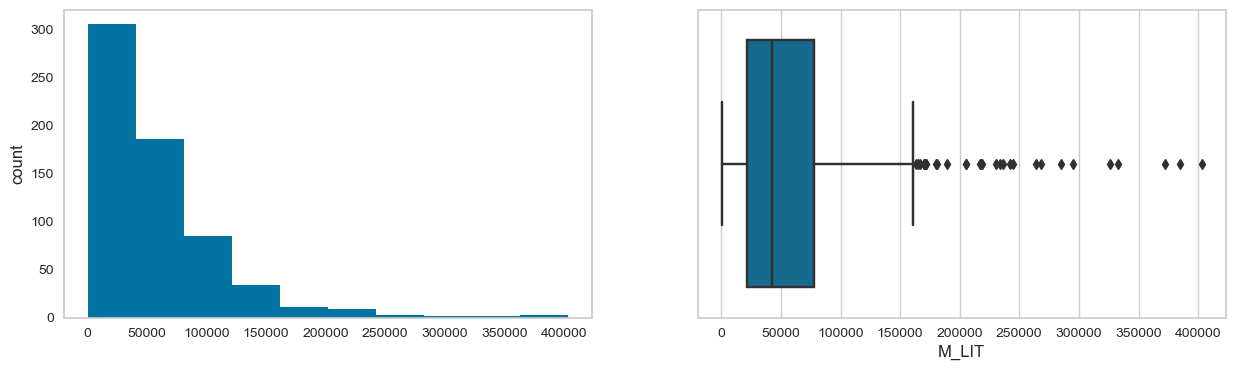

Description of F_LIT
----------------------------------------------------------------------------
count       640.000000
mean      66359.565625
std       75037.860207
min         371.000000
25%       20932.000000
50%       43796.500000
75%       84799.750000
max      571140.000000
Name: F_LIT, dtype: float64 

Skew : 3.15


Distribution of F_LIT
----------------------------------------------------------------------------


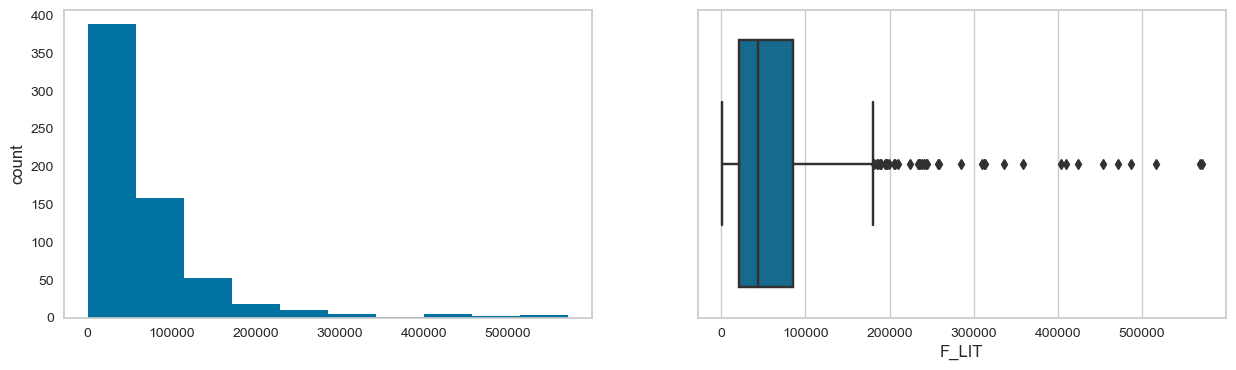

Description of M_ILL
----------------------------------------------------------------------------
count       640.000000
mean      21972.596875
std       19825.605268
min         105.000000
25%        8590.000000
50%       15767.500000
75%       29512.500000
max      105961.000000
Name: M_ILL, dtype: float64 

Skew : 1.58


Distribution of M_ILL
----------------------------------------------------------------------------


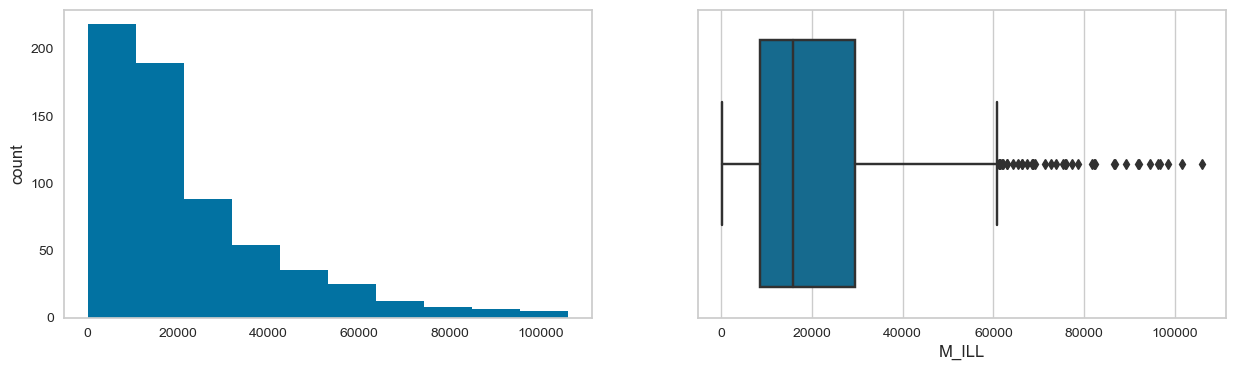

Description of F_ILL
----------------------------------------------------------------------------
count       640.000000
mean      56012.518750
std       47116.693769
min         327.000000
25%       22367.000000
50%       42386.000000
75%       78471.000000
max      254160.000000
Name: F_ILL, dtype: float64 

Skew : 1.34


Distribution of F_ILL
----------------------------------------------------------------------------


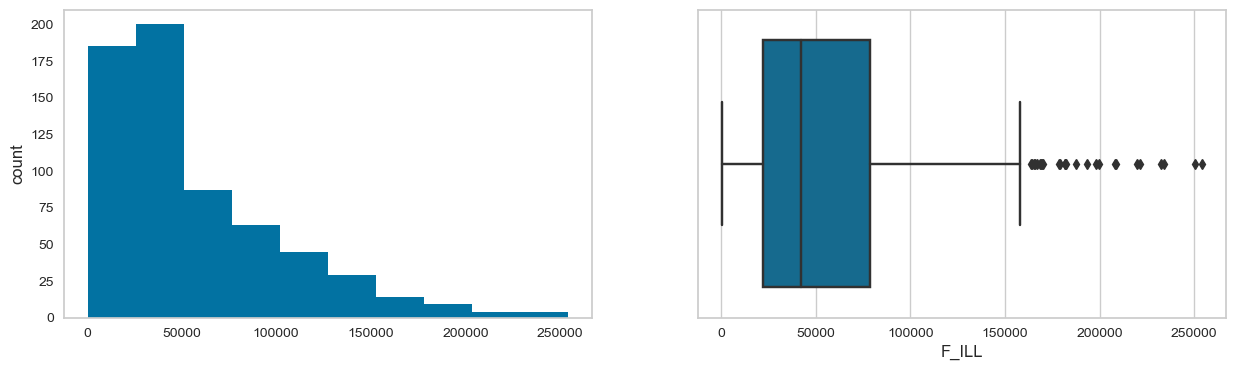

Description of TOT_WORK_M
----------------------------------------------------------------------------
count       640.000000
mean      37992.407813
std       36419.537491
min         100.000000
25%       13753.500000
50%       27936.500000
75%       50226.750000
max      269422.000000
Name: TOT_WORK_M, dtype: float64 

Skew : 2.3


Distribution of TOT_WORK_M
----------------------------------------------------------------------------


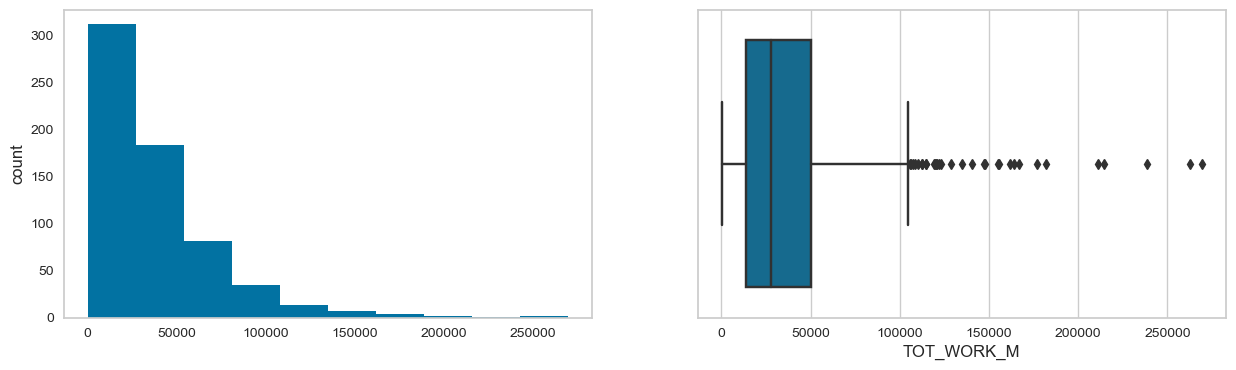

Description of TOT_WORK_F
----------------------------------------------------------------------------
count       640.000000
mean      41295.760938
std       37192.360943
min         357.000000
25%       16097.750000
50%       30588.500000
75%       53234.250000
max      257848.000000
Name: TOT_WORK_F, dtype: float64 

Skew : 1.93


Distribution of TOT_WORK_F
----------------------------------------------------------------------------


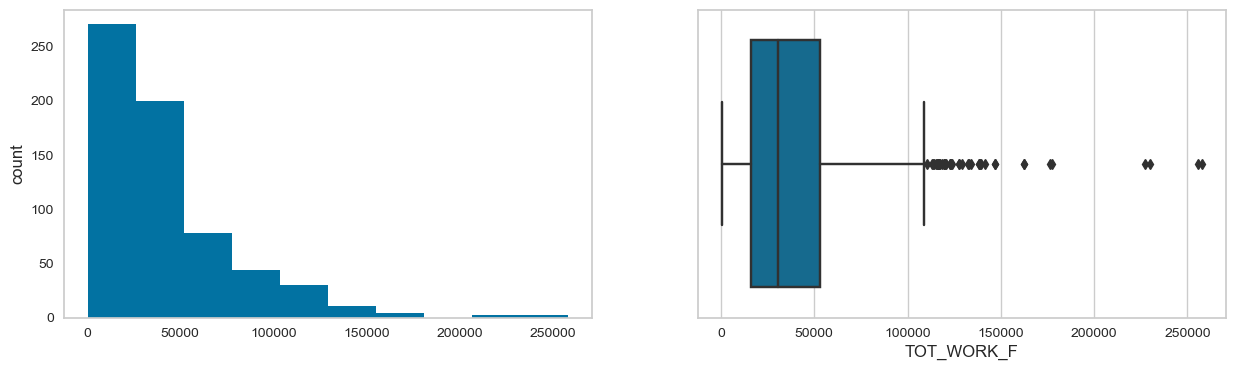

Description of MAINWORK_M
----------------------------------------------------------------------------
count       640.000000
mean      30204.446875
std       31480.915680
min          65.000000
25%        9787.000000
50%       21250.500000
75%       40119.000000
max      247911.000000
Name: MAINWORK_M, dtype: float64 

Skew : 2.63


Distribution of MAINWORK_M
----------------------------------------------------------------------------


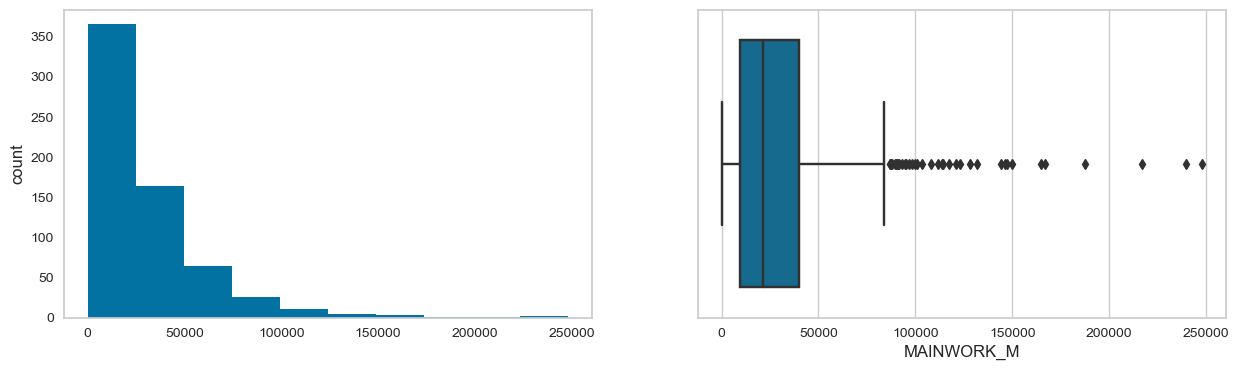

Description of MAINWORK_F
----------------------------------------------------------------------------
count       640.000000
mean      28198.846875
std       29998.262689
min         240.000000
25%        9502.250000
50%       18484.000000
75%       35063.250000
max      226166.000000
Name: MAINWORK_F, dtype: float64 

Skew : 2.55


Distribution of MAINWORK_F
----------------------------------------------------------------------------


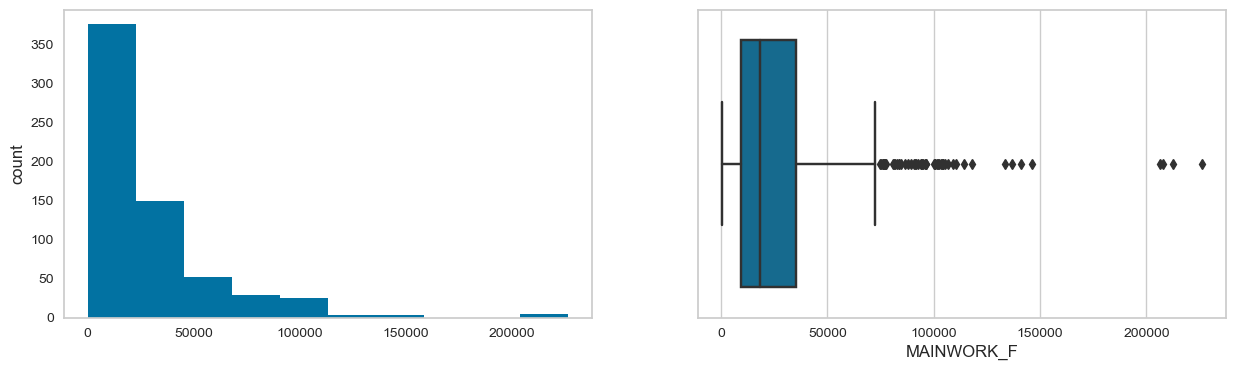

Description of MAIN_CL_M
----------------------------------------------------------------------------
count      640.000000
mean      5424.342188
std       4739.161969
min          0.000000
25%       2023.500000
50%       4160.500000
75%       7695.000000
max      29113.000000
Name: MAIN_CL_M, dtype: float64 

Skew : 1.68


Distribution of MAIN_CL_M
----------------------------------------------------------------------------


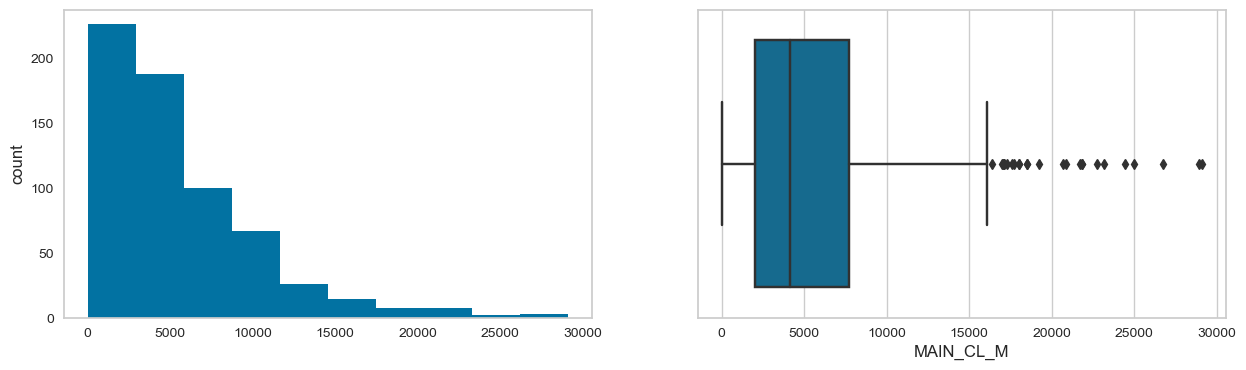

Description of MAIN_CL_F
----------------------------------------------------------------------------
count      640.000000
mean      5486.042188
std       5326.362728
min          0.000000
25%       1920.250000
50%       3908.500000
75%       7286.250000
max      36193.000000
Name: MAIN_CL_F, dtype: float64 

Skew : 2.38


Distribution of MAIN_CL_F
----------------------------------------------------------------------------


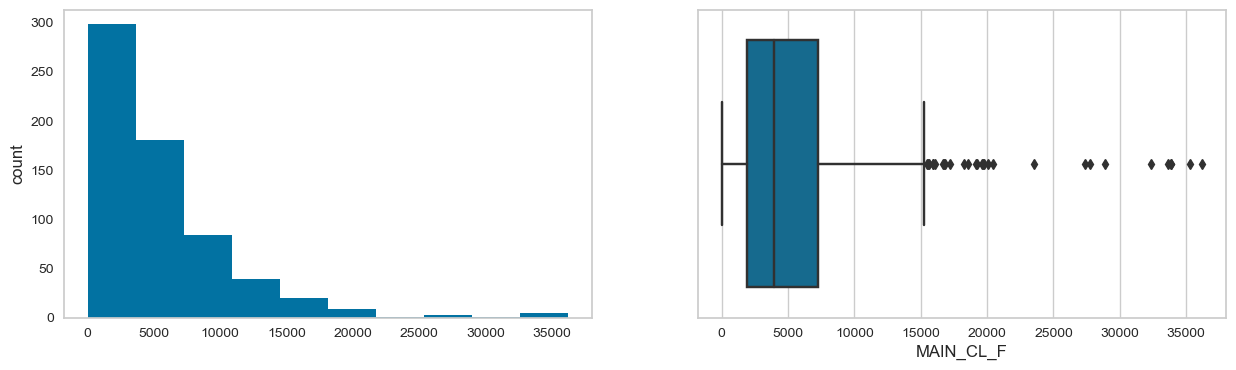

Description of MAIN_AL_M
----------------------------------------------------------------------------
count      640.000000
mean      5849.109375
std       6399.507966
min          0.000000
25%       1070.250000
50%       3936.500000
75%       8067.250000
max      40843.000000
Name: MAIN_AL_M, dtype: float64 

Skew : 1.88


Distribution of MAIN_AL_M
----------------------------------------------------------------------------


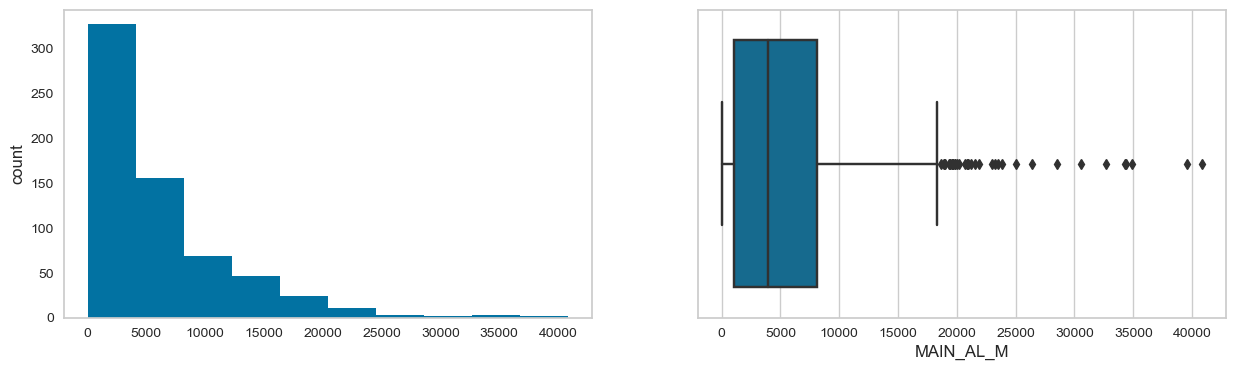

Description of MAIN_AL_F
----------------------------------------------------------------------------
count      640.000000
mean      8925.995312
std      12864.287584
min          0.000000
25%       1408.750000
50%       3933.500000
75%      10617.500000
max      87945.000000
Name: MAIN_AL_F, dtype: float64 

Skew : 2.72


Distribution of MAIN_AL_F
----------------------------------------------------------------------------


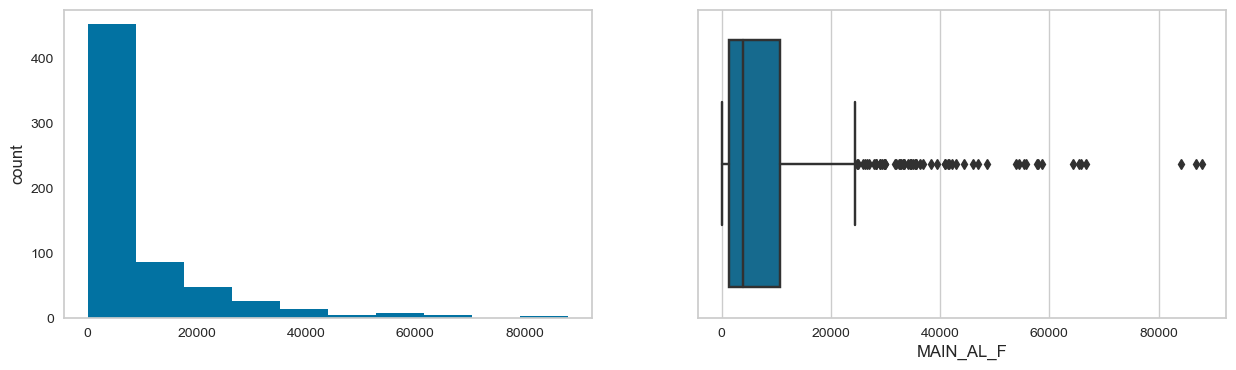

Description of MAIN_HH_M
----------------------------------------------------------------------------
count      640.000000
mean       883.893750
std       1278.642345
min          0.000000
25%        187.500000
50%        498.500000
75%       1099.250000
max      16429.000000
Name: MAIN_HH_M, dtype: float64 

Skew : 4.88


Distribution of MAIN_HH_M
----------------------------------------------------------------------------


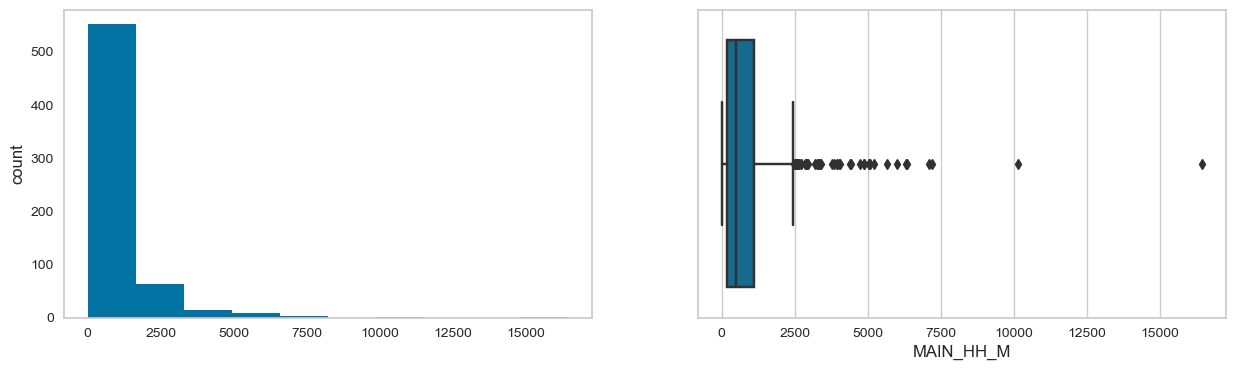

Description of MAIN_HH_F
----------------------------------------------------------------------------
count      640.000000
mean      1380.773438
std       3179.414449
min          0.000000
25%        248.750000
50%        540.500000
75%       1435.750000
max      45979.000000
Name: MAIN_HH_F, dtype: float64 

Skew : 8.58


Distribution of MAIN_HH_F
----------------------------------------------------------------------------


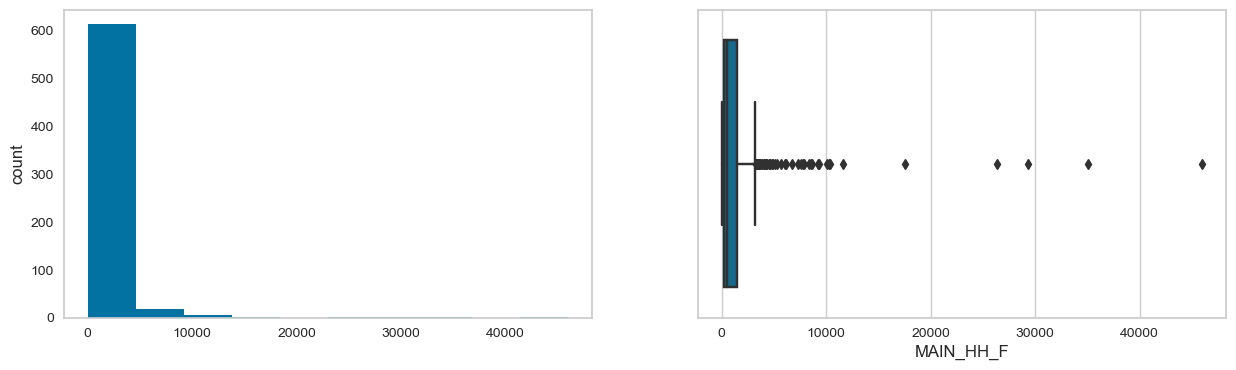

Description of MAIN_OT_M
----------------------------------------------------------------------------
count       640.000000
mean      18047.101562
std       26068.480886
min          36.000000
25%        3997.500000
50%        9598.000000
75%       21249.500000
max      240855.000000
Name: MAIN_OT_M, dtype: float64 

Skew : 3.89


Distribution of MAIN_OT_M
----------------------------------------------------------------------------


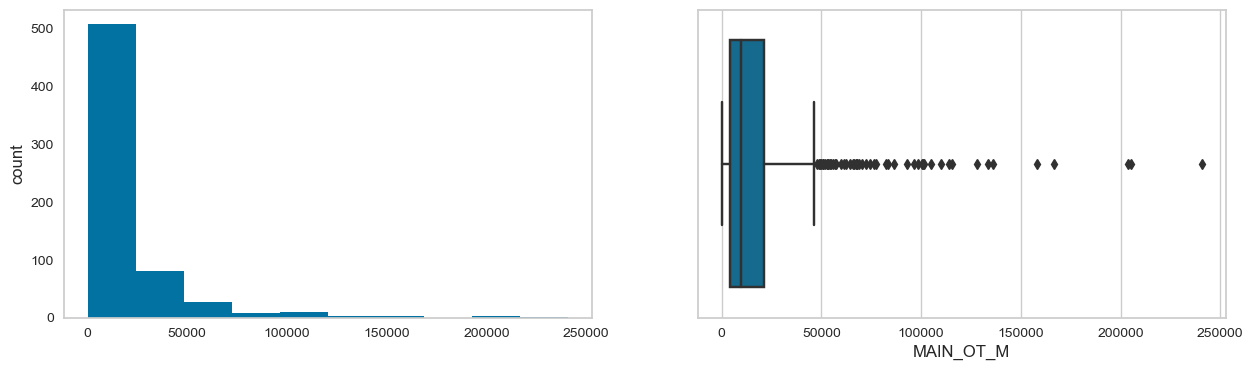

Description of MAIN_OT_F
----------------------------------------------------------------------------
count       640.000000
mean      12406.035938
std       18972.202369
min         153.000000
25%        3142.500000
50%        6380.500000
75%       14368.250000
max      209355.000000
Name: MAIN_OT_F, dtype: float64 

Skew : 5.34


Distribution of MAIN_OT_F
----------------------------------------------------------------------------


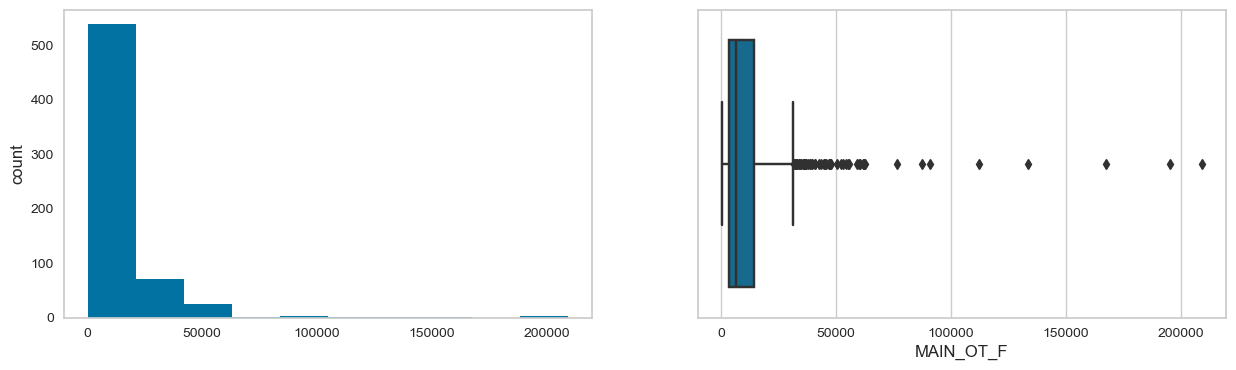

Description of MARGWORK_M
----------------------------------------------------------------------------
count      640.000000
mean      7787.960938
std       7410.791691
min         35.000000
25%       2937.500000
50%       5627.000000
75%       9800.250000
max      47553.000000
Name: MARGWORK_M, dtype: float64 

Skew : 2.0


Distribution of MARGWORK_M
----------------------------------------------------------------------------


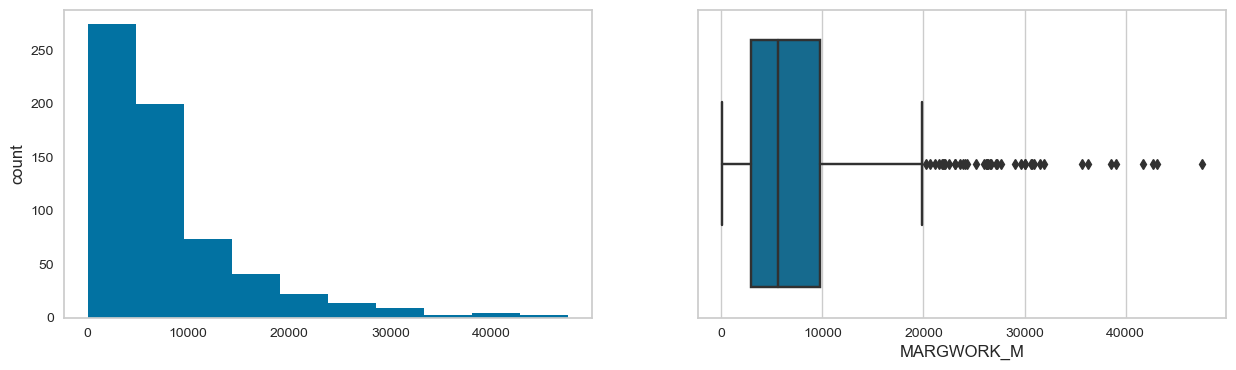

Description of MARGWORK_F
----------------------------------------------------------------------------
count      640.000000
mean     13096.914062
std      10996.474528
min        117.000000
25%       5424.500000
50%      10175.000000
75%      18879.250000
max      66915.000000
Name: MARGWORK_F, dtype: float64 

Skew : 1.52


Distribution of MARGWORK_F
----------------------------------------------------------------------------


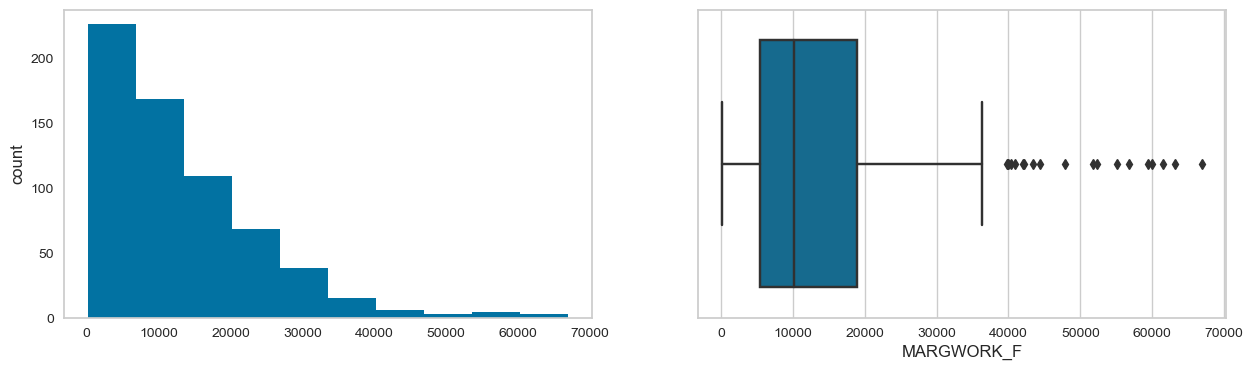

Description of MARG_CL_M
----------------------------------------------------------------------------
count      640.000000
mean      1040.737500
std       1311.546847
min          0.000000
25%        311.750000
50%        606.500000
75%       1281.000000
max      13201.000000
Name: MARG_CL_M, dtype: float64 

Skew : 3.63


Distribution of MARG_CL_M
----------------------------------------------------------------------------


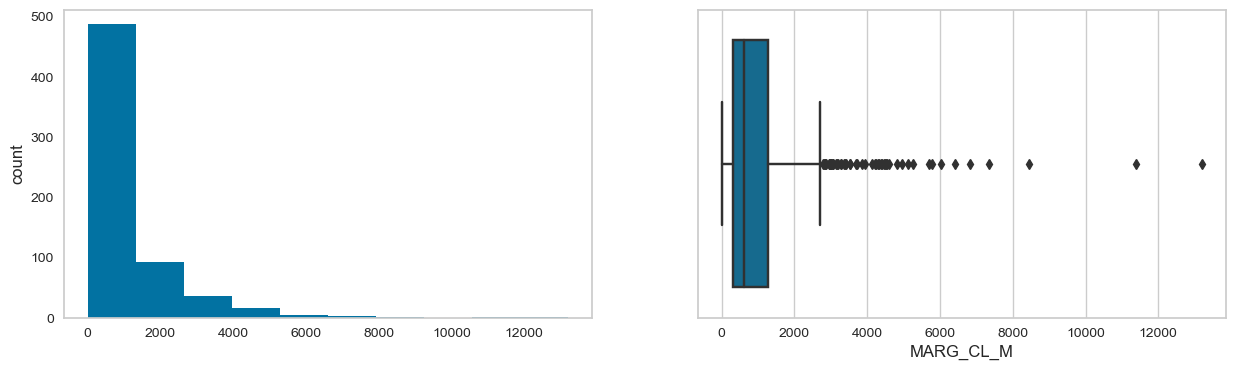

Description of MARG_CL_F
----------------------------------------------------------------------------
count      640.000000
mean      2307.682813
std       3564.626095
min          0.000000
25%        630.250000
50%       1226.000000
75%       2659.250000
max      44324.000000
Name: MARG_CL_F, dtype: float64 

Skew : 5.51


Distribution of MARG_CL_F
----------------------------------------------------------------------------


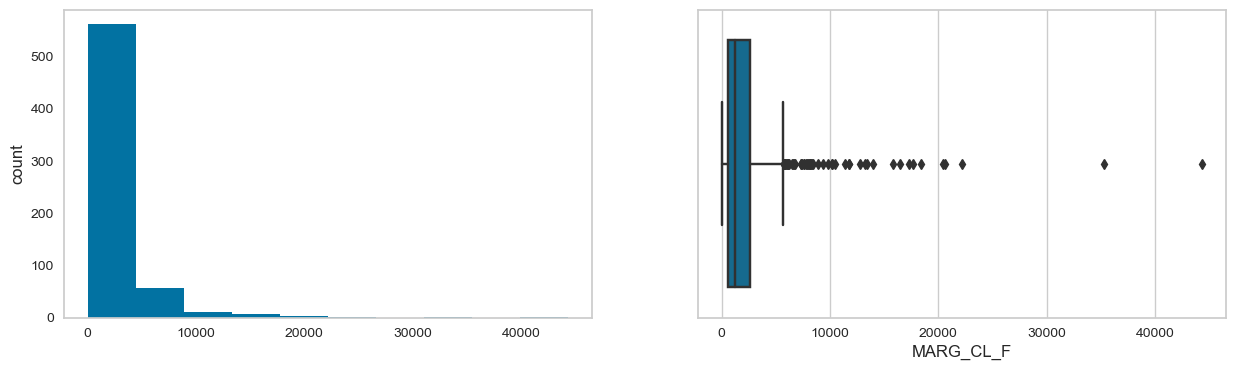

Description of MARG_AL_M
----------------------------------------------------------------------------
count      640.000000
mean      3304.326562
std       3781.555707
min          0.000000
25%        873.500000
50%       2062.000000
75%       4300.750000
max      23719.000000
Name: MARG_AL_M, dtype: float64 

Skew : 2.22


Distribution of MARG_AL_M
----------------------------------------------------------------------------


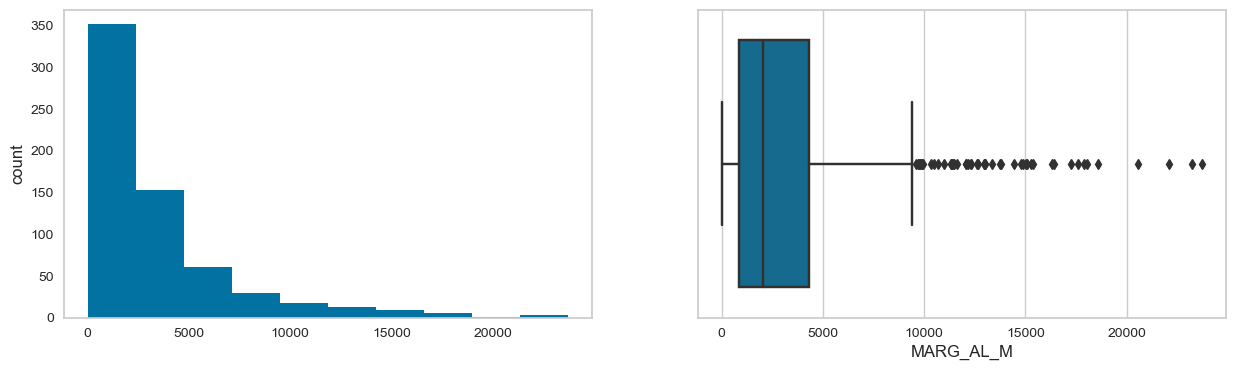

Description of MARG_AL_F
----------------------------------------------------------------------------
count      640.000000
mean      6463.281250
std       6773.876298
min          0.000000
25%       1402.500000
50%       4020.500000
75%       9089.250000
max      45301.000000
Name: MARG_AL_F, dtype: float64 

Skew : 1.72


Distribution of MARG_AL_F
----------------------------------------------------------------------------


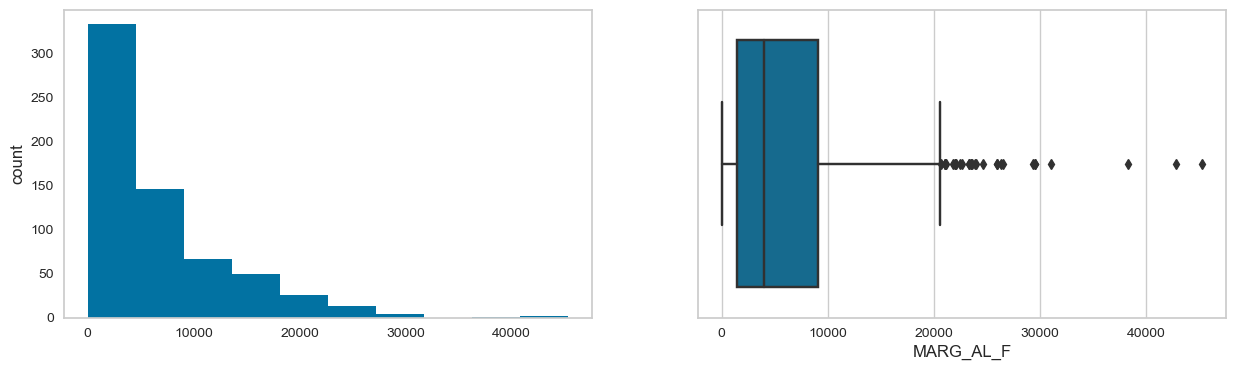

Description of MARG_HH_M
----------------------------------------------------------------------------
count     640.000000
mean      316.742188
std       462.661891
min         0.000000
25%        71.750000
50%       166.000000
75%       356.500000
max      4298.000000
Name: MARG_HH_M, dtype: float64 

Skew : 3.88


Distribution of MARG_HH_M
----------------------------------------------------------------------------


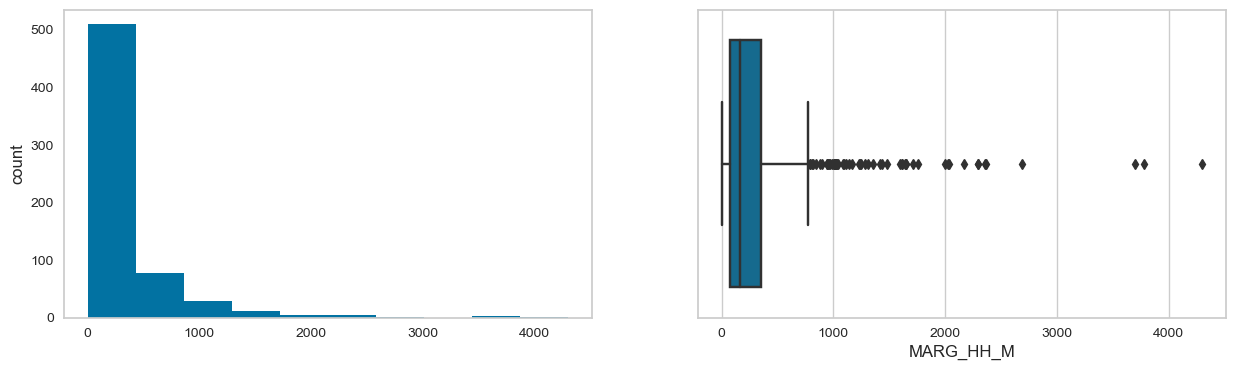

Description of MARG_HH_F
----------------------------------------------------------------------------
count      640.000000
mean       786.626562
std       1198.718213
min          0.000000
25%        171.750000
50%        429.000000
75%        962.500000
max      15448.000000
Name: MARG_HH_F, dtype: float64 

Skew : 5.36


Distribution of MARG_HH_F
----------------------------------------------------------------------------


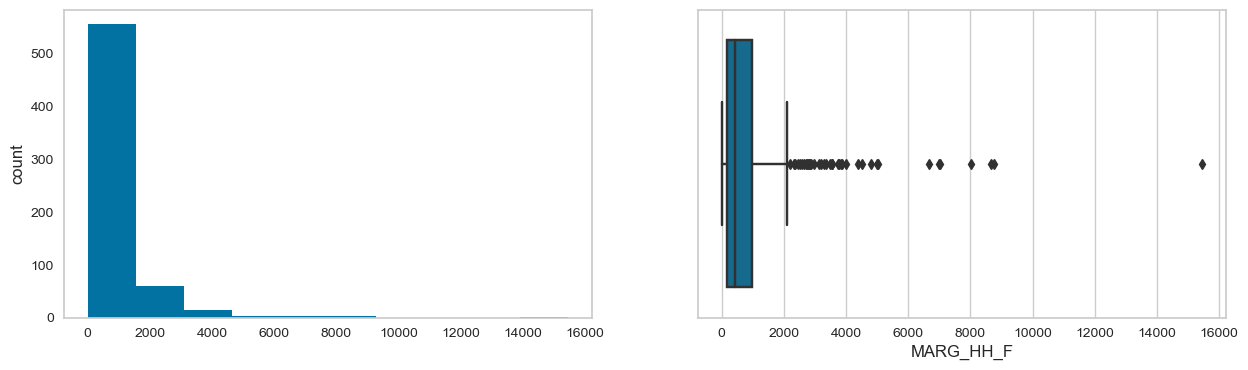

Description of MARG_OT_M
----------------------------------------------------------------------------
count      640.000000
mean      3126.154687
std       3609.391821
min          7.000000
25%        935.500000
50%       2036.000000
75%       3985.250000
max      24728.000000
Name: MARG_OT_M, dtype: float64 

Skew : 2.7


Distribution of MARG_OT_M
----------------------------------------------------------------------------


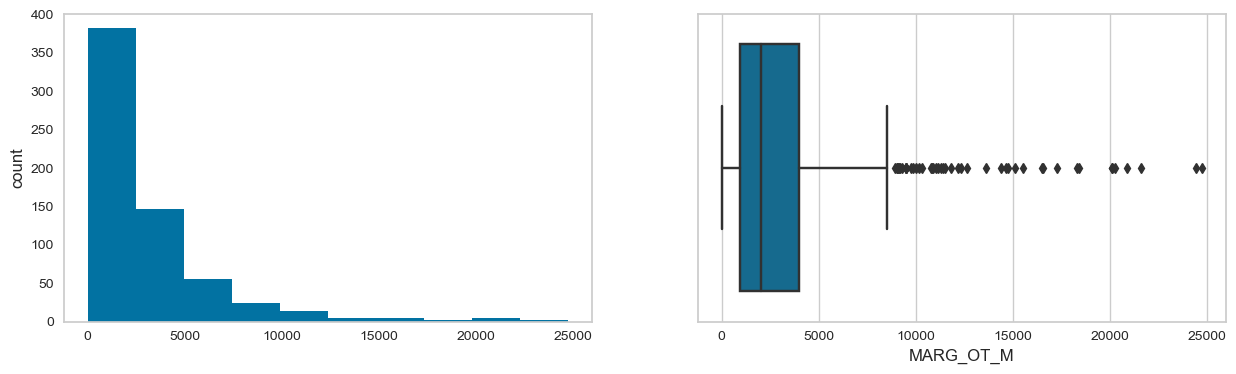

Description of MARG_OT_F
----------------------------------------------------------------------------
count      640.000000
mean      3539.323438
std       4115.191314
min         19.000000
25%       1071.750000
50%       2349.500000
75%       4400.500000
max      36377.000000
Name: MARG_OT_F, dtype: float64 

Skew : 3.06


Distribution of MARG_OT_F
----------------------------------------------------------------------------


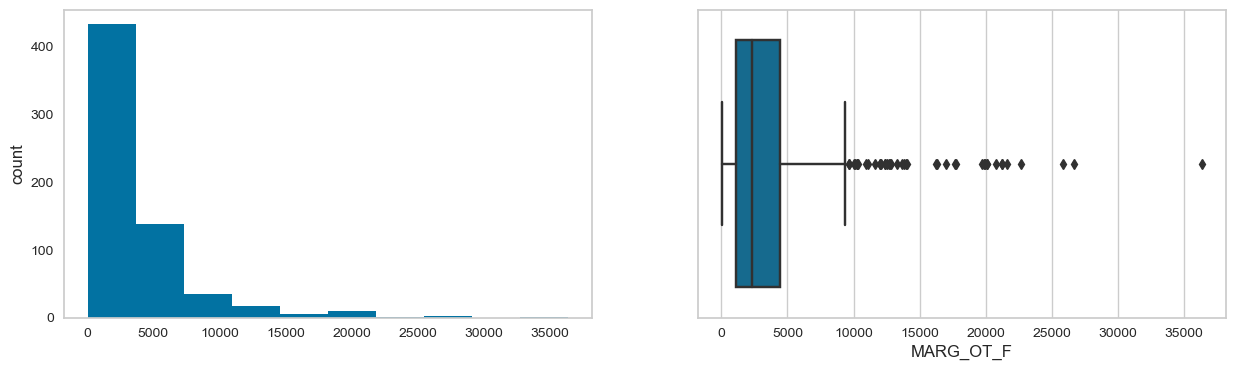

Description of MARGWORK_3_6_M
----------------------------------------------------------------------------
count       640.000000
mean      41948.168750
std       39045.316918
min         291.000000
25%       16208.250000
50%       30315.000000
75%       57218.750000
max      300937.000000
Name: MARGWORK_3_6_M, dtype: float64 

Skew : 2.15


Distribution of MARGWORK_3_6_M
----------------------------------------------------------------------------


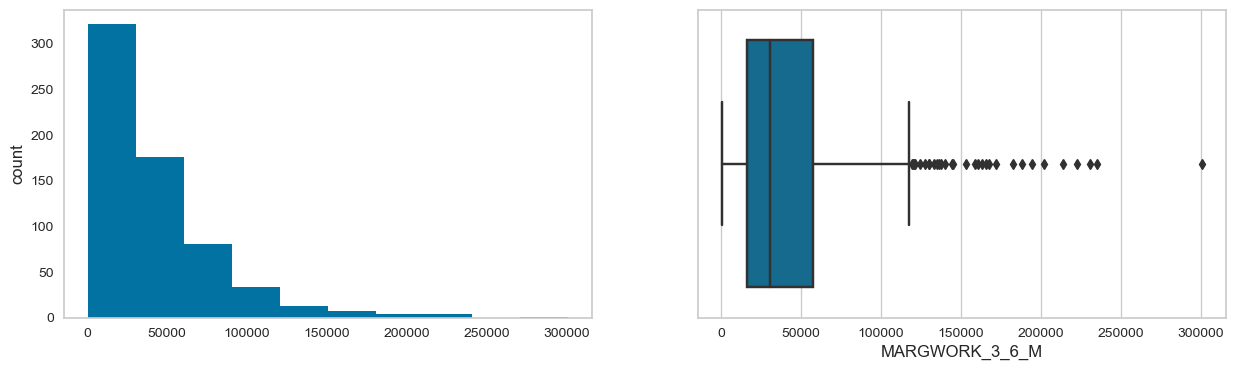

Description of MARGWORK_3_6_F
----------------------------------------------------------------------------
count       640.000000
mean      81076.323438
std       82970.406216
min         341.000000
25%       26619.500000
50%       56793.000000
75%      107924.000000
max      676450.000000
Name: MARGWORK_3_6_F, dtype: float64 

Skew : 2.54


Distribution of MARGWORK_3_6_F
----------------------------------------------------------------------------


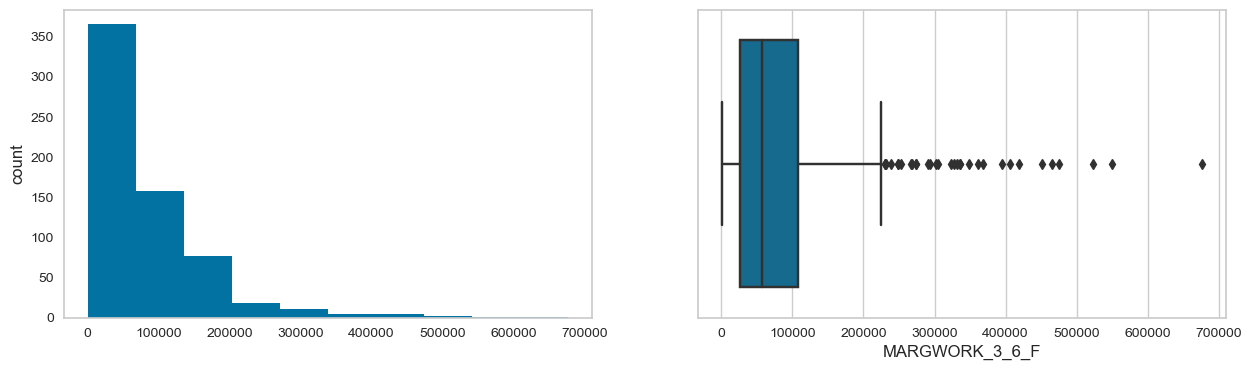

Description of MARG_CL_3_6_M
----------------------------------------------------------------------------
count      640.000000
mean      6394.987500
std       6019.806644
min         27.000000
25%       2372.000000
50%       4630.000000
75%       8167.000000
max      39106.000000
Name: MARG_CL_3_6_M, dtype: float64 

Skew : 1.89


Distribution of MARG_CL_3_6_M
----------------------------------------------------------------------------


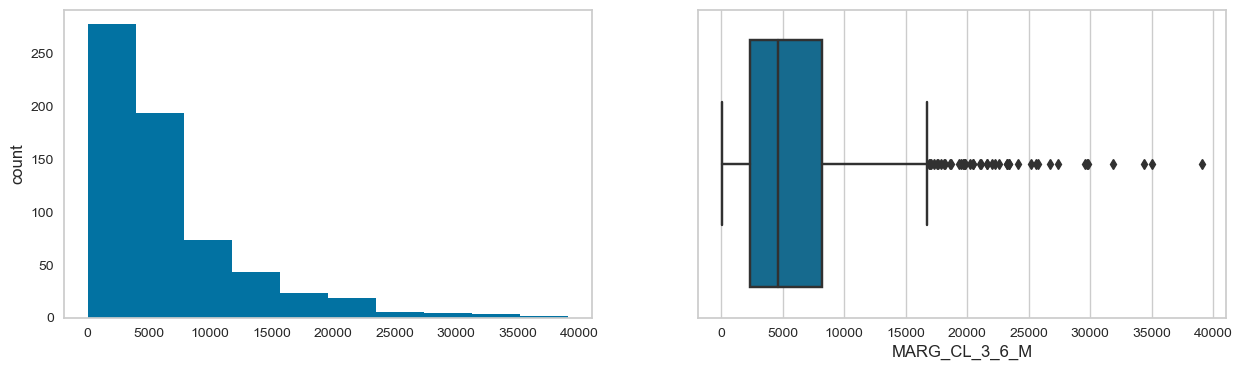

Description of MARG_CL_3_6_F
----------------------------------------------------------------------------
count      640.000000
mean     10339.864063
std       8467.473429
min         85.000000
25%       4351.500000
50%       8295.000000
75%      15102.000000
max      50065.000000
Name: MARG_CL_3_6_F, dtype: float64 

Skew : 1.35


Distribution of MARG_CL_3_6_F
----------------------------------------------------------------------------


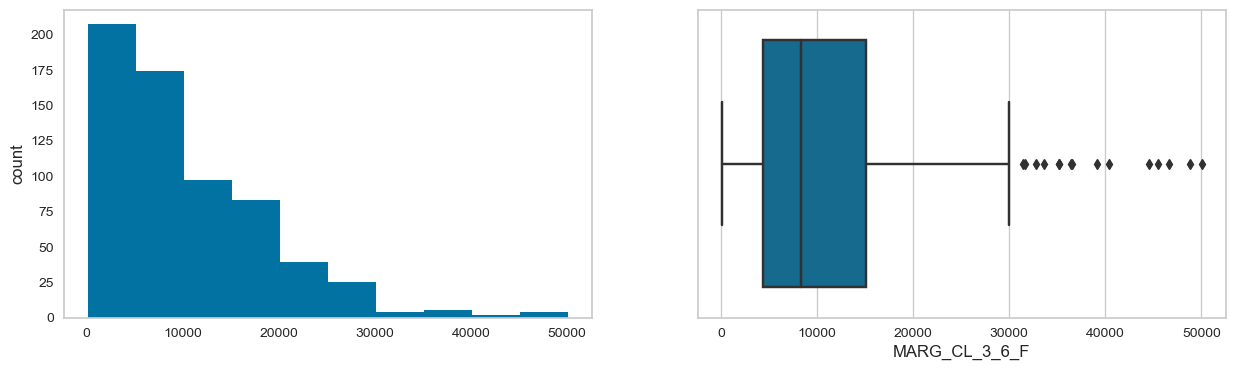

Description of MARG_AL_3_6_M
----------------------------------------------------------------------------
count     640.000000
mean      789.848438
std       905.639279
min         0.000000
25%       235.500000
50%       480.500000
75%       986.000000
max      7426.000000
Name: MARG_AL_3_6_M, dtype: float64 

Skew : 2.83


Distribution of MARG_AL_3_6_M
----------------------------------------------------------------------------


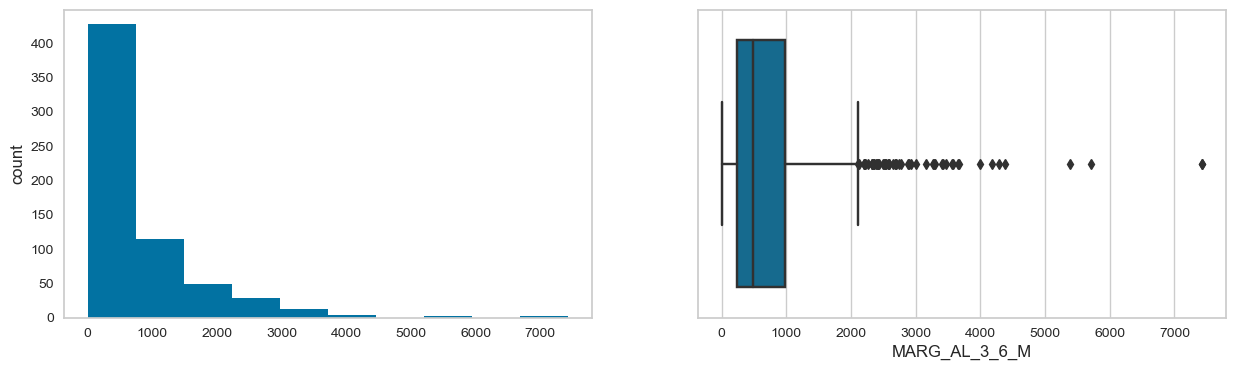

Description of MARG_AL_3_6_F
----------------------------------------------------------------------------
count      640.000000
mean      1749.584375
std       2496.541514
min          0.000000
25%        497.250000
50%        985.500000
75%       2059.000000
max      27171.000000
Name: MARG_AL_3_6_F, dtype: float64 

Skew : 4.72


Distribution of MARG_AL_3_6_F
----------------------------------------------------------------------------


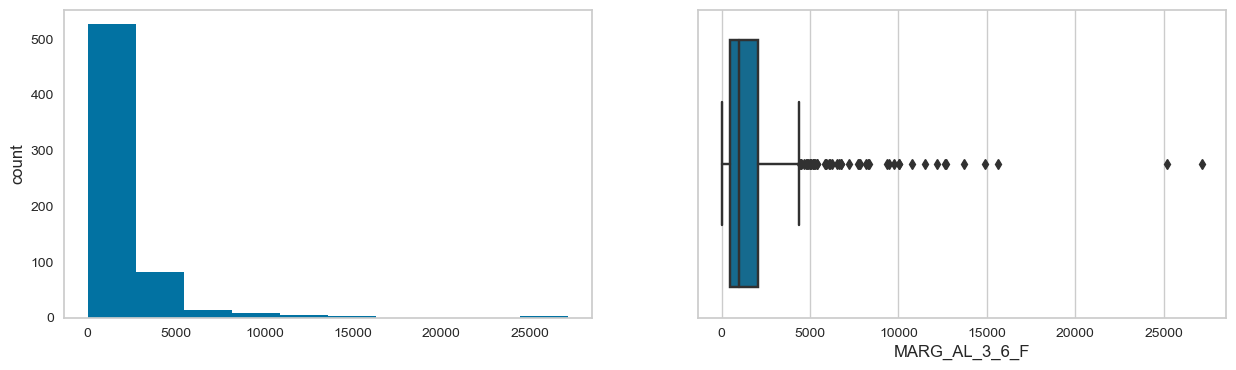

Description of MARG_HH_3_6_M
----------------------------------------------------------------------------
count      640.000000
mean      2743.635938
std       3059.586387
min          0.000000
25%        718.750000
50%       1714.500000
75%       3702.250000
max      19343.000000
Name: MARG_HH_3_6_M, dtype: float64 

Skew : 2.07


Distribution of MARG_HH_3_6_M
----------------------------------------------------------------------------


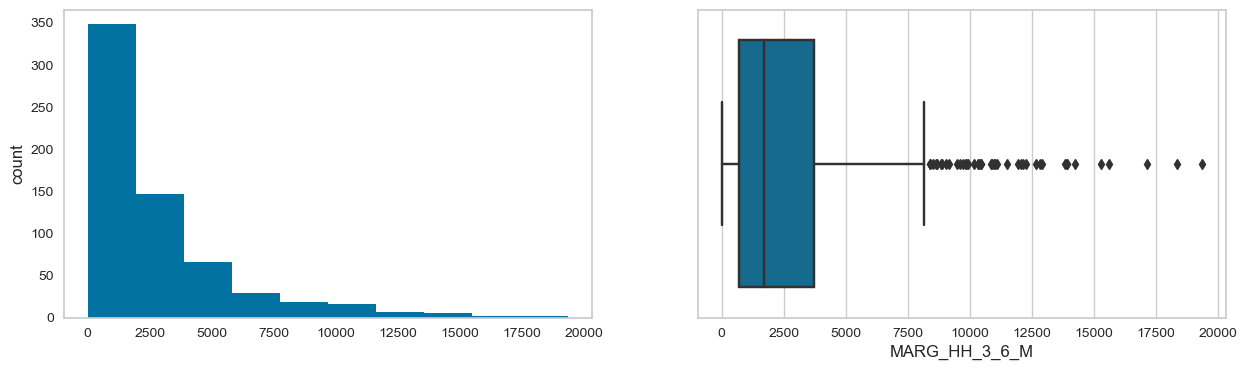

Description of MARG_HH_3_6_F
----------------------------------------------------------------------------
count      640.00000
mean      5169.85000
std       5335.64096
min          0.00000
25%       1113.75000
50%       3294.00000
75%       7502.25000
max      36253.00000
Name: MARG_HH_3_6_F, dtype: float64 

Skew : 1.59


Distribution of MARG_HH_3_6_F
----------------------------------------------------------------------------


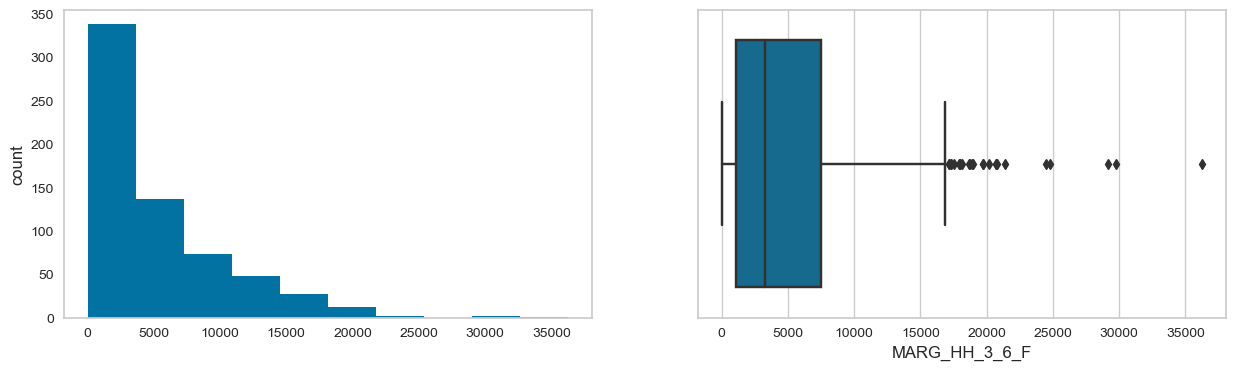

Description of MARG_OT_3_6_M
----------------------------------------------------------------------------
count     640.000000
mean      245.362500
std       358.728567
min         0.000000
25%        58.000000
50%       129.500000
75%       276.000000
max      3535.000000
Name: MARG_OT_3_6_M, dtype: float64 

Skew : 3.99


Distribution of MARG_OT_3_6_M
----------------------------------------------------------------------------


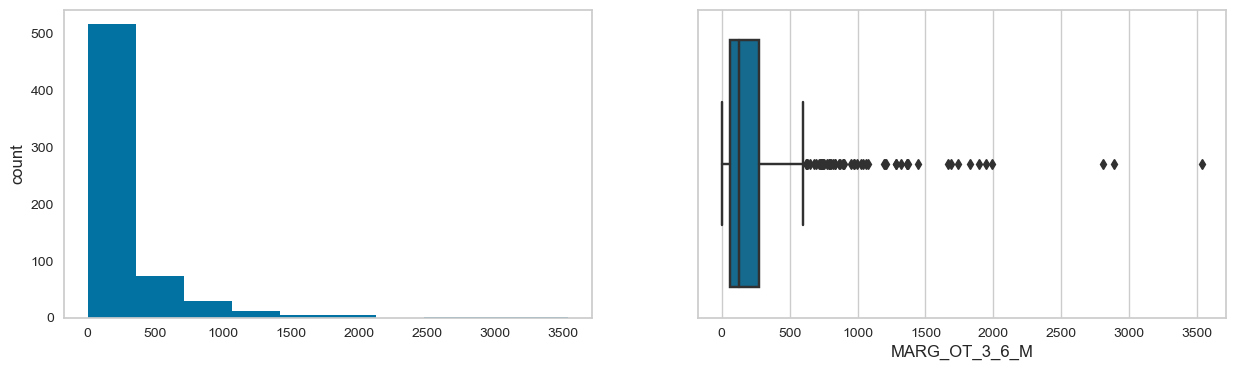

Description of MARG_OT_3_6_F
----------------------------------------------------------------------------
count      640.000000
mean       585.884375
std        900.025817
min          0.000000
25%        127.750000
50%        320.500000
75%        719.250000
max      12094.000000
Name: MARG_OT_3_6_F, dtype: float64 

Skew : 5.61


Distribution of MARG_OT_3_6_F
----------------------------------------------------------------------------


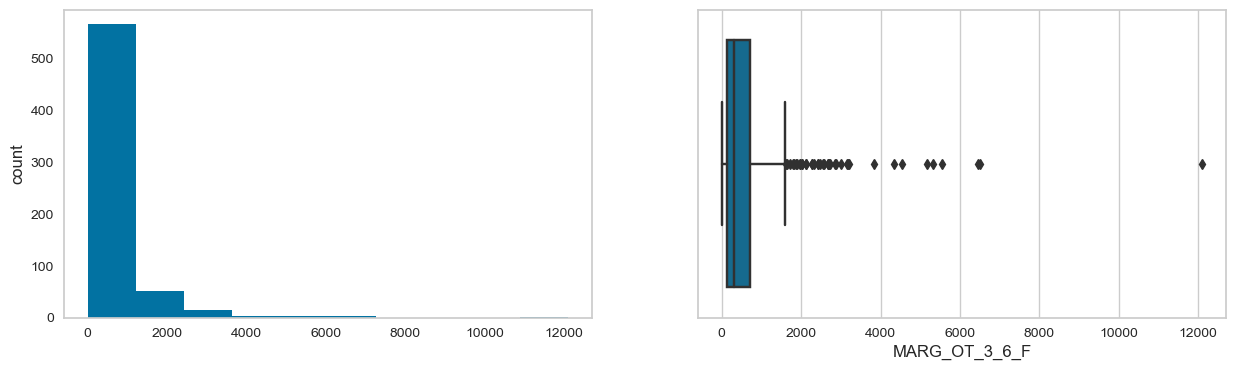

Description of MARGWORK_0_3_M
----------------------------------------------------------------------------
count      640.000000
mean      2616.140625
std       3036.964381
min          7.000000
25%        755.000000
50%       1681.500000
75%       3320.250000
max      20648.000000
Name: MARGWORK_0_3_M, dtype: float64 

Skew : 2.69


Distribution of MARGWORK_0_3_M
----------------------------------------------------------------------------


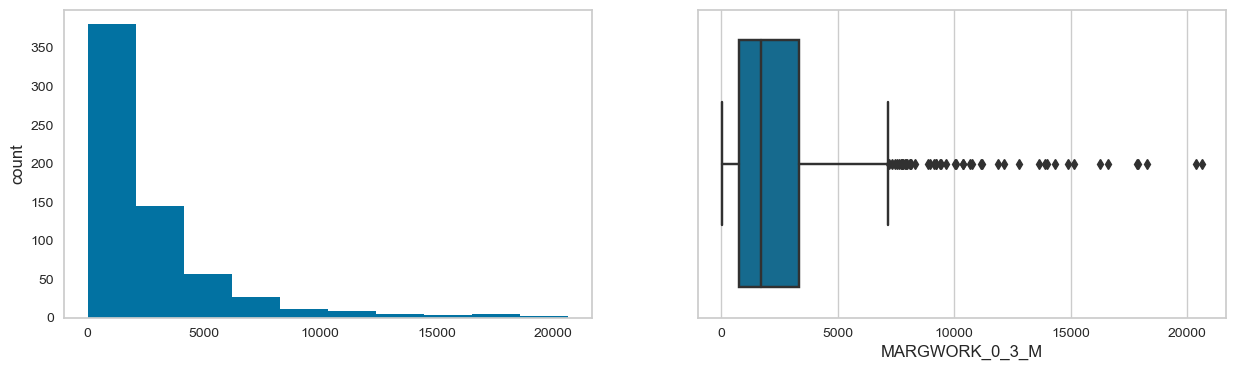

Description of MARGWORK_0_3_F
----------------------------------------------------------------------------
count      640.000000
mean      2834.545312
std       3327.836932
min         14.000000
25%        833.500000
50%       1834.500000
75%       3610.500000
max      25844.000000
Name: MARGWORK_0_3_F, dtype: float64 

Skew : 3.04


Distribution of MARGWORK_0_3_F
----------------------------------------------------------------------------


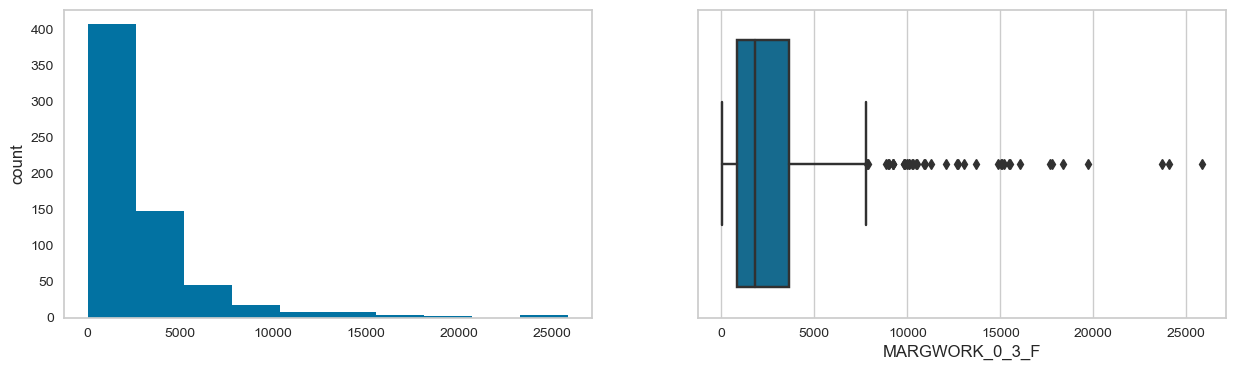

Description of MARG_CL_0_3_M
----------------------------------------------------------------------------
count     640.000000
mean     1392.973438
std      1489.707052
min         4.000000
25%       489.500000
50%       949.000000
75%      1714.000000
max      9875.000000
Name: MARG_CL_0_3_M, dtype: float64 

Skew : 2.65


Distribution of MARG_CL_0_3_M
----------------------------------------------------------------------------


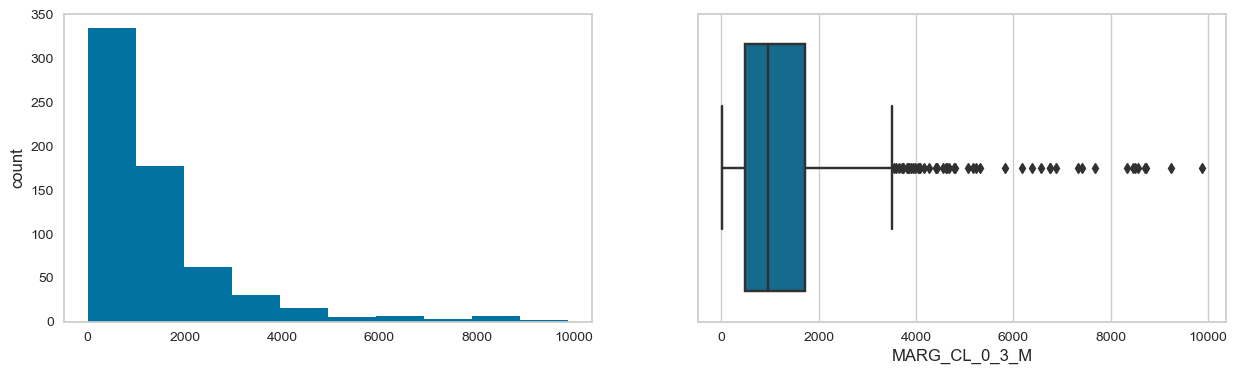

Description of MARG_CL_0_3_F
----------------------------------------------------------------------------
count      640.000000
mean      2757.050000
std       2788.776676
min         30.000000
25%        957.250000
50%       1928.000000
75%       3599.750000
max      21611.000000
Name: MARG_CL_0_3_F, dtype: float64 

Skew : 2.47


Distribution of MARG_CL_0_3_F
----------------------------------------------------------------------------


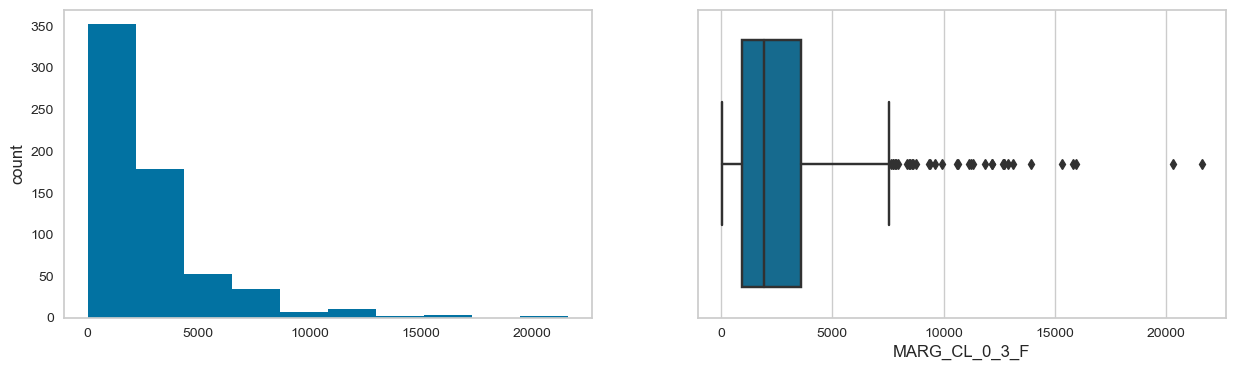

Description of MARG_AL_0_3_M
----------------------------------------------------------------------------
count     640.000000
mean      250.889062
std       453.336594
min         0.000000
25%        47.000000
50%       114.500000
75%       270.750000
max      5775.000000
Name: MARG_AL_0_3_M, dtype: float64 

Skew : 5.81


Distribution of MARG_AL_0_3_M
----------------------------------------------------------------------------


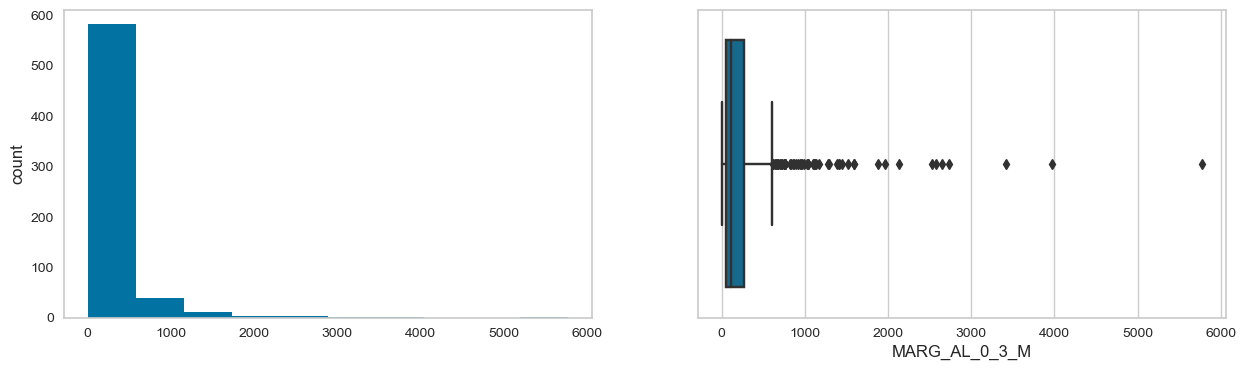

Description of MARG_AL_0_3_F
----------------------------------------------------------------------------
count      640.000000
mean       558.098438
std       1117.642748
min          0.000000
25%        109.000000
50%        247.500000
75%        568.750000
max      17153.000000
Name: MARG_AL_0_3_F, dtype: float64 

Skew : 7.69


Distribution of MARG_AL_0_3_F
----------------------------------------------------------------------------


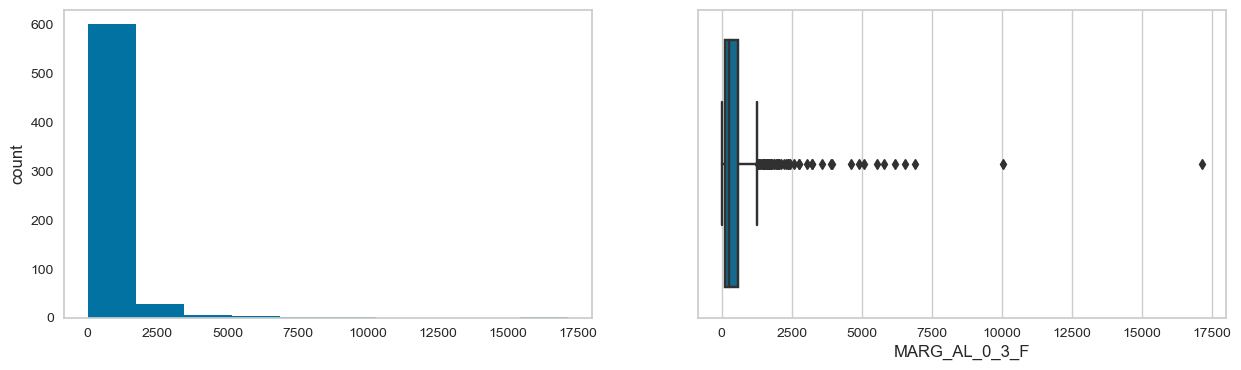

Description of MARG_HH_0_3_M
----------------------------------------------------------------------------
count     640.000000
mean      560.690625
std       762.578991
min         0.000000
25%       136.500000
50%       308.000000
75%       642.000000
max      6116.000000
Name: MARG_HH_0_3_M, dtype: float64 

Skew : 3.09


Distribution of MARG_HH_0_3_M
----------------------------------------------------------------------------


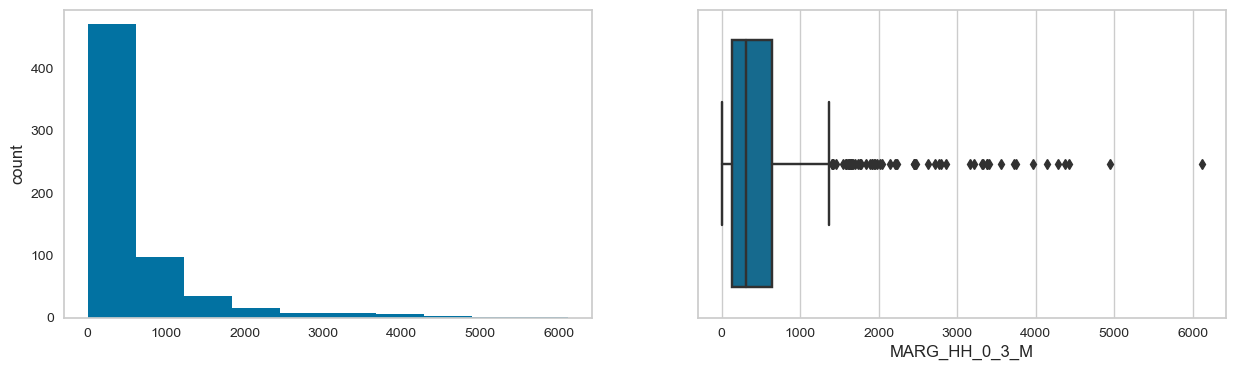

Description of MARG_HH_0_3_F
----------------------------------------------------------------------------
count      640.000000
mean      1293.431250
std       1585.377936
min          0.000000
25%        298.000000
50%        717.000000
75%       1710.750000
max      13714.000000
Name: MARG_HH_0_3_F, dtype: float64 

Skew : 2.62


Distribution of MARG_HH_0_3_F
----------------------------------------------------------------------------


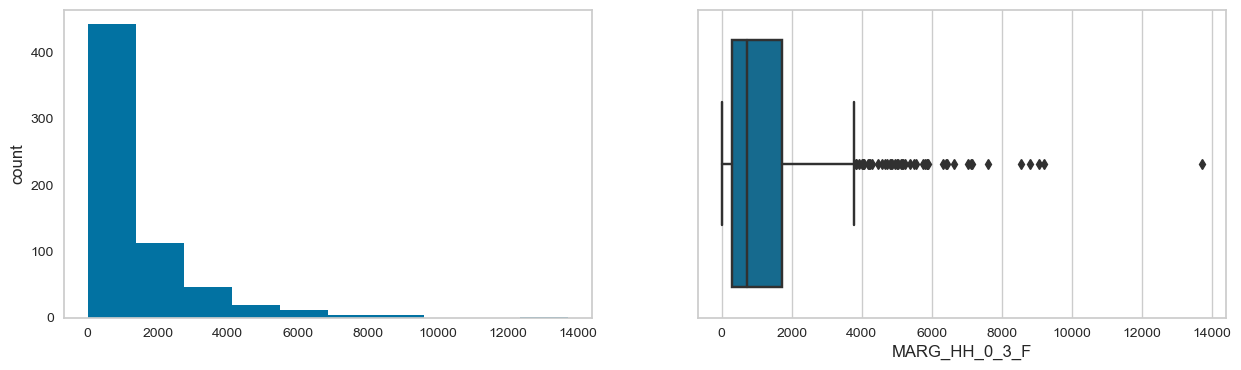

Description of MARG_OT_0_3_M
----------------------------------------------------------------------------
count    640.000000
mean      71.379688
std      107.897627
min        0.000000
25%       14.000000
50%       35.000000
75%       79.000000
max      895.000000
Name: MARG_OT_0_3_M, dtype: float64 

Skew : 3.81


Distribution of MARG_OT_0_3_M
----------------------------------------------------------------------------


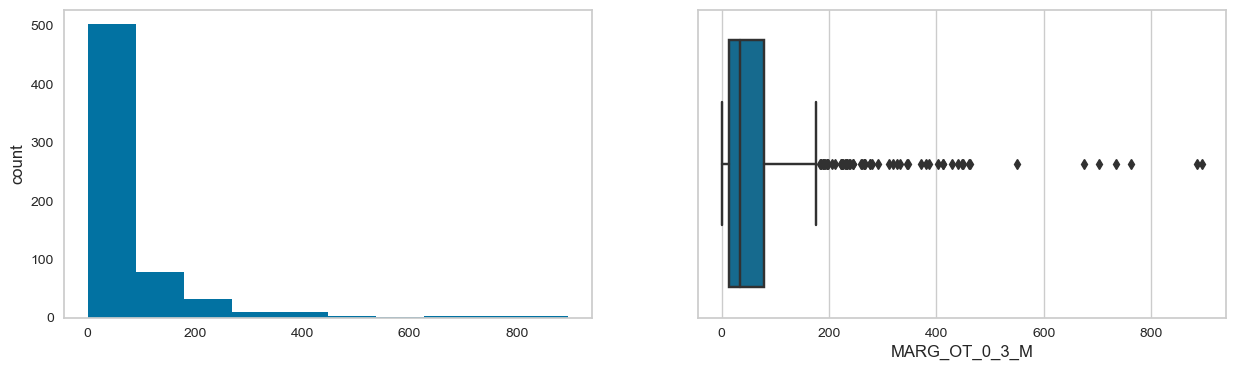

Description of MARG_OT_0_3_F
----------------------------------------------------------------------------
count     640.000000
mean      200.742188
std       309.740854
min         0.000000
25%        43.000000
50%       113.000000
75%       240.000000
max      3354.000000
Name: MARG_OT_0_3_F, dtype: float64 

Skew : 4.74


Distribution of MARG_OT_0_3_F
----------------------------------------------------------------------------


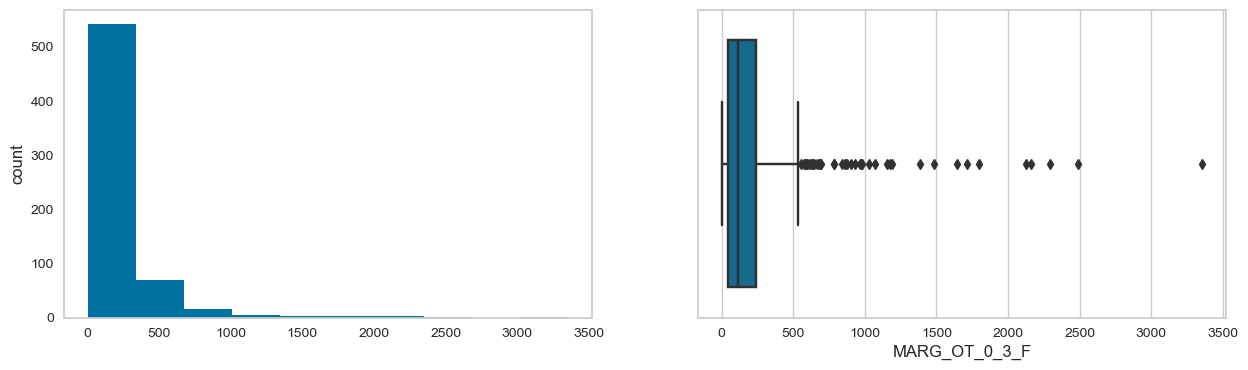

Description of NON_WORK_M
----------------------------------------------------------------------------
count     640.000000
mean      510.014063
std       610.603187
min         0.000000
25%       161.000000
50%       326.000000
75%       604.500000
max      6456.000000
Name: NON_WORK_M, dtype: float64 

Skew : 3.63


Distribution of NON_WORK_M
----------------------------------------------------------------------------


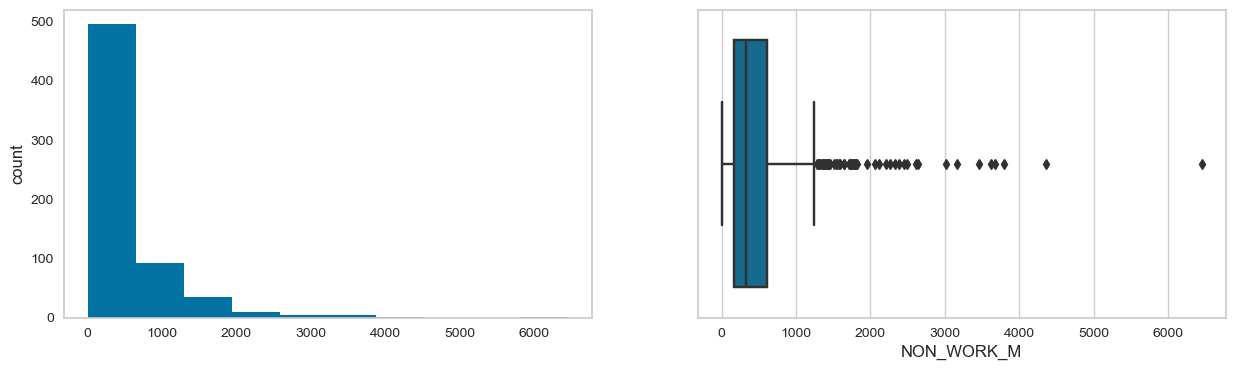

Description of NON_WORK_F
----------------------------------------------------------------------------
count      640.000000
mean       704.778125
std        910.209225
min          5.000000
25%        220.500000
50%        464.500000
75%        853.500000
max      10533.000000
Name: NON_WORK_F, dtype: float64 

Skew : 4.8


Distribution of NON_WORK_F
----------------------------------------------------------------------------


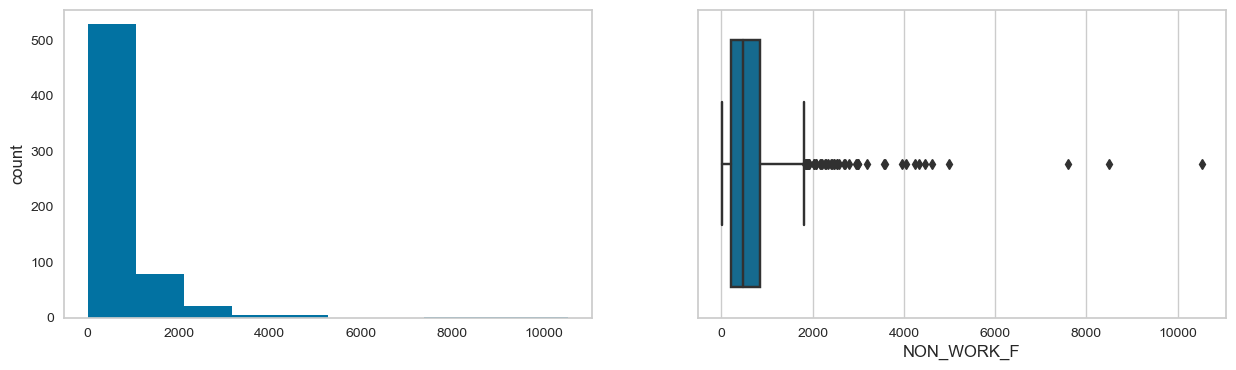

In [401]:
for x in lstnumericcolumns:
    univariateAnalysis_numeric(x,20)

In [402]:
def univariateAnalysis_category(cat_column):
    print("Details of " + cat_column)
    print("----------------------------------------------------------------")
    print(df_cat[cat_column].value_counts())
    plt.figure(figsize=(12,4))
    df_cat[cat_column].value_counts().plot.bar(title="Frequency Distribution of " + cat_column)
    plt.show()
    print("       ")

In [403]:
df_cat = census.select_dtypes(include = ['object'])
lstcatcolumns = list(df_cat.columns.values)
lstcatcolumns

['State', 'Area Name']

In [404]:
lstcatcolumns.remove('Area Name')

In [405]:
lstcatcolumns

['State']

Details of State
----------------------------------------------------------------
Uttar Pradesh               71
Madhya Pradesh              50
Bihar                       38
Maharashtra                 35
Rajasthan                   33
Tamil Nadu                  32
Karnataka                   30
Odisha                      30
Assam                       27
Gujarat                     26
Jharkhand                   24
Andhra Pradesh              23
Jammu & Kashmir             22
Haryana                     21
Punjab                      20
West Bengal                 19
Chhattisgarh                18
Arunachal Pradesh           16
Kerala                      14
Uttarakhand                 13
Himachal Pradesh            12
Nagaland                    11
Manipur                      9
NCT of Delhi                 9
Mizoram                      8
Meghalaya                    7
Tripura                      4
Sikkim                       4
Puducherry                   4
Andaman & Nicobar I

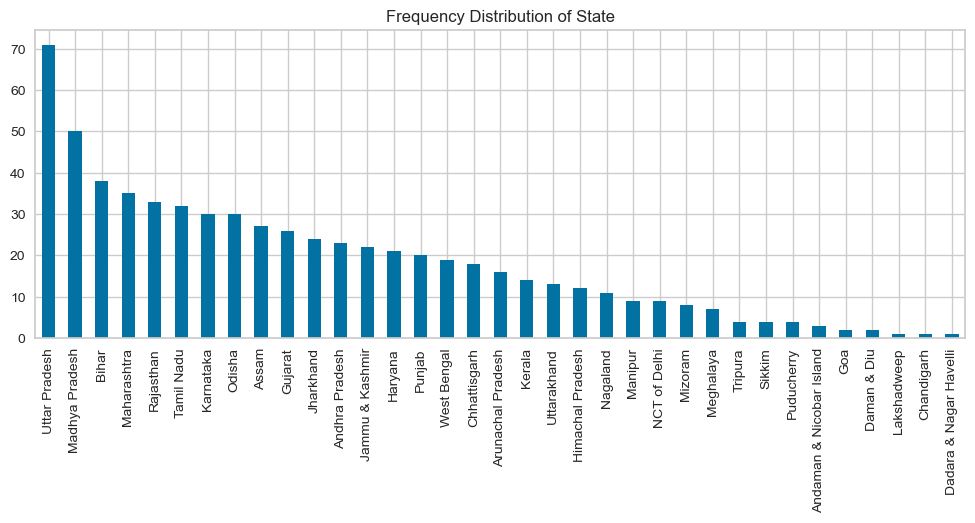

In [406]:
for x in lstcatcolumns:
    univariateAnalysis_category(x)

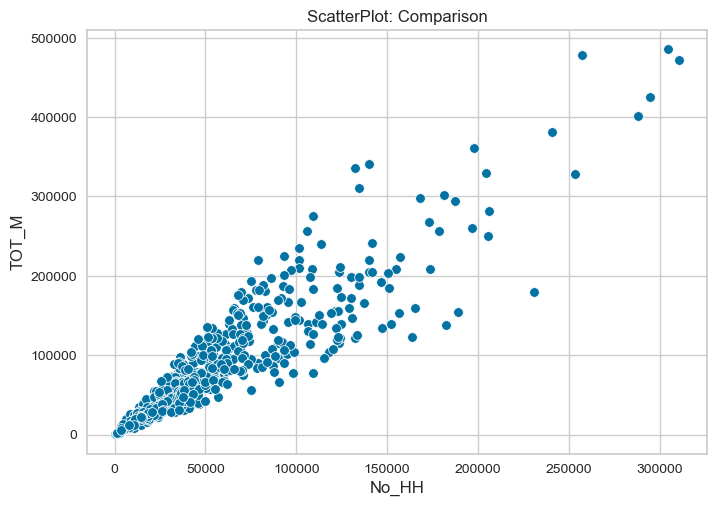

In [407]:
plt.title('ScatterPlot: Comparison')
plt.xlabel('No_HH')
plt.ylabel('TOT_M')
sns.scatterplot(data=census, x='No_HH', y='TOT_M');


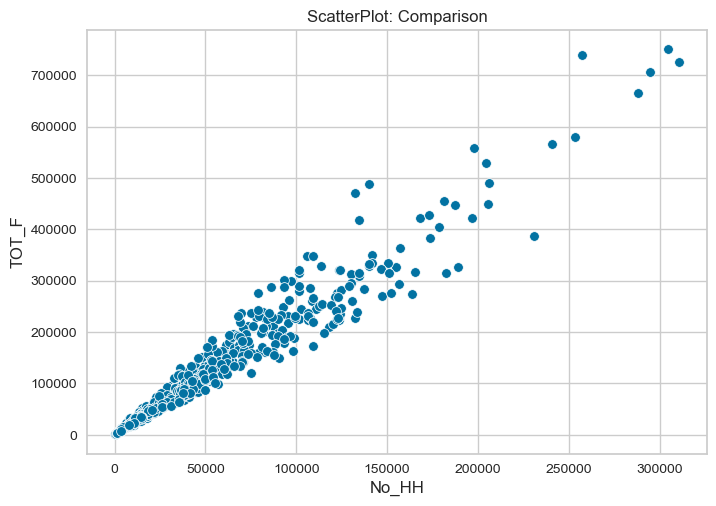

In [410]:
plt.title('ScatterPlot: Comparison')
plt.xlabel('No_HH')
plt.ylabel('TOT_F')
sns.scatterplot(data=census, x='No_HH', y='TOT_F');

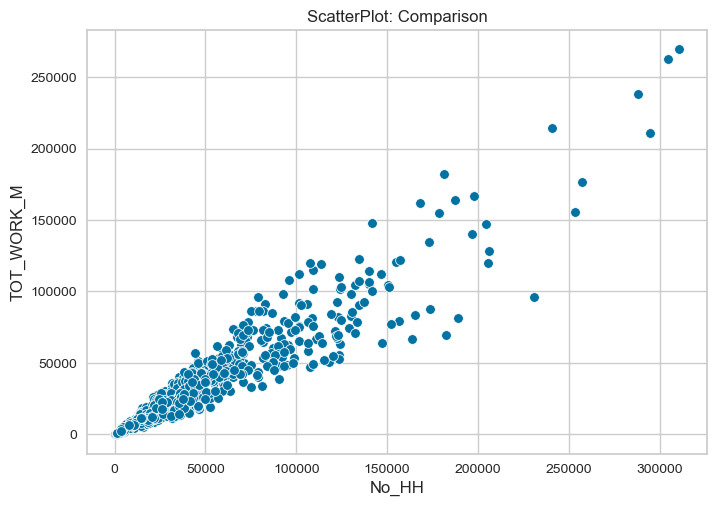

In [411]:
plt.title('ScatterPlot: Comparison')
plt.xlabel('No_HH')
plt.ylabel('TOT_WORK_M')
sns.scatterplot(data=census, x='No_HH', y='TOT_WORK_M');

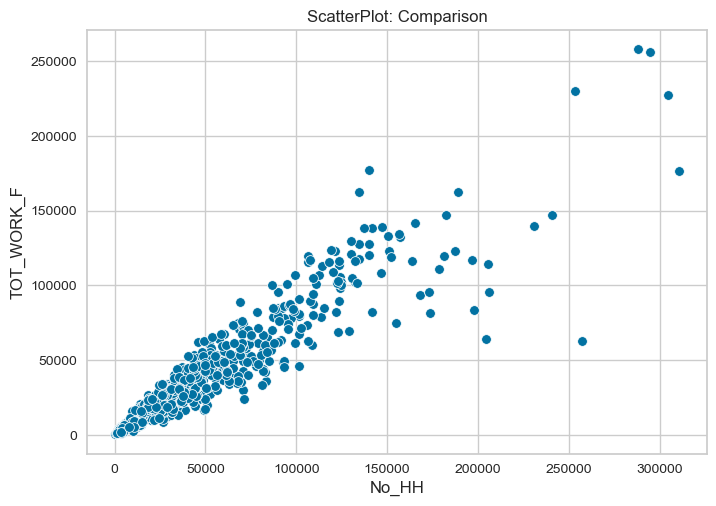

In [412]:
plt.title('ScatterPlot: Comparison')
plt.xlabel('No_HH')
plt.ylabel('TOT_WORK_F')
sns.scatterplot(data=census, x='No_HH', y='TOT_WORK_F');

In [414]:
df_num = df_num.drop(columns=['State Code', 'Dist.Code'])

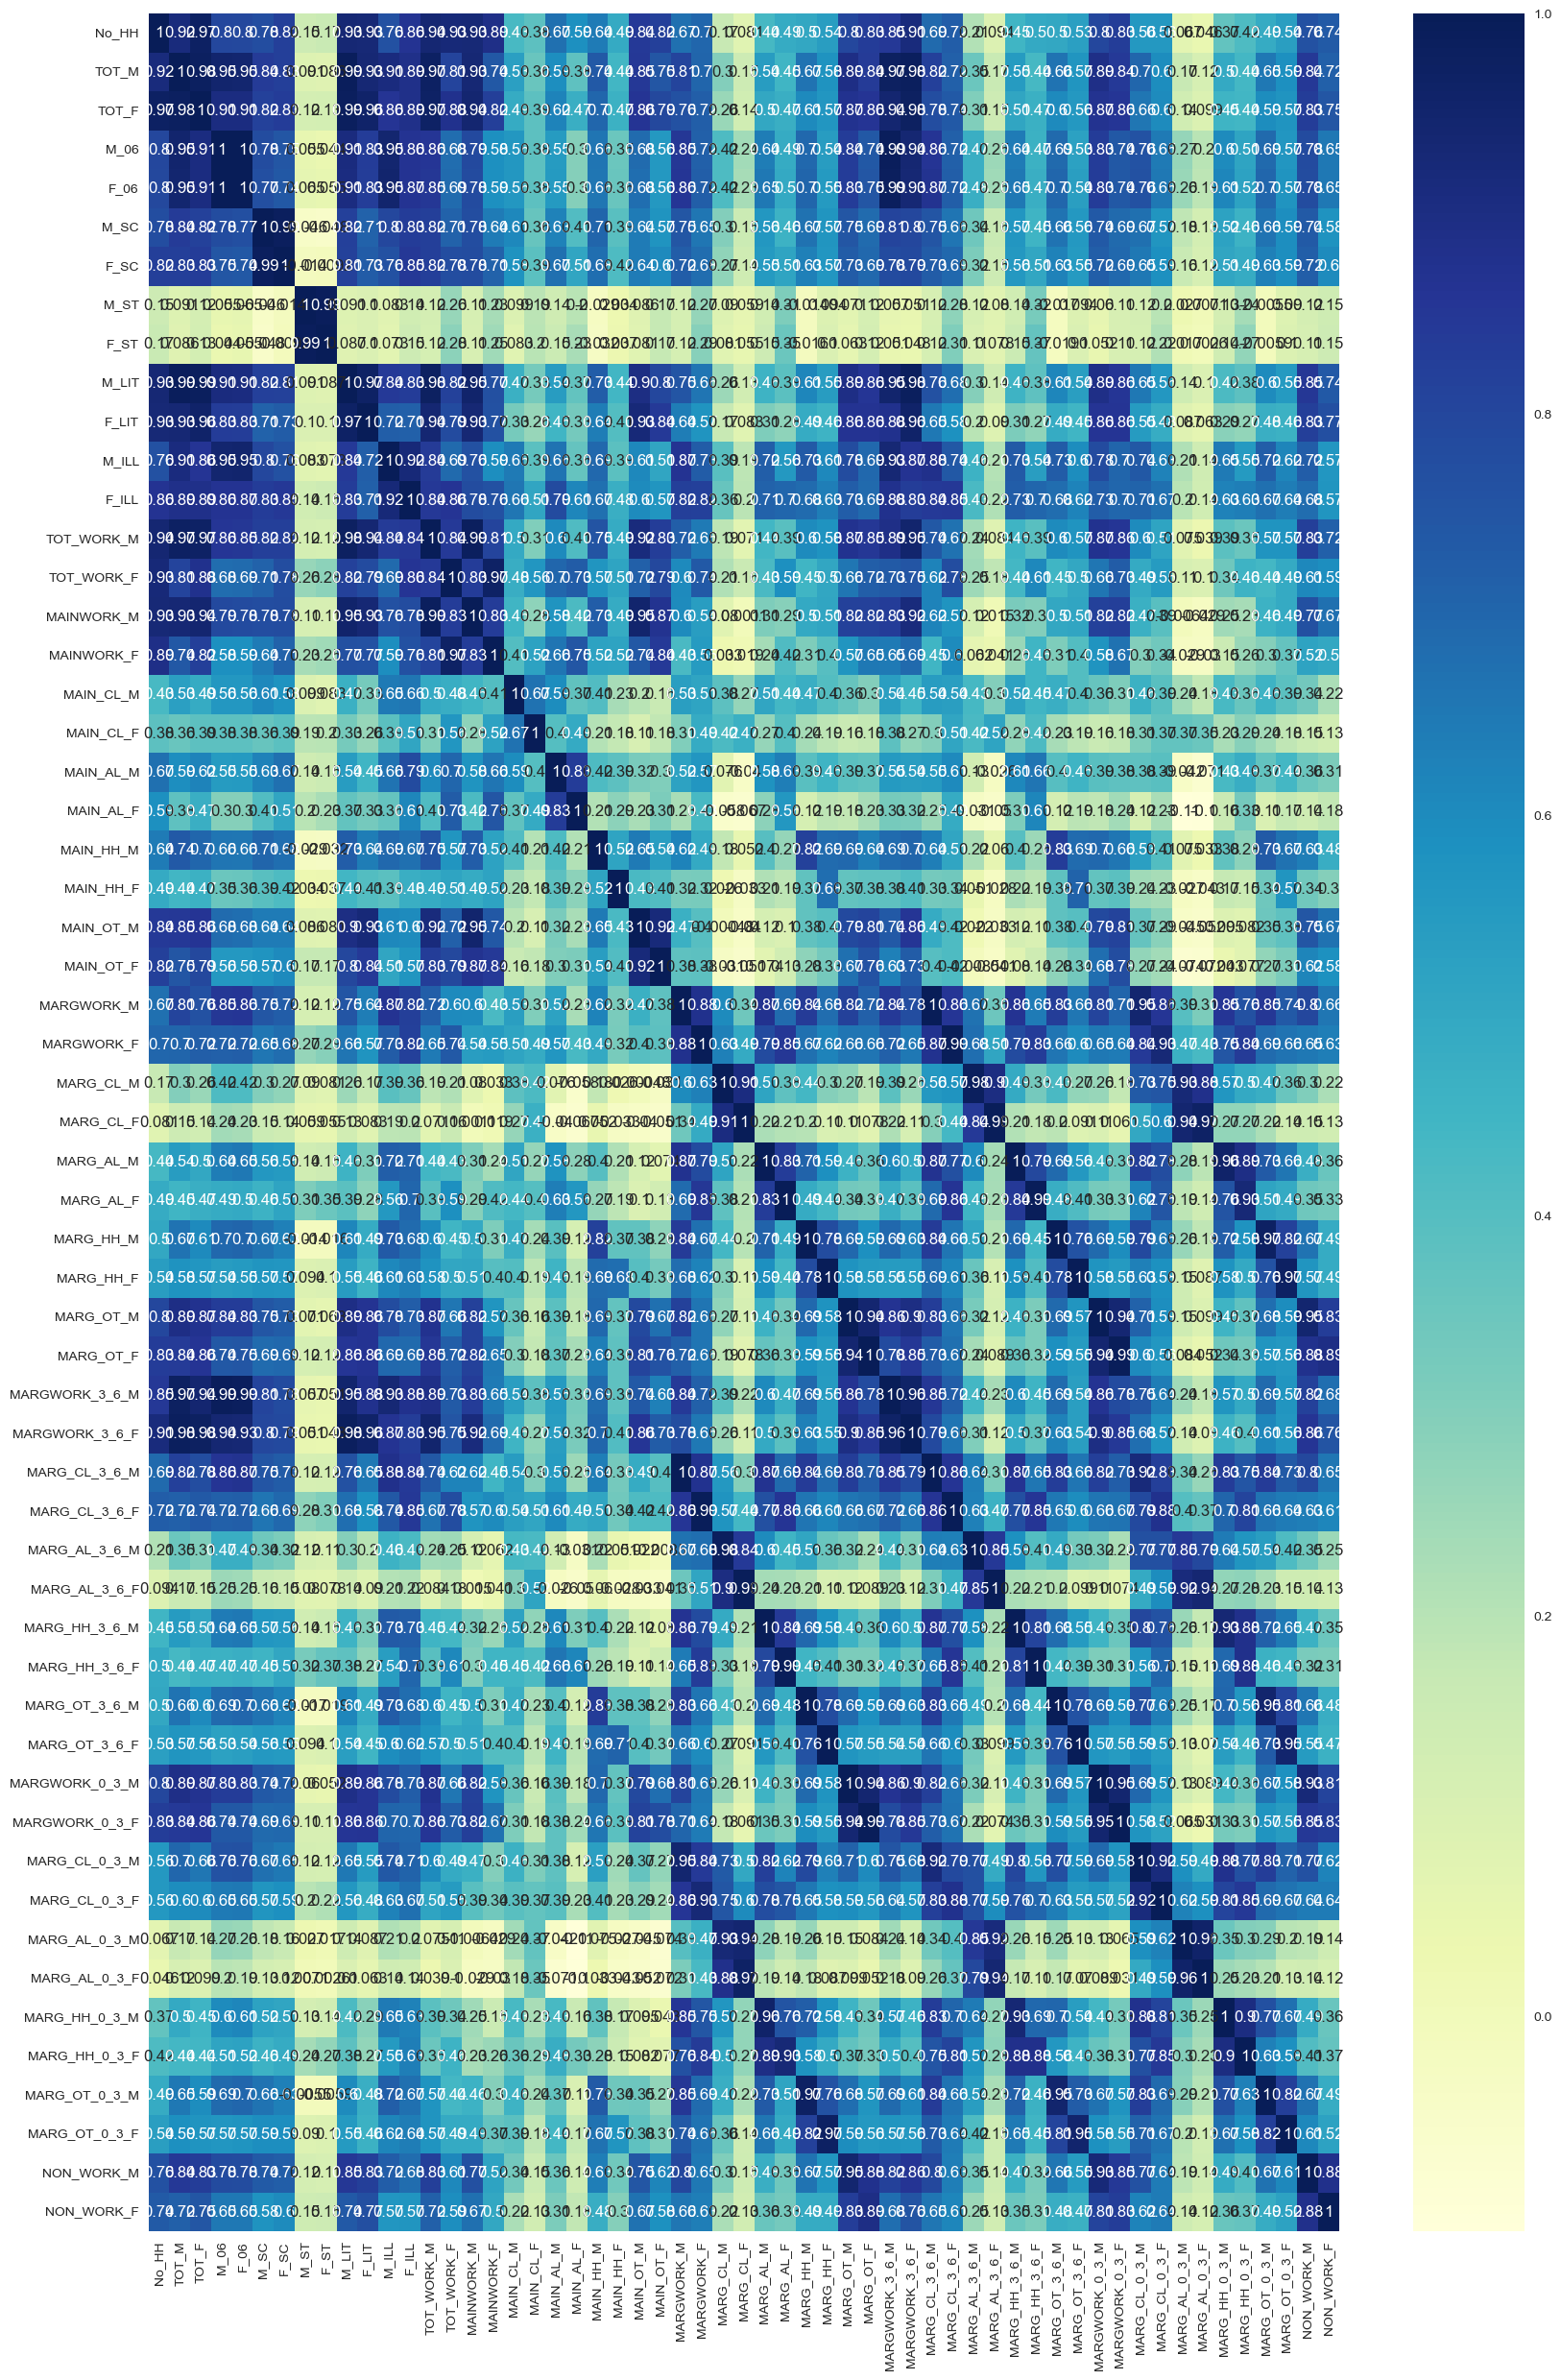

In [415]:
plt.figure(figsize=(20,30))
sns.heatmap(df_num.corr(), annot=True, cmap="YlGnBu")
plt.show();

In [416]:
df_num.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 640 entries, 0 to 639
Data columns (total 57 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   No_HH           640 non-null    int64
 1   TOT_M           640 non-null    int64
 2   TOT_F           640 non-null    int64
 3   M_06            640 non-null    int64
 4   F_06            640 non-null    int64
 5   M_SC            640 non-null    int64
 6   F_SC            640 non-null    int64
 7   M_ST            640 non-null    int64
 8   F_ST            640 non-null    int64
 9   M_LIT           640 non-null    int64
 10  F_LIT           640 non-null    int64
 11  M_ILL           640 non-null    int64
 12  F_ILL           640 non-null    int64
 13  TOT_WORK_M      640 non-null    int64
 14  TOT_WORK_F      640 non-null    int64
 15  MAINWORK_M      640 non-null    int64
 16  MAINWORK_F      640 non-null    int64
 17  MAIN_CL_M       640 non-null    int64
 18  MAIN_CL_F       640 non-null  

In [417]:
from scipy.stats import zscore
df_num_scaled=df_num.apply(zscore)
df_num_scaled.head()

No_HH     TOT_M     TOT_F      M_06      F_06      M_SC      F_SC  \
0 -0.904738 -0.771236 -0.815563 -0.561012 -0.507738 -0.958575 -0.957049   
1 -0.935695 -0.823100 -0.874534 -0.681096 -0.725367 -0.958297 -0.956772   
2 -0.972412 -1.000919 -0.981466 -0.976956 -0.965262 -0.958575 -0.956772   
3 -1.037530 -1.052224 -1.041001 -1.022118 -0.995393 -0.958783 -0.957049   
4 -0.822676 -0.809381 -0.813933 -0.622359 -0.649908 -0.957395 -0.955529   

       M_ST      F_ST     M_LIT  ...  MARG_CL_0_3_M  MARG_CL_0_3_F  \
0 -0.423306 -0.476423 -0.798097  ...      -0.163229      -0.720610   
1 -0.582014 -0.607607 -0.849434  ...      -0.583103      -0.732811   
2 -0.038951 -0.027273 -0.956457  ...      -0.859212      -0.921931   
3 -0.355965 -0.390060 -1.004643  ...      -0.805468      -0.900758   
4  0.149238  0.043330 -0.800568  ...      -0.348645      -0.297513   

   MARG_AL_0_3_M  MARG_AL_0_3_F  MARG_HH_0_3_M  MARG_HH_0_3_F  MARG_OT_0_3_M  \
0      -0.156494      -0.287524       0.156577      -0.657412      -0.365258   
1      -0.282327      -0.294688      -0.491731      -0.723062       0.042855   
2      -0.456727      -0.420050      -0.731894      -0.795026      -0.662068   
3      -0.419198      -0.385127      -0.718770      -0.784926      -0.624966   
4       0.472670       0.434200      -0.466796      -0.625849      -0.439461   

   MARG_OT_0_3_F  NON_WORK_M  NON_WORK_F  
0      -0.499977   -0.413053   -0.539614  
1      -0.073481   -0.606455   -0.598988  
2      -0.635680   -0.726103   -0.707839  
3      -0.616294   -0.645791   -0.710038  
4      -0.309346   -0.540895   -0.249344  

[5 rows x 57 columns]

In [418]:
df_num_scaled.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 640 entries, 0 to 639
Data columns (total 57 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   No_HH           640 non-null    float64
 1   TOT_M           640 non-null    float64
 2   TOT_F           640 non-null    float64
 3   M_06            640 non-null    float64
 4   F_06            640 non-null    float64
 5   M_SC            640 non-null    float64
 6   F_SC            640 non-null    float64
 7   M_ST            640 non-null    float64
 8   F_ST            640 non-null    float64
 9   M_LIT           640 non-null    float64
 10  F_LIT           640 non-null    float64
 11  M_ILL           640 non-null    float64
 12  F_ILL           640 non-null    float64
 13  TOT_WORK_M      640 non-null    float64
 14  TOT_WORK_F      640 non-null    float64
 15  MAINWORK_M      640 non-null    float64
 16  MAINWORK_F      640 non-null    float64
 17  MAIN_CL_M       640 non-null    flo

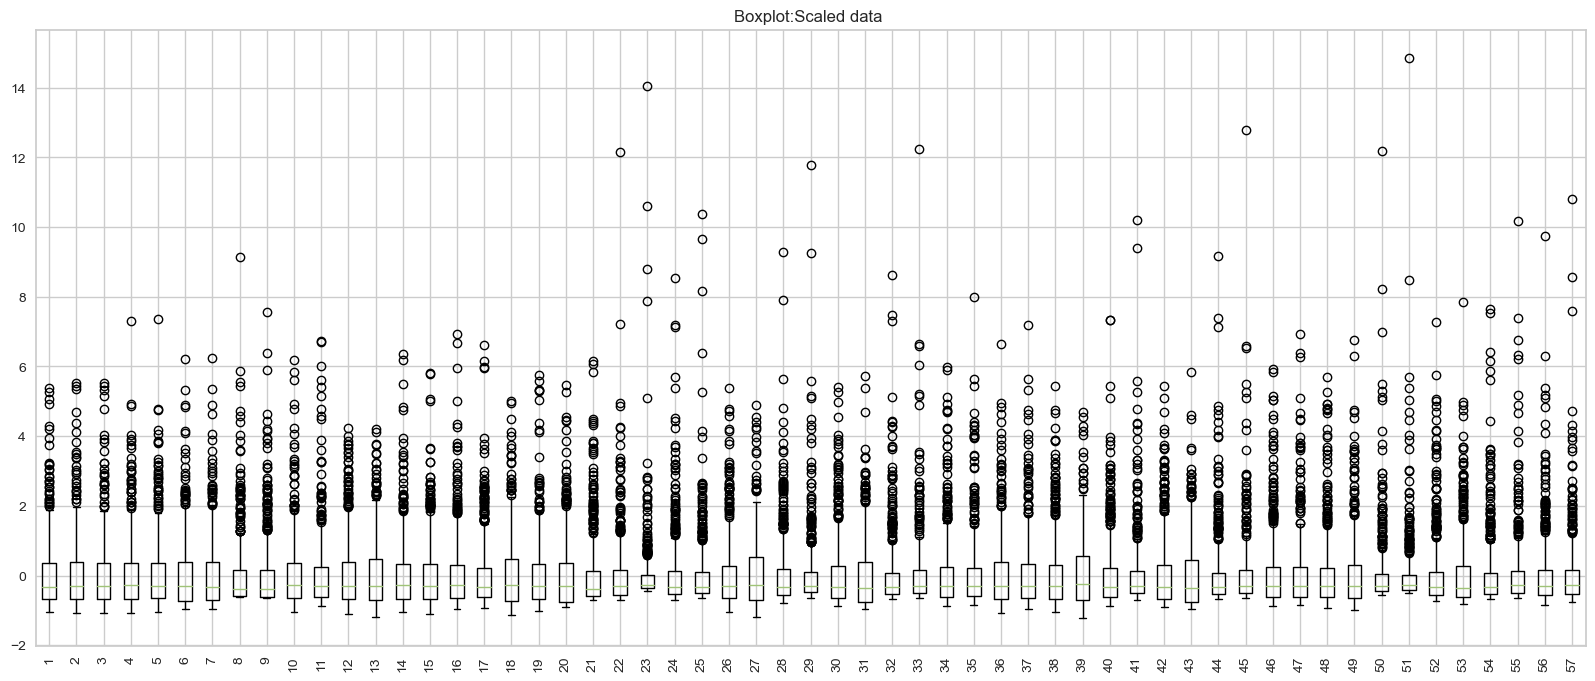

In [419]:
plt.figure(figsize=(20,8))
plt.title('Boxplot:Scaled data ')
plt.boxplot(df_num_scaled);
plt.xticks(rotation=90)
plt.show();

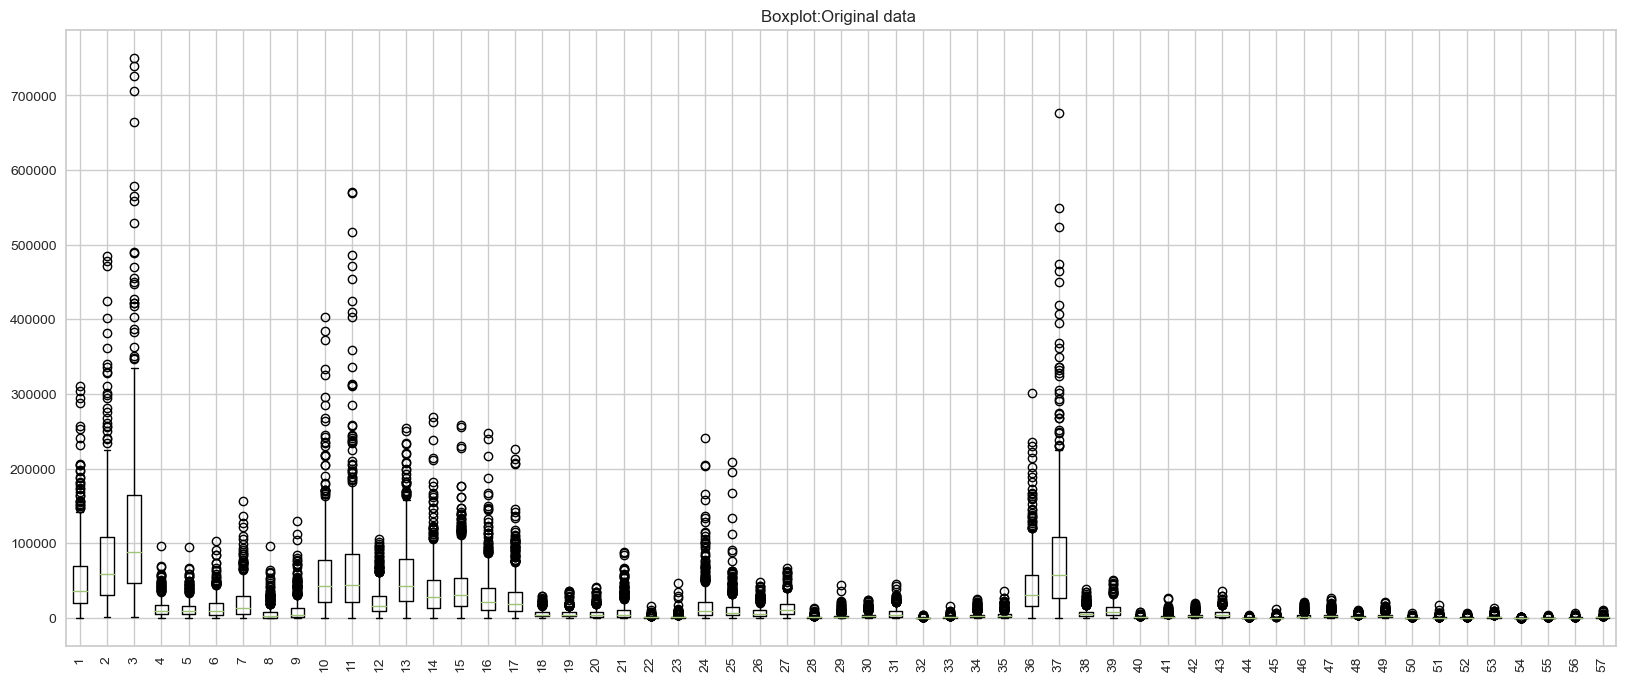

In [420]:
plt.figure(figsize=(20,8))
plt.title('Boxplot:Original data ')
plt.boxplot(df_num);
plt.xticks(rotation=90)
plt.show();

### Bartletts Test of Sphericity

In [421]:
from factor_analyzer.factor_analyzer import calculate_bartlett_sphericity
chi_square_value,p_value=calculate_bartlett_sphericity(df_num_scaled)
p_value

0.0

### KMO Test

In [422]:
from factor_analyzer.factor_analyzer import calculate_kmo
kmo_all,kmo_model=calculate_kmo(df_num_scaled)
kmo_model

0.8039889932781528

In [423]:
corr_matrix= df_num_scaled.corr()
print(corr_matrix.round(2))

                No_HH  TOT_M  TOT_F  M_06  F_06  M_SC  F_SC  M_ST  F_ST  \
No_HH            1.00   0.92   0.97  0.80  0.80  0.78  0.82  0.15  0.17   
TOT_M            0.92   1.00   0.98  0.95  0.95  0.84  0.83  0.09  0.09   
TOT_F            0.97   0.98   1.00  0.91  0.91  0.82  0.83  0.12  0.13   
M_06             0.80   0.95   0.91  1.00  1.00  0.78  0.75  0.06  0.04   
F_06             0.80   0.95   0.91  1.00  1.00  0.77  0.74  0.07  0.05   
M_SC             0.78   0.84   0.82  0.78  0.77  1.00  0.99 -0.05 -0.05   
F_SC             0.82   0.83   0.83  0.75  0.74  0.99  1.00 -0.01 -0.01   
M_ST             0.15   0.09   0.12  0.06  0.07 -0.05 -0.01  1.00  0.99   
F_ST             0.17   0.09   0.13  0.04  0.05 -0.05 -0.01  0.99  1.00   
M_LIT            0.93   0.99   0.99  0.91  0.91  0.82  0.81  0.09  0.09   
F_LIT            0.93   0.93   0.96  0.83  0.83  0.71  0.73  0.10  0.10   
M_ILL            0.76   0.91   0.86  0.95  0.95  0.80  0.76  0.08  0.07   
F_ILL            0.86   0

In [424]:
cov_matrix = np.cov(df_num_scaled.T)
print(cov_matrix.round(2))

[[1.   0.92 0.97 ... 0.54 0.76 0.74]
 [0.92 1.   0.98 ... 0.59 0.85 0.72]
 [0.97 0.98 1.   ... 0.57 0.83 0.75]
 ...
 [0.54 0.59 0.57 ... 1.   0.61 0.52]
 [0.76 0.85 0.83 ... 0.61 1.   0.88]
 [0.74 0.72 0.75 ... 0.52 0.88 1.  ]]


In [425]:
from sklearn.decomposition import PCA
pca = PCA(n_components=57, random_state=1)
df_pca = pca.fit_transform(df_num_scaled)
#df_pca.transpose().round(2)

In [426]:
df_pca.round(2)

array([[-4.62,  0.14,  0.33, ..., -0.  ,  0.  ,  0.  ],
       [-4.77, -0.11,  0.24, ...,  0.  ,  0.  ,  0.  ],
       [-5.96, -0.29,  0.37, ...,  0.  , -0.  ,  0.  ],
       ...,
       [-6.29, -0.64,  0.11, ...,  0.  ,  0.  , -0.  ],
       [-6.22, -0.67,  0.27, ..., -0.  , -0.  ,  0.  ],
       [-5.9 , -0.94,  0.35, ..., -0.  ,  0.  , -0.  ]])

In [427]:
#Step 2: Obtaining the Eigen Vectors when the Principal Components are kept exactly as the number of features in the scaled data
print('Eigen Vectors: \n',pca.components_.round(2))

Eigen Vectors: 
 [[ 0.16  0.17  0.17 ...  0.13  0.15  0.13]
 [-0.13 -0.09 -0.1  ...  0.05 -0.07 -0.07]
 [-0.    0.06  0.04 ... -0.08  0.11  0.1 ]
 ...
 [ 0.    0.21  0.25 ... -0.07  0.   -0.07]
 [ 0.    0.29 -0.21 ...  0.04 -0.03  0.01]
 [-0.    0.19  0.03 ... -0.03 -0.14 -0.02]]


In [428]:
Eigen_Values= pca.explained_variance_
print('Eigen Values: \n',Eigen_Values.round(2))

Eigen Values: 
 [3.181e+01 7.870e+00 4.150e+00 3.670e+00 2.210e+00 1.940e+00 1.180e+00
 7.500e-01 6.200e-01 5.300e-01 4.300e-01 3.500e-01 3.000e-01 2.800e-01
 1.900e-01 1.400e-01 1.100e-01 1.100e-01 1.000e-01 8.000e-02 6.000e-02
 4.000e-02 4.000e-02 3.000e-02 3.000e-02 2.000e-02 1.000e-02 1.000e-02
 1.000e-02 1.000e-02 1.000e-02 1.000e-02 0.000e+00 0.000e+00 0.000e+00
 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00
 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00
 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00
 0.000e+00]


In [429]:
var_exp = pca.explained_variance_ratio_
print(var_exp.round(3))

[0.557 0.138 0.073 0.064 0.039 0.034 0.021 0.013 0.011 0.009 0.008 0.006
 0.005 0.005 0.003 0.002 0.002 0.002 0.002 0.001 0.001 0.001 0.001 0.001
 0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
 0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
 0.    0.    0.    0.    0.    0.    0.    0.    0.   ]


In [430]:
print(var_exp.round(2)*100)

[56. 14.  7.  6.  4.  3.  2.  1.  1.  1.  1.  1.  1.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.]


In [431]:
#Obtaining the Cumulative Sum of the Expalained Variance 
cum_var_exp = np.cumsum(var_exp)
print('Cumulative Variance Explained in Percentage: \n',(cum_var_exp*100).round(2))

Cumulative Variance Explained in Percentage: 
 [ 55.73  69.51  76.79  83.21  87.08  90.47  92.53  93.85  94.93  95.85
  96.61  97.23  97.75  98.24  98.57  98.81  99.01  99.2   99.37  99.51
  99.61  99.69  99.75  99.81  99.85  99.89  99.92  99.94  99.96  99.97
  99.98  99.99 100.   100.   100.   100.   100.   100.   100.   100.
 100.   100.   100.   100.   100.   100.   100.   100.   100.   100.
 100.   100.   100.   100.   100.   100.   100.  ]


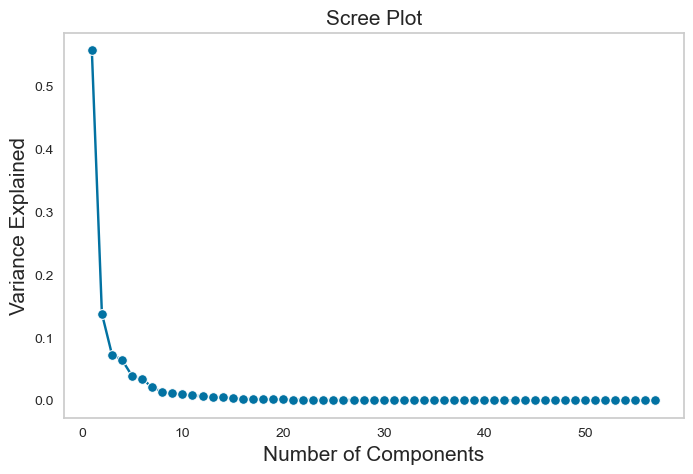

In [433]:
# Step 3 View Scree Plot to identify the number of components to be built
plt.figure(figsize=(8,5))
sns.lineplot(y=var_exp,x=range(1,len(var_exp)+1),marker='o')
plt.xlabel('Number of Components',fontsize=15)
plt.ylabel('Variance Explained',fontsize=15)
plt.title('Scree Plot',fontsize=15)
plt.grid()
plt.show()

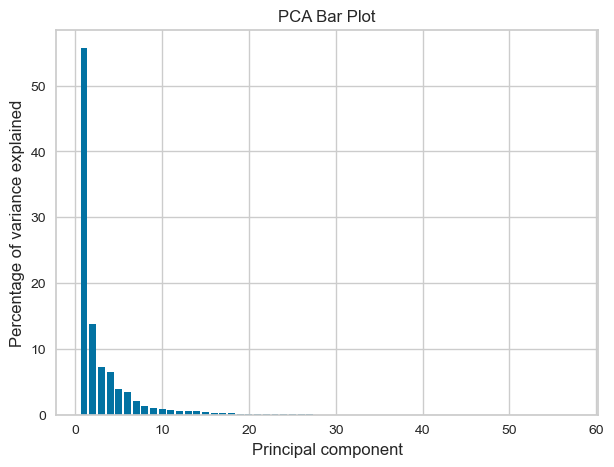

In [434]:
percent_variance=np.round(pca.explained_variance_ratio_*100, decimals=2)
plt.figure(figsize=(7,5))
plt.bar(x=range(1,len(var_exp)+1), height=percent_variance)
plt.ylabel('Percentage of variance explained')
plt.xlabel('Principal component')
plt.title('PCA Bar Plot')
plt.show()

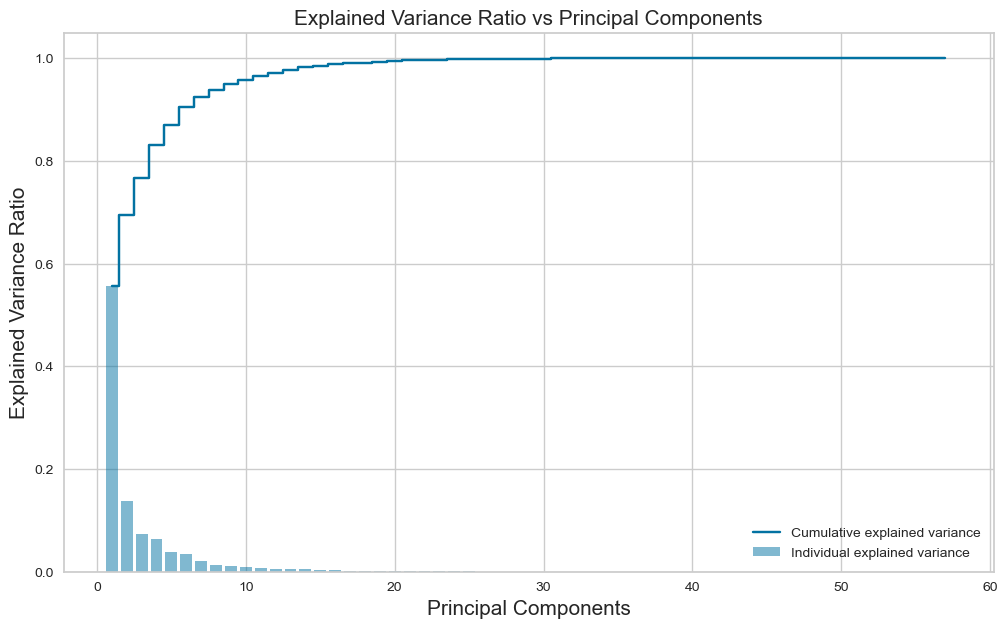

In [435]:
# Ploting Cumulative explained variance and individual explained variance vs Principal Components
plt.figure(figsize=(12 ,7))
plt.bar(range(1, var_exp.size + 1), var_exp, alpha = 0.5, align = 'center', label = 'Individual explained variance')
plt.step(range(1, var_exp.size + 1), cum_var_exp, where='mid', label = 'Cumulative explained variance')
plt.ylabel('Explained Variance Ratio',fontsize=15)
plt.xlabel('Principal Components',fontsize=15)
plt.title('Explained Variance Ratio vs Principal Components',fontsize=15)
plt.legend(loc = 'best')
#plt.grid()
plt.show()

In [436]:
# find the least number of components that can explain more than 90% variance
sum = 0
for index, i in enumerate(var_exp):
  sum = sum + i
  if(sum>0.90):
    print("Number of PCs that explain at least 90% variance: ", index+1)
    break

Number of PCs that explain at least 90% variance:  6


In [437]:
pc_comps = ['PC1','PC2','PC3','PC4','PC5','PC6']
data_pca = pd.DataFrame(np.round(pca.components_[:6,:],2),index=pc_comps,columns=df_num_scaled.columns)
data_pca.T

PC1   PC2   PC3   PC4   PC5   PC6
No_HH           0.16 -0.13 -0.00 -0.13 -0.01  0.00
TOT_M           0.17 -0.09  0.06 -0.02 -0.03 -0.07
TOT_F           0.17 -0.10  0.04 -0.07 -0.01 -0.04
M_06            0.16 -0.02  0.06  0.01 -0.05 -0.16
F_06            0.16 -0.02  0.05  0.01 -0.04 -0.15
M_SC            0.15 -0.05  0.00  0.01 -0.17 -0.06
F_SC            0.15 -0.05 -0.03 -0.03 -0.16 -0.04
M_ST            0.03  0.03 -0.12 -0.22  0.43  0.22
F_ST            0.03  0.03 -0.14 -0.23  0.44  0.23
M_LIT           0.16 -0.12  0.08 -0.04 -0.01 -0.06
F_LIT           0.15 -0.15  0.12 -0.06  0.06 -0.05
M_ILL           0.16 -0.01 -0.02  0.03 -0.10 -0.12
F_ILL           0.17 -0.01 -0.09 -0.08 -0.12 -0.03
TOT_WORK_M      0.16 -0.13  0.05 -0.04 -0.02 -0.00
TOT_WORK_F      0.15 -0.09 -0.06 -0.23 -0.04  0.11
MAINWORK_M      0.15 -0.18  0.05 -0.07 -0.04  0.02
MAINWORK_F      0.12 -0.15 -0.06 -0.25 -0.08  0.12
MAIN_CL_M       0.10  0.06 -0.07 -0.09 -0.29 -0.01
MAIN_CL_F       0.07  0.09 -0.01 -0.29 -0.24  0.10
MAIN_AL_M       0.11 -0.03 -0.25 -0.14 -0.21 -0.03
MAIN_AL_F       0.07 -0.06 -0.25 -0.29 -0.18  0.02
MAIN_HH_M       0.13 -0.08  0.03  0.15 -0.13  0.17
MAIN_HH_F       0.08 -0.08 -0.06  0.05 -0.14  0.42
MAIN_OT_M       0.12 -0.21  0.14 -0.04  0.06  0.02
MAIN_OT_F       0.11 -0.21  0.10 -0.12  0.08  0.08
MARGWORK_M      0.16  0.09 -0.01  0.09  0.06 -0.09
MARGWORK_F      0.16  0.13 -0.05 -0.09  0.09  0.02
MARG_CL_M       0.08  0.27  0.20 -0.06 -0.02  0.03
MARG_CL_F       0.05  0.25  0.27 -0.17 -0.06  0.09
MARG_AL_M       0.13  0.17 -0.19  0.09  0.02 -0.14
MARG_AL_F       0.11  0.14 -0.27 -0.11  0.08 -0.09
MARG_HH_M       0.14  0.07 -0.02  0.24 -0.06  0.09
MARG_HH_F       0.13  0.02 -0.08  0.20 -0.03  0.37
MARG_OT_M       0.16 -0.09  0.11  0.09  0.12 -0.06
MARG_OT_F       0.15 -0.12  0.10  0.03  0.17  0.00
MARGWORK_3_6_M  0.16 -0.04  0.06 -0.00 -0.04 -0.14
MARGWORK_3_6_F  0.16 -0.11  0.08  0.00  0.00 -0.11
MARG_CL_3_6_M   0.17  0.08 -0.02  0.09  0.05 -0.10
MARG_CL_3_6_F   0.16  0.10 -0.07 -0.11  0.07  0.02
MARG_AL_3_6_M   0.09  0.26  0.15 -0.04 -0.01  0.01
MARG_AL_3_6_F   0.05  0.24  0.26 -0.18 -0.06  0.09
MARG_HH_3_6_M   0.13  0.16 -0.20  0.08  0.01 -0.14
MARG_HH_3_6_F   0.11  0.13 -0.28 -0.14  0.06 -0.08
MARG_OT_3_6_M   0.14  0.06 -0.02  0.24 -0.07  0.10
MARG_OT_3_6_F   0.12  0.01 -0.08  0.19 -0.04  0.38
MARGWORK_0_3_M  0.15 -0.09  0.11  0.09  0.11 -0.06
MARGWORK_0_3_F  0.15 -0.13  0.10  0.03  0.14  0.01
MARG_CL_0_3_M   0.15  0.15  0.05  0.09  0.08 -0.06
MARG_CL_0_3_F   0.14  0.18  0.02 -0.02  0.13 -0.00
MARG_AL_0_3_M   0.05  0.25  0.27 -0.10 -0.05  0.07
MARG_AL_0_3_F   0.04  0.24  0.28 -0.14 -0.05  0.08
MARG_HH_0_3_M   0.12  0.19 -0.14  0.13  0.06 -0.12
MARG_HH_0_3_F   0.12  0.18 -0.20  0.00  0.13 -0.11
MARG_OT_0_3_M   0.14  0.08 -0.02  0.23 -0.04  0.06
MARG_OT_0_3_F   0.13  0.05 -0.08  0.21  0.00  0.30
NON_WORK_M      0.15 -0.07  0.11  0.08  0.16 -0.05
NON_WORK_F      0.13 -0.07  0.10  0.02  0.24 -0.02

In [438]:
def color_high(val):
    if val <= -0.15: 
        return 'background: pink'
    elif val >= 0.15:
        return 'background: skyblue'   
    
data_pca.T.style.applymap(color_high)

In [439]:
from matplotlib.patches import Rectangle

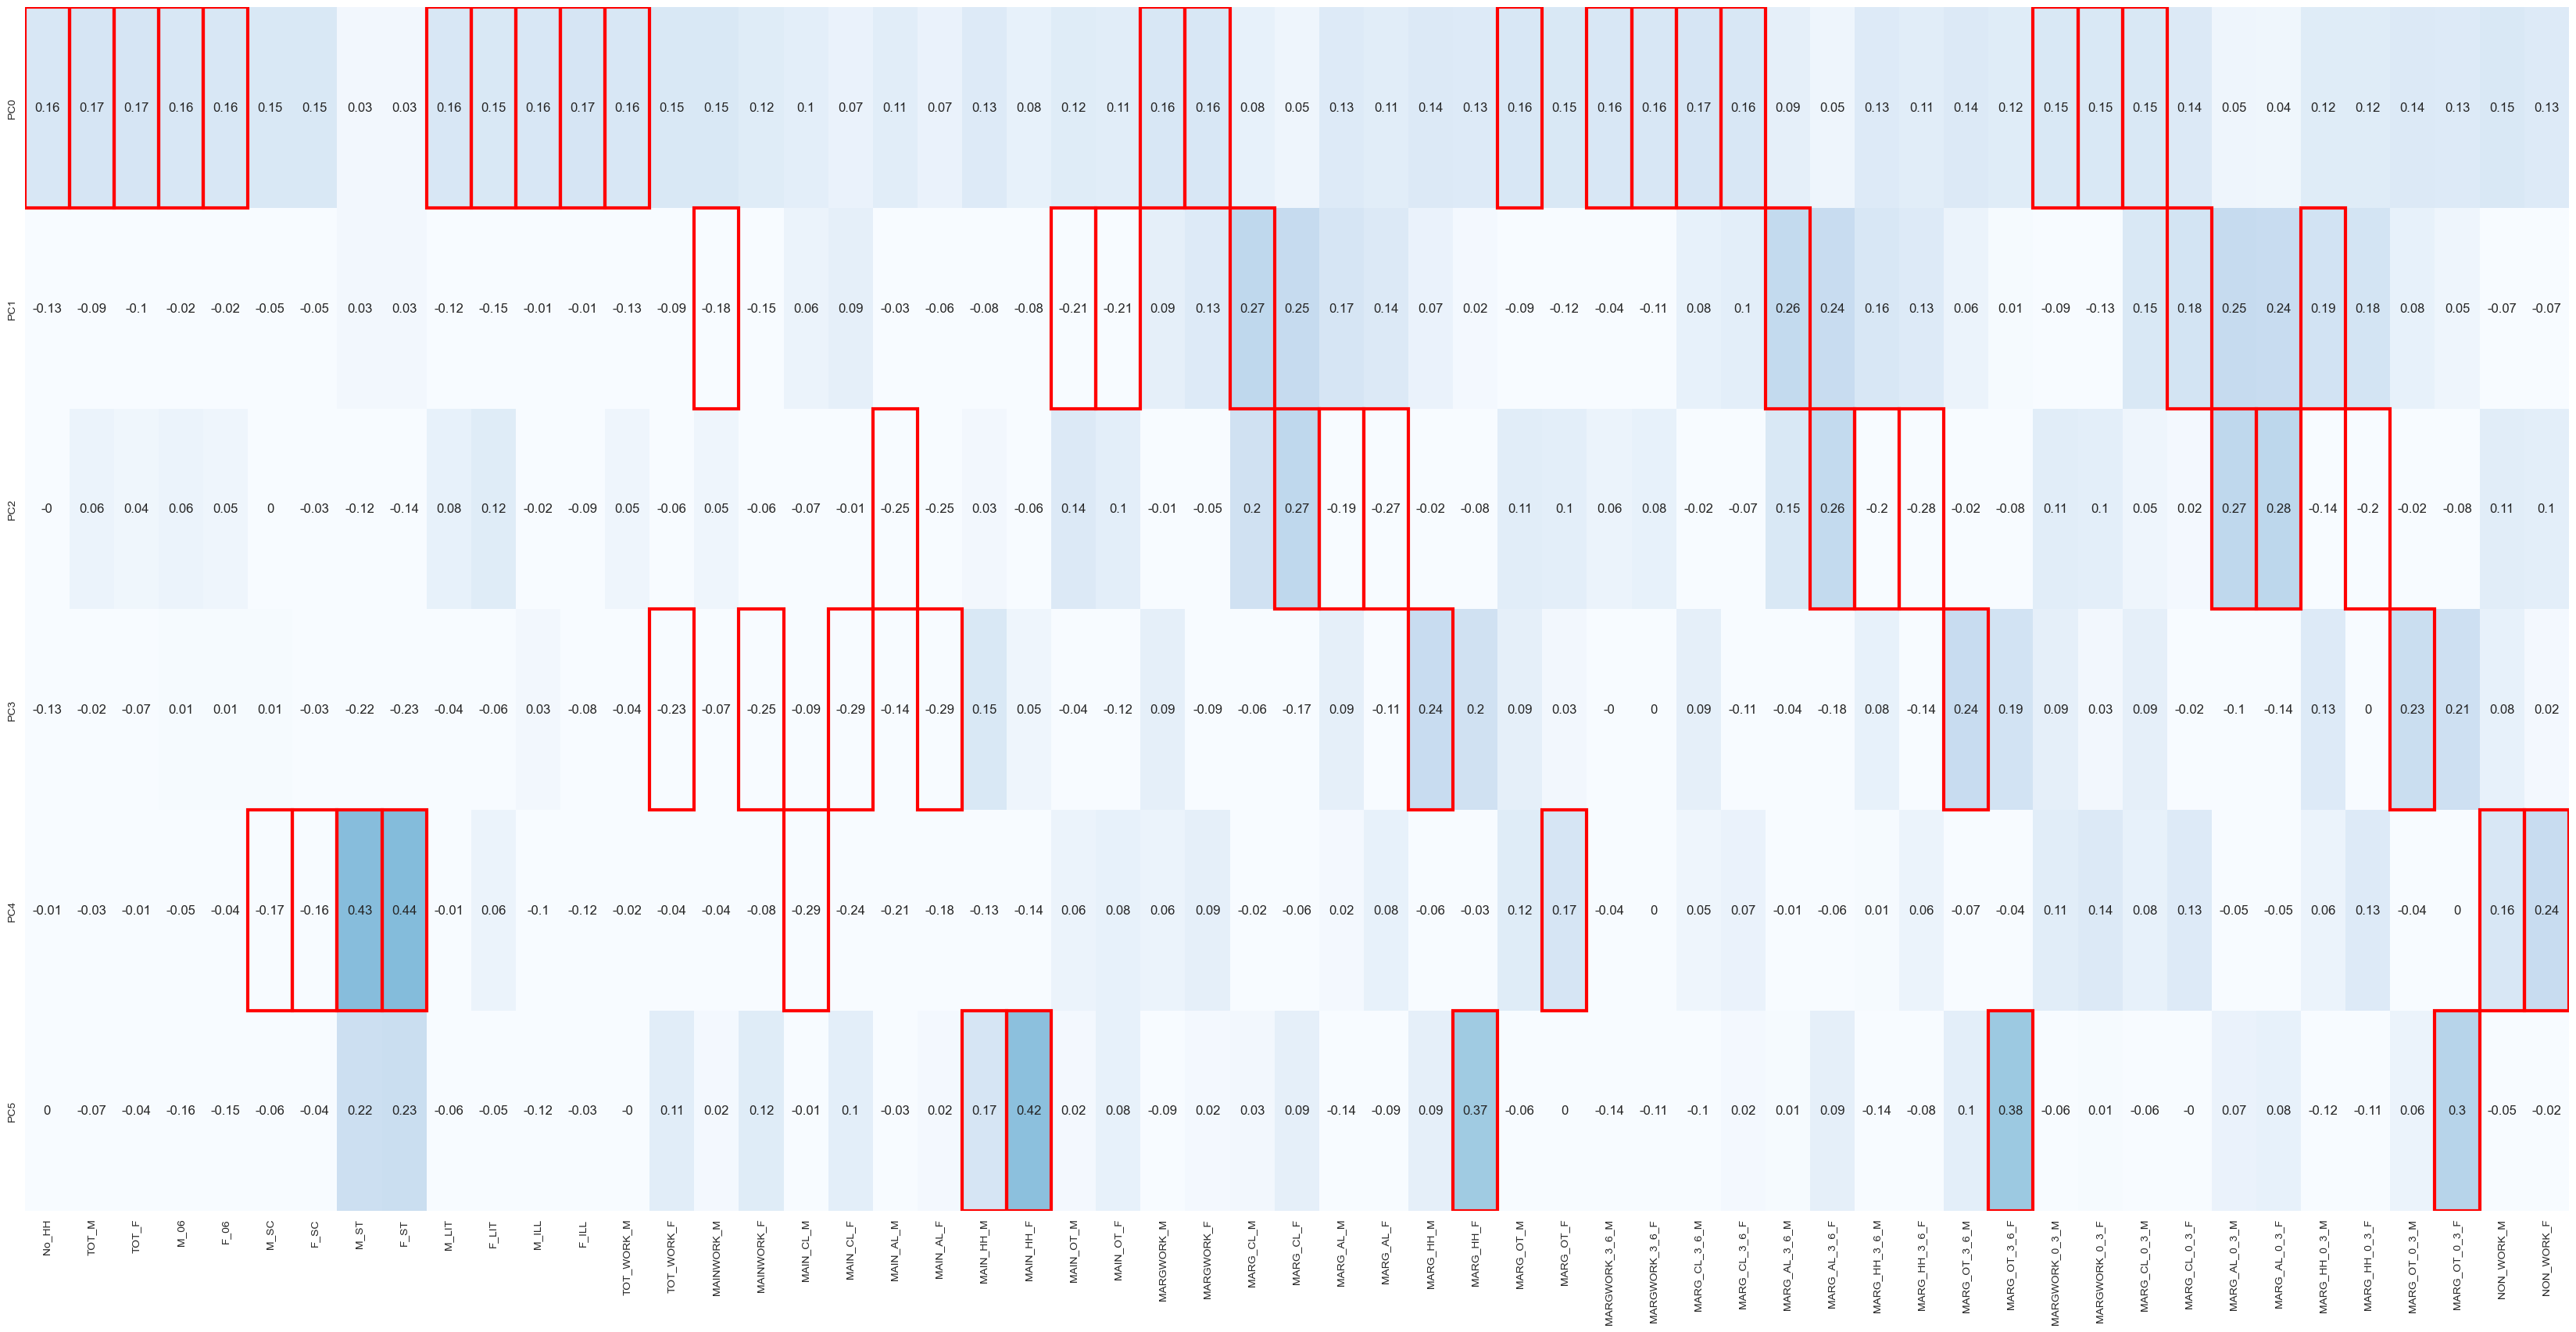

In [440]:
fig,ax = plt.subplots(figsize=(42, 20), facecolor='w', edgecolor='k')
ax = sns.heatmap(data_pca, annot=True, vmax=1.0, vmin=0, cmap='Blues', cbar=False, fmt='.2g', ax=ax,
                 yticklabels=['PC0','PC1','PC2','PC3','PC4', 'PC5'])

column_max = data_pca.abs().idxmax(axis=0)

for col, variable in enumerate(data_pca.columns):
    position = data_pca.index.get_loc(column_max[variable])
    ax.add_patch(Rectangle((col, position),1,1, fill=False, edgecolor='red', lw=3))

In [441]:
print('The Linear equation of 1st component: ')
for i in range(0,df_num_scaled.shape[1]):
    print('{} * {}'.format(np.round(pca.components_[0][i],2),df_num_scaled.columns[i]),end=' + ')

The Linear equation of 1st component: 
0.16 * No_HH + 0.17 * TOT_M + 0.17 * TOT_F + 0.16 * M_06 + 0.16 * F_06 + 0.15 * M_SC + 0.15 * F_SC + 0.03 * M_ST + 0.03 * F_ST + 0.16 * M_LIT + 0.15 * F_LIT + 0.16 * M_ILL + 0.17 * F_ILL + 0.16 * TOT_WORK_M + 0.15 * TOT_WORK_F + 0.15 * MAINWORK_M + 0.12 * MAINWORK_F + 0.1 * MAIN_CL_M + 0.07 * MAIN_CL_F + 0.11 * MAIN_AL_M + 0.07 * MAIN_AL_F + 0.13 * MAIN_HH_M + 0.08 * MAIN_HH_F + 0.12 * MAIN_OT_M + 0.11 * MAIN_OT_F + 0.16 * MARGWORK_M + 0.16 * MARGWORK_F + 0.08 * MARG_CL_M + 0.05 * MARG_CL_F + 0.13 * MARG_AL_M + 0.11 * MARG_AL_F + 0.14 * MARG_HH_M + 0.13 * MARG_HH_F + 0.16 * MARG_OT_M + 0.15 * MARG_OT_F + 0.16 * MARGWORK_3_6_M + 0.16 * MARGWORK_3_6_F + 0.17 * MARG_CL_3_6_M + 0.16 * MARG_CL_3_6_F + 0.09 * MARG_AL_3_6_M + 0.05 * MARG_AL_3_6_F + 0.13 * MARG_HH_3_6_M + 0.11 * MARG_HH_3_6_F + 0.14 * MARG_OT_3_6_M + 0.12 * MARG_OT_3_6_F + 0.15 * MARGWORK_0_3_M + 0.15 * MARGWORK_0_3_F + 0.15 * MARG_CL_0_3_M + 0.14 * MARG_CL_0_3_F + 0.05 * MARG_AL_0_3_M + 

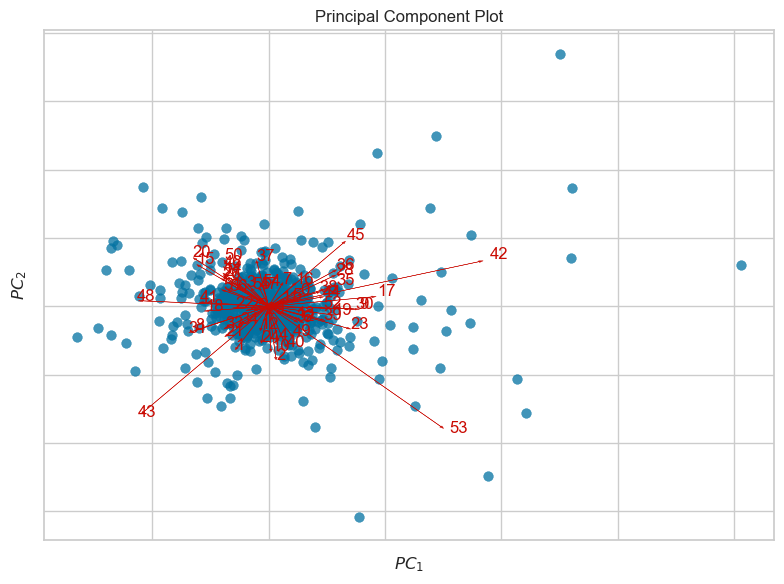

In [444]:
#! pip install yellowbrick
from yellowbrick.features import PCA
plt.figure(figsize=(8 ,6))
# Load the dataset
X = df_pca

visualizer = PCA(scale=True, projection=2, proj_features=True)
visualizer.fit_transform(X)
visualizer.show();